In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [17]:
df_EDA=pd.read_csv('/content/sample_data/EDA_DATA.csv')
df_EDA.head()

TIMESTAMP       MARK  MODEL  CAR_YEAR  ENGINE_POWER AUTOMATIC VEHICLE_ID  \
0      4.267  chevrolet  agile    2011.0           1.4         n       car1   
1     12.283  chevrolet  agile    2011.0           1.4         n       car1   
2     20.291  chevrolet  agile    2011.0           1.4         n       car1   
3     28.300  chevrolet  agile    2011.0           1.4         n       car1   
4     36.320  chevrolet  agile    2011.0           1.4         n       car1   

   BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  FUEL_LEVEL  ...  \
0                     100.0                 80.0        48.6  ...   
1                     100.0                 80.0        48.6  ...   
2                     100.0                 80.0        48.6  ...   
3                     100.0                 80.0        48.6  ...   
4                     100.0                 80.0        48.6  ...   

   THROTTLE_POS  DTC_NUMBER  TROUBLE_CODES  TIMING_ADVANCE  MIN  HOURS  \
0          25.0           0              0            56.9   55   16.0   
1          25.0           0              0            56.5   55   16.0   
2          25.0           0              0            57.3   55   16.0   
3          25.0           0              0            56.5   55   16.0   
4          25.0           0              0            56.9   55   16.0   

   DAYS_OF_WEEK  MONTHS    YEAR  Total_Engine_Seconds  
0           2.0     8.0  2017.0                 208.0  
1           2.0     8.0  2017.0                 215.0  
2           2.0     8.0  2017.0                 223.0  
3           2.0     8.0  2017.0                 231.0  
4           2.0     8.0  2017.0                 239.0  

[5 rows x 31 columns]

In [18]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47157 entries, 0 to 47156
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  object 
 2   MODEL                        47157 non-null  object 
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  object 
 6   VEHICLE_ID                   47157 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     47157 non-null  float64
 8   ENGINE_COOLANT_TEMP          47157 non-null  float64
 9   FUEL_LEVEL                   47157 non-null  float64
 10  ENGINE_LOAD                  47157 non-null  float64
 11  AMBIENT_AIR_TEMP             47157 non-null  float64
 12  ENGINE_RPM                   47157 non-null  float64
 13  INTAKE_MANIFOLD_

# Distribution of Vehicle ID

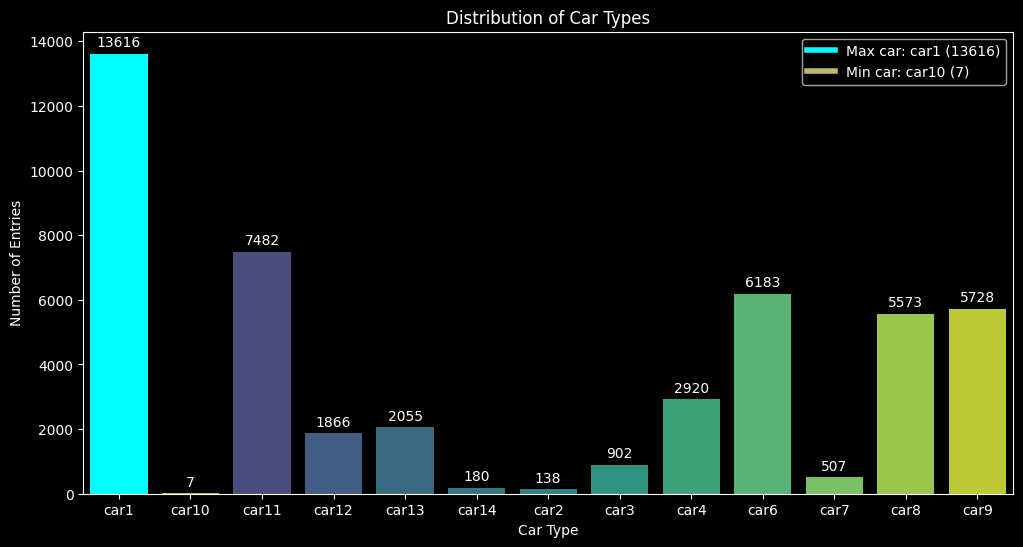

Counts for each car:
car1: 13616
car10: 7
car11: 7482
car12: 1866
car13: 2055
car14: 180
car2: 138
car3: 902
car4: 2920
car6: 6183
car7: 507
car8: 5573
car9: 5728


In [19]:
car_counts = df_EDA['VEHICLE_ID'].value_counts().sort_index()
max_car = car_counts.idxmax()
max_count = car_counts.max()
min_car = car_counts.idxmin()
min_count = car_counts.min()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=car_counts.index, y=car_counts.values, palette='viridis')


bar_plot.patches[car_counts.index.get_loc(max_car)].set_facecolor('#00ffff')
bar_plot.patches[car_counts.index.get_loc(min_car)].set_facecolor('#bdb76b')

plt.title('Distribution of Car Types')
plt.xlabel('Car Type')
plt.ylabel('Number of Entries')

plt.legend(handles=[
    plt.Line2D([0], [0], color='#00ffff', lw=4, label=f'Max car: {max_car} ({max_count})'),
    plt.Line2D([0], [0], color='#bdb76b', lw=4, label=f'Min car: {min_car} ({min_count})')
], loc='upper right')


for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

plt.show()

print("Counts for each car:")
for car, count in car_counts.items():
    print(f"{car}: {count}")

# Distribution of Mark

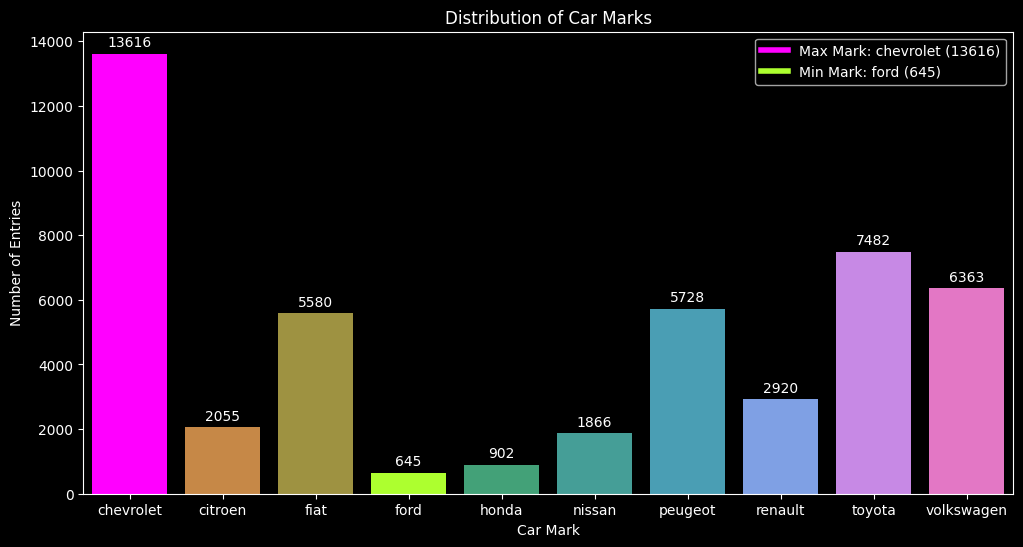

Counts for each mark:
chevrolet: 13616
citroen: 2055
fiat: 5580
ford: 645
honda: 902
nissan: 1866
peugeot: 5728
renault: 2920
toyota: 7482
volkswagen: 6363


In [20]:

mark_counts = df_EDA['MARK'].value_counts().sort_index()
max_mark = mark_counts.idxmax()
max_count = mark_counts.max()
min_mark = mark_counts.idxmin()
min_count = mark_counts.min()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=mark_counts.index, y=mark_counts.values, palette='husl')

bar_plot.patches[mark_counts.index.get_loc(max_mark)].set_facecolor('#ff00ff')
bar_plot.patches[mark_counts.index.get_loc(min_mark)].set_facecolor('#adff2f')


plt.title('Distribution of Car Marks')
plt.xlabel('Car Mark')
plt.ylabel('Number of Entries')


plt.legend(handles=[
    plt.Line2D([0], [0], color='#ff00ff', lw=4, label=f'Max Mark: {max_mark} ({max_count})'),
    plt.Line2D([0], [0], color='#adff2f', lw=4, label=f'Min Mark: {min_mark} ({min_count})')
], loc='upper right')

for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

plt.show()


print("Counts for each mark:")
for mark, count in mark_counts.items():
    print(f"{mark}: {count}")

# Distribution of Model

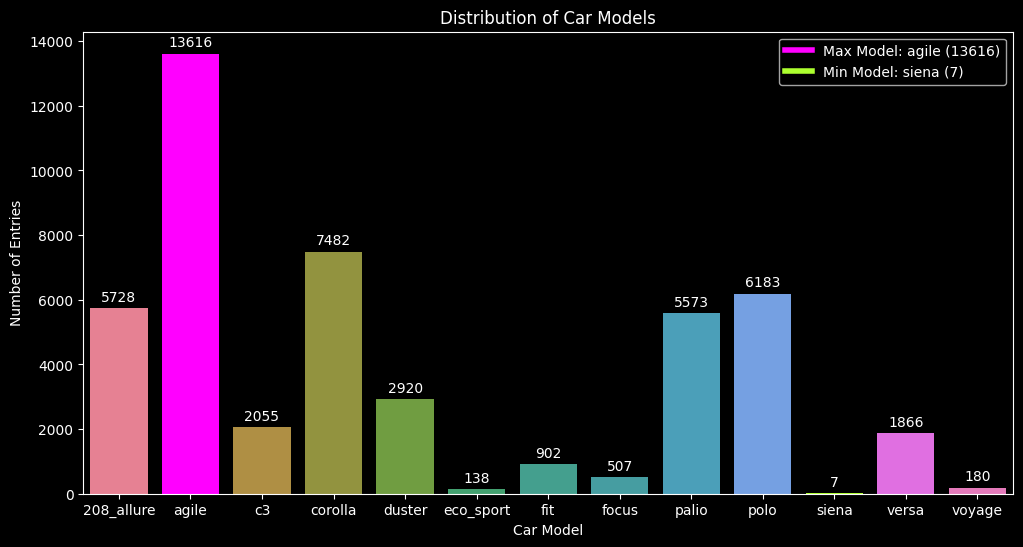

Counts for each model:
208_allure: 5728
agile: 13616
c3: 2055
corolla: 7482
duster: 2920
eco_sport: 138
fit: 902
focus: 507
palio: 5573
polo: 6183
siena: 7
versa: 1866
voyage: 180


In [21]:
model_counts = df_EDA['MODEL'].value_counts().sort_index()
max_model = model_counts.idxmax()
max_count = model_counts.max()
min_model = model_counts.idxmin()
min_count = model_counts.min()
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=model_counts.index, y=model_counts.values, palette='husl')
bar_plot.patches[model_counts.index.get_loc(max_model)].set_facecolor('#ff00ff')
bar_plot.patches[model_counts.index.get_loc(min_model)].set_facecolor('#adff2f')

plt.title('Distribution of Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Entries')

plt.legend(handles=[
    plt.Line2D([0], [0], color='#ff00ff', lw=4, label=f'Max Model: {max_model} ({max_count})'),
    plt.Line2D([0], [0], color='#adff2f', lw=4, label=f'Min Model: {min_model} ({min_count})')
], loc='upper right')


for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()

print("Counts for each model:")
for model, count in model_counts.items():
    print(f"{model}: {count}")

In [22]:
df_EDA2=df_EDA.copy()

# Vehicle ID VS MARK

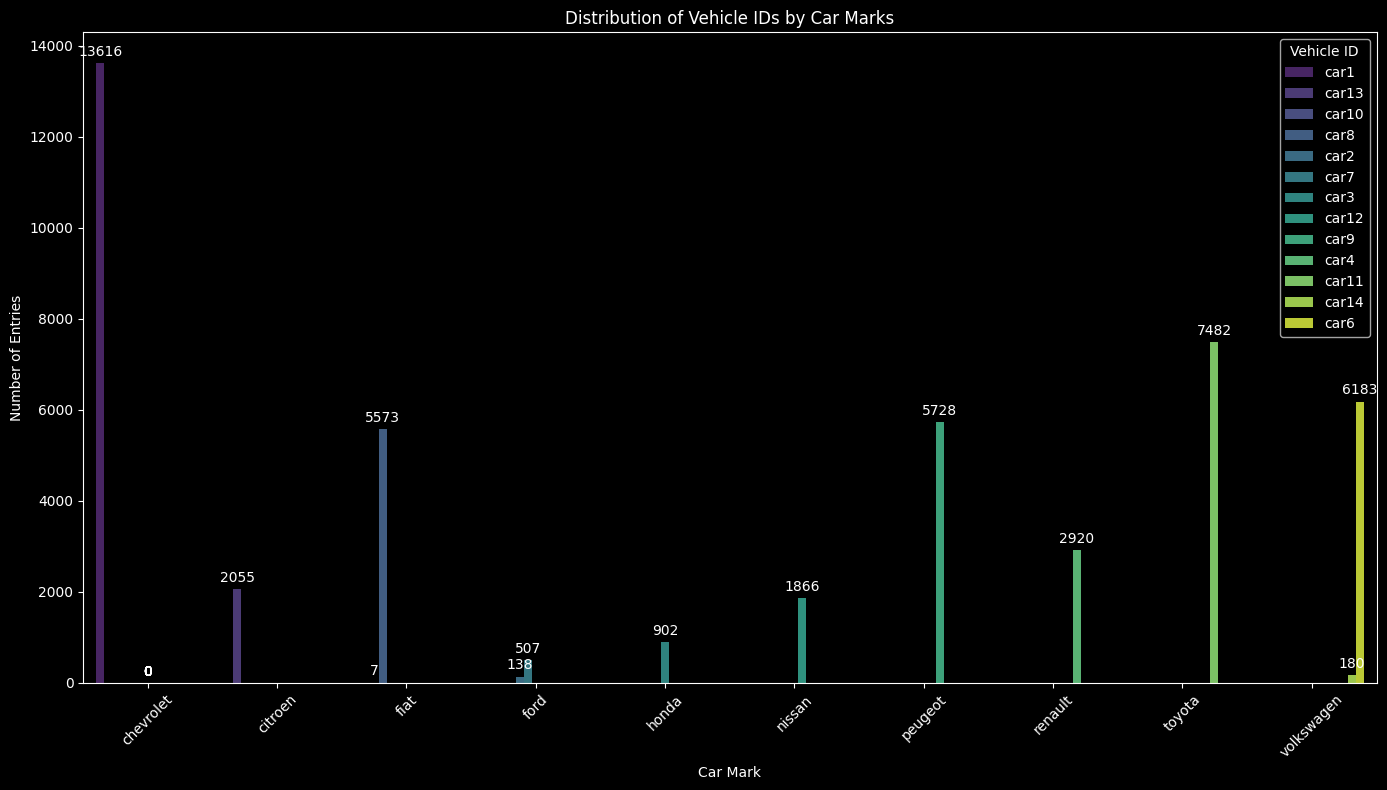

Aggregated counts for each MARK and VEHICLE_ID:
          MARK VEHICLE_ID  Count
0    chevrolet       car1  13616
1      citroen      car13   2055
2         fiat      car10      7
3         fiat       car8   5573
4         ford       car2    138
5         ford       car7    507
6        honda       car3    902
7       nissan      car12   1866
8      peugeot       car9   5728
9      renault       car4   2920
10      toyota      car11   7482
11  volkswagen      car14    180
12  volkswagen       car6   6183


In [23]:
grouped_counts = df_EDA2.groupby(['MARK', 'VEHICLE_ID']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='MARK', y='Count', hue='VEHICLE_ID', data=grouped_counts, palette='viridis')

plt.title('Distribution of Vehicle IDs by Car Marks')
plt.xlabel('Car Mark')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Vehicle ID')
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Aggregated counts for each MARK and VEHICLE_ID:")
print(grouped_counts)

# Vehicle ID VS Model

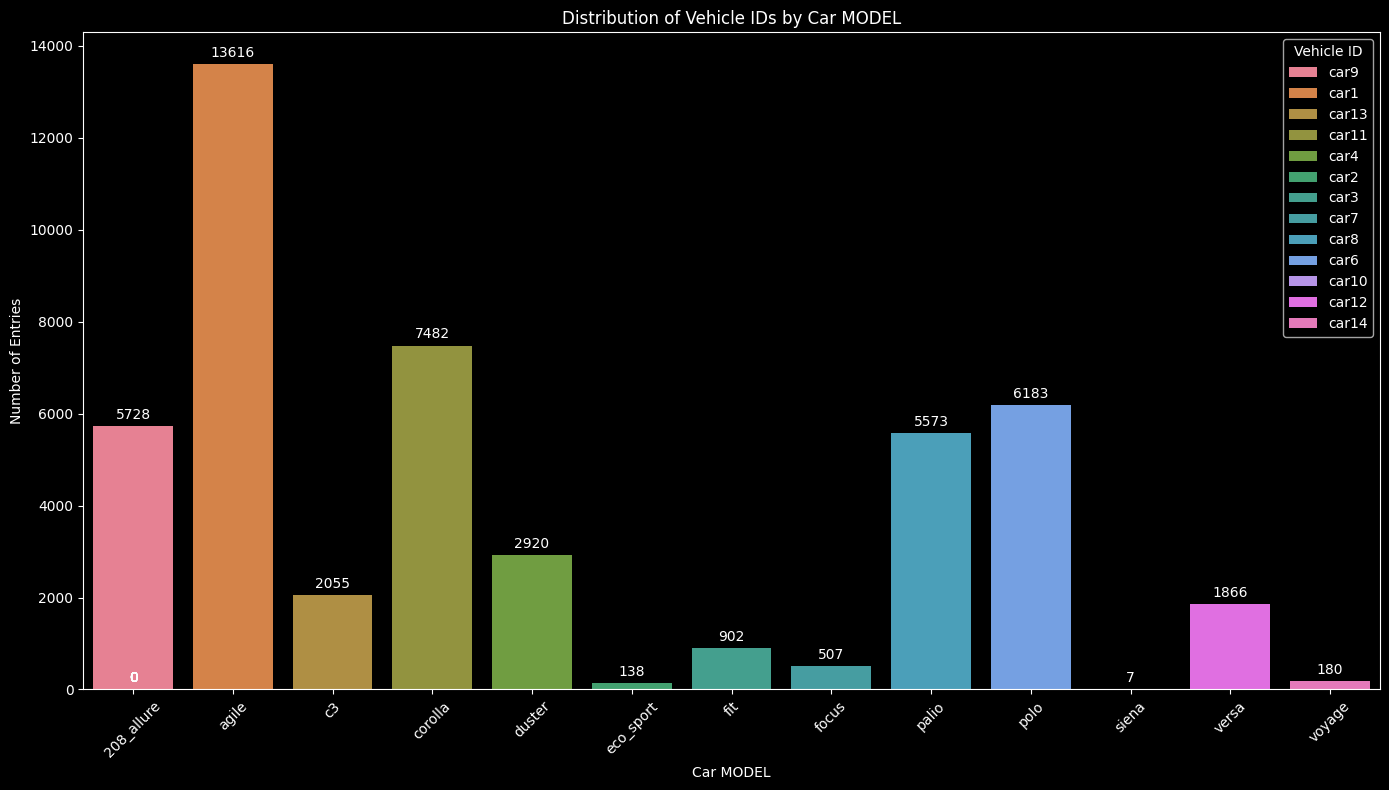

Aggregated counts for each MODEL and VEHICLE_ID:
         MODEL VEHICLE_ID  Count
0   208_allure       car9   5728
1        agile       car1  13616
2           c3      car13   2055
3      corolla      car11   7482
4       duster       car4   2920
5    eco_sport       car2    138
6          fit       car3    902
7        focus       car7    507
8        palio       car8   5573
9         polo       car6   6183
10       siena      car10      7
11       versa      car12   1866
12      voyage      car14    180


In [24]:
grouped_counts = df_EDA2.groupby(['MODEL', 'VEHICLE_ID']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='MODEL', y='Count', hue='VEHICLE_ID', data=grouped_counts, palette='husl')

plt.title('Distribution of Vehicle IDs by Car MODEL')
plt.xlabel('Car MODEL')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Vehicle ID')
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Aggregated counts for each MODEL and VEHICLE_ID:")
print(grouped_counts)

**_ENGINE_COOLANT_TEMP_**

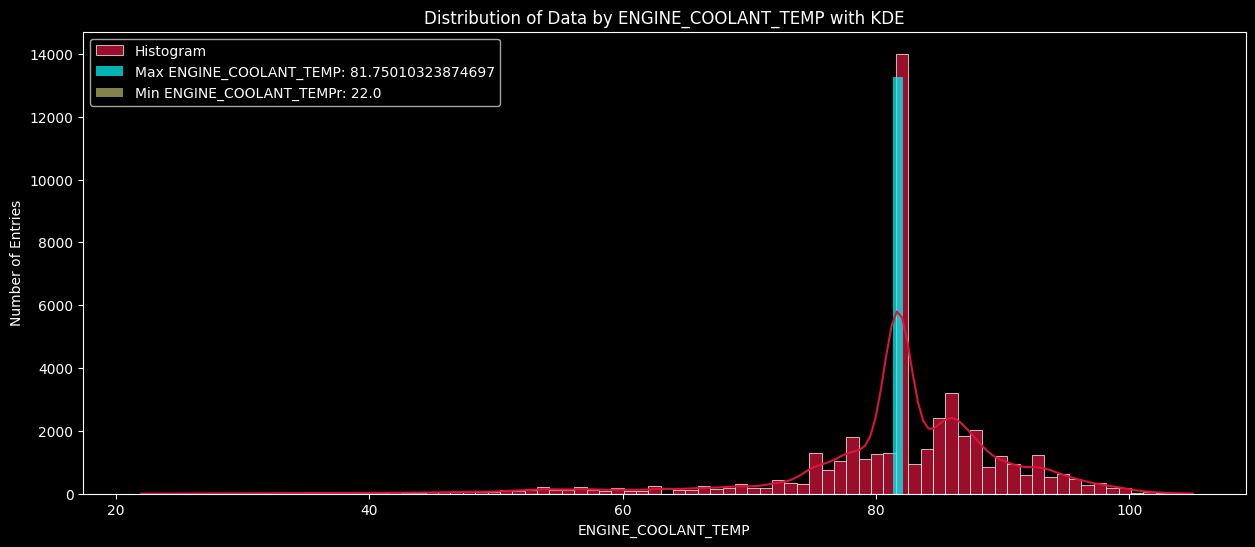

Counts for each ENGINE_COOLANT_TEMP_counts:
22.0: 1
23.0: 2
24.0: 6
25.0: 3
26.0: 6
27.0: 13
28.0: 7
29.0: 7
30.0: 14
31.0: 12
32.0: 10
33.0: 16
34.0: 15
35.0: 15
36.0: 29
37.0: 16
38.0: 21
39.0: 33
40.0: 25
41.0: 19
42.0: 44
43.0: 31
44.0: 30
45.0: 52
46.0: 45
47.0: 46
48.0: 85
49.0: 42
50.0: 59
51.0: 122
52.0: 94
53.0: 115
54.0: 209
55.0: 103
56.0: 110
57.0: 214
58.0: 109
59.0: 101
60.0: 176
61.0: 102
62.0: 99
63.0: 232
64.0: 115
65.0: 134
66.0: 243
67.0: 153
68.0: 190
69.0: 317
70.0: 194
71.0: 188
72.0: 446
73.0: 329
74.0: 325
75.0: 1284
76.0: 766
77.0: 1034
78.0: 1795
79.0: 1118
80.0: 1280
81.0: 1290
81.75010323874697: 13255
82.0: 749
83.0: 938
84.0: 1422
85.0: 2415
86.0: 3218
87.0: 1852
88.0: 2039
89.0: 862
90.0: 1210
91.0: 933
92.0: 580
93.0: 1242
94.0: 548
95.0: 632
96.0: 466
97.0: 284
98.0: 348
99.0: 168
100.0: 179
101.0: 37
102.0: 60
103.0: 15
104.0: 13
105.0: 1


In [25]:
ENGINE_COOLANT_TEMP_counts = df_EDA2['ENGINE_COOLANT_TEMP'].value_counts().sort_index()

max_ENGINE_COOLANT_TEMP = ENGINE_COOLANT_TEMP_counts.idxmax()
max_count = ENGINE_COOLANT_TEMP_counts.max()
min_ENGINE_COOLANT_TEMP = ENGINE_COOLANT_TEMP_counts.idxmin()
min_count = ENGINE_COOLANT_TEMP_counts.min()

plt.figure(figsize=(15, 6))

sns.histplot(df_EDA2['ENGINE_COOLANT_TEMP'], bins=len(ENGINE_COOLANT_TEMP_counts), kde=True, color='#dc143c', alpha=0.7, linewidth=0.5, label='Histogram')

plt.bar(max_ENGINE_COOLANT_TEMP, max_count, color='#00ffff', label=f'Max ENGINE_COOLANT_TEMP: {max_ENGINE_COOLANT_TEMP}', alpha=0.7)
plt.bar(min_ENGINE_COOLANT_TEMP, min_count, color='#bdb76b', label=f'Min ENGINE_COOLANT_TEMPr: {min_ENGINE_COOLANT_TEMP}', alpha=0.7)

plt.title('Distribution of Data by ENGINE_COOLANT_TEMP with KDE')
plt.xlabel('ENGINE_COOLANT_TEMP')
plt.ylabel('Number of Entries')
plt.legend()
plt.show()
print("Counts for each ENGINE_COOLANT_TEMP_counts:")
for ENGINE_COOLANT_TEMP, count in ENGINE_COOLANT_TEMP_counts.items():
    print(f"{ENGINE_COOLANT_TEMP}: {count}")

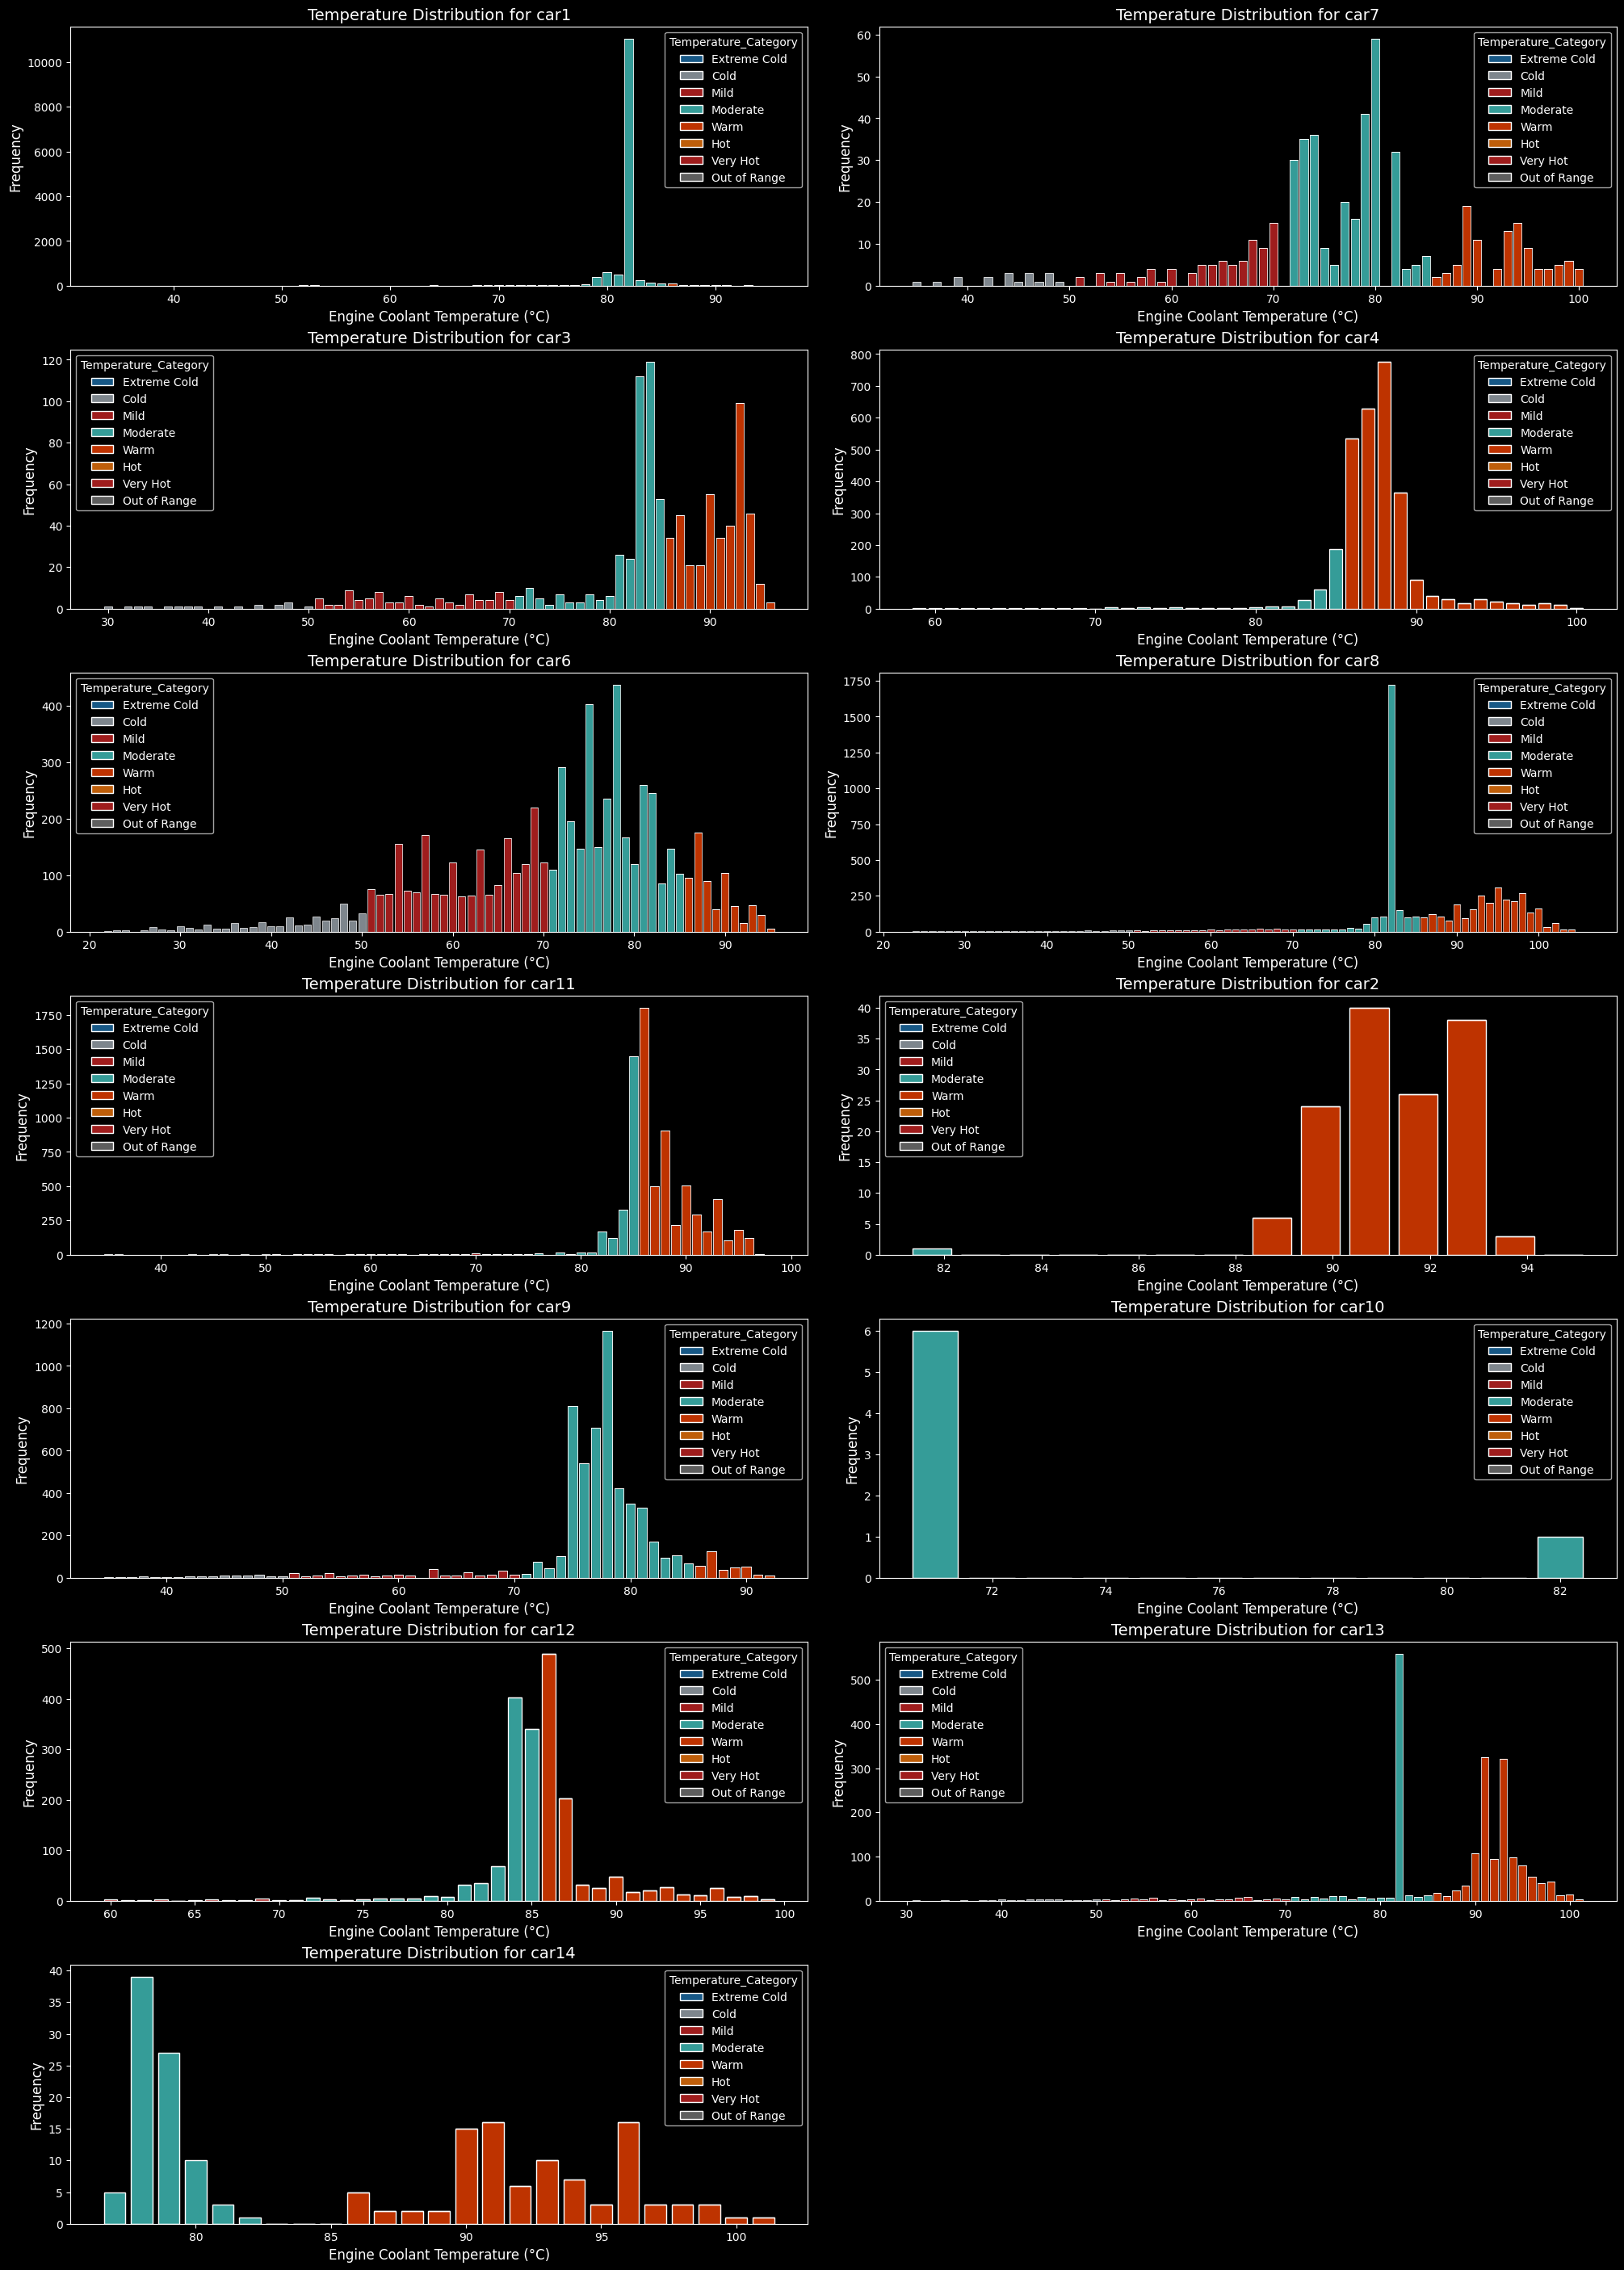

Counts for each vehicle and temperature category:

car1:
  Extreme Cold: 0
  Cold: 27
  Mild: 151
  Moderate: 13218
  Warm: 220
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car7:
  Extreme Cold: 0
  Cold: 18
  Mild: 86
  Moderate: 299
  Warm: 104
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car3:
  Extreme Cold: 0
  Cold: 18
  Mild: 87
  Moderate: 387
  Warm: 410
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car4:
  Extreme Cold: 0
  Cold: 0
  Mild: 16
  Moderate: 315
  Warm: 2589
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car6:
  Extreme Cold: 0
  Cold: 353
  Mild: 2086
  Moderate: 3096
  Warm: 648
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car8:
  Extreme Cold: 0
  Cold: 132
  Mild: 249
  Moderate: 2475
  Warm: 2717
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car11:
  Extreme Cold: 0
  Cold: 26
  Mild: 78
  Moderate: 2156
  Warm: 5222
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car2:
  Extreme Cold: 0
  Cold: 0
  Mild: 0
  Moderate: 1
  Warm: 137
  Hot: 0
  Very Hot: 0
  Out of Range: 0

car9:
  Ext

In [26]:
temperature_ranges = {
    'Extreme Cold': (-40, 0),
    'Cold': (0, 50),
    'Mild': (50, 70),
    'Moderate': (70, 85),
    'Warm': (85, 105),
    'Hot': (105, 150),
    'Very Hot': (150, 215)
}

# Updated range colors
range_colors = {
    'Extreme Cold': '#1f77b4',   # Blue
    'Cold': '#aab4be',          # Light Blue
    'Mild': '#d62728',          # Red
    'Moderate': '#48d1cc',      # Aqua
    'Warm': '#ff4500',          # Orange
    'Hot': '#ff7f0e',           # Dark Orange
    'Very Hot': '#d62728',      # Red
    'Out of Range': '#7f7f7f'   # Gray
}

# Assuming df_cleaned is your DataFrame
unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]

    vehicle_data['Temperature_Category'] = pd.cut(
        vehicle_data['ENGINE_COOLANT_TEMP'],
        bins=[-np.inf] + [v[1] for v in temperature_ranges.values()] + [np.inf],
        labels=list(temperature_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Temperature_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='ENGINE_COOLANT_TEMP', hue='Temperature_Category', palette=range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Temperature Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Engine Coolant Temperature (°C)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and temperature category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")

In [27]:
Coolant_Eval={'car1':'G','car2':'B','car3':'N','car4':'N','car6':'G','car7':'N','car8':'N','car9':'G','car10':'G','car11':'B','car12':'N','car13':'B','car14':'N'}

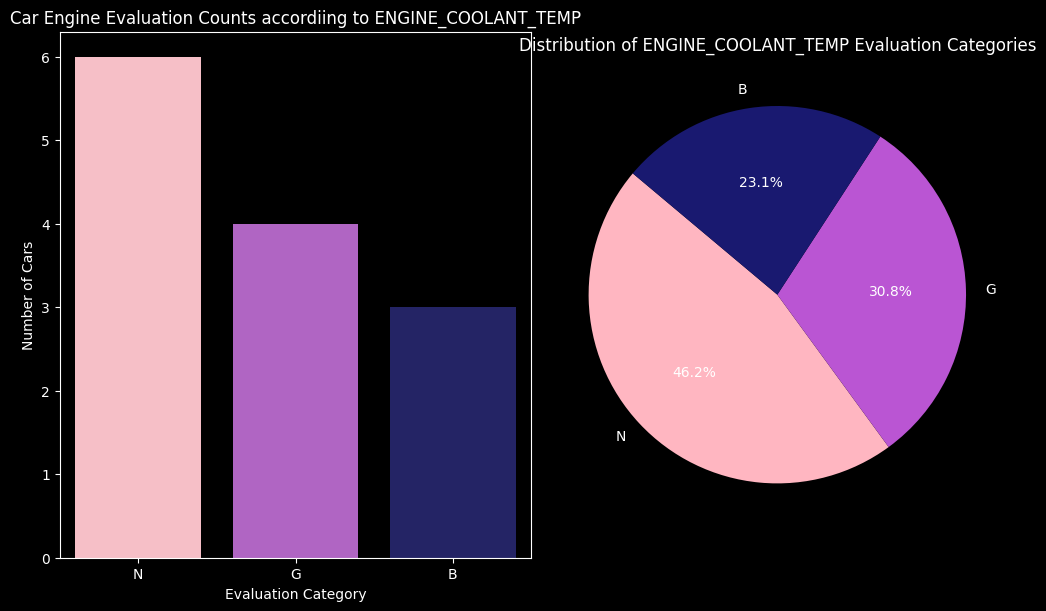

In [28]:
df_eval = pd.DataFrame(list(Coolant_Eval.items()), columns=['Vehicle', 'Evaluation'])


eval_counts = df_eval['Evaluation'].value_counts()


fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191970'], ax=ax[0])
ax[0].set_title('Car Engine Evaluation Counts accordiing to ENGINE_COOLANT_TEMP')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of ENGINE_COOLANT_TEMP Evaluation Categories')

# Show plots
plt.show()

**_Engine Power_**

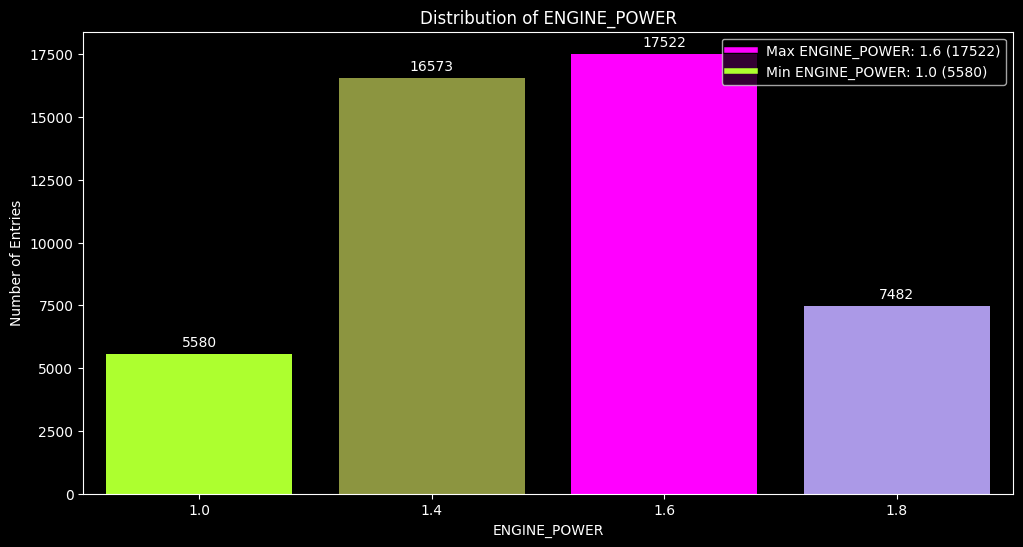

Counts for each ENGINE_POWER:
208_allure: 5728
agile: 13616
c3: 2055
corolla: 7482
duster: 2920
eco_sport: 138
fit: 902
focus: 507
palio: 5573
polo: 6183
siena: 7
versa: 1866
voyage: 180


In [29]:
ENGINE_POWER_counts = df_EDA2['ENGINE_POWER'].value_counts().sort_index()
max_ENGINE_POWER = ENGINE_POWER_counts.idxmax()
max_count = ENGINE_POWER_counts.max()
min_ENGINE_POWER = ENGINE_POWER_counts.idxmin()
min_count = ENGINE_POWER_counts.min()
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=ENGINE_POWER_counts.index, y=ENGINE_POWER_counts.values, palette='husl')
bar_plot.patches[ENGINE_POWER_counts.index.get_loc(max_ENGINE_POWER)].set_facecolor('#ff00ff')
bar_plot.patches[ENGINE_POWER_counts.index.get_loc(min_ENGINE_POWER)].set_facecolor('#adff2f')

plt.title('Distribution of ENGINE_POWER')
plt.xlabel('ENGINE_POWER')
plt.ylabel('Number of Entries')

plt.legend(handles=[
    plt.Line2D([0], [0], color='#ff00ff', lw=4, label=f'Max ENGINE_POWER: {max_ENGINE_POWER} ({max_count})'),
    plt.Line2D([0], [0], color='#adff2f', lw=4, label=f'Min ENGINE_POWER: {min_ENGINE_POWER} ({min_count})')
], loc='upper right')


for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()

print("Counts for each ENGINE_POWER:")
for model, count in model_counts.items():
    print(f"{model}: {count}")

#Engine power VS Cars

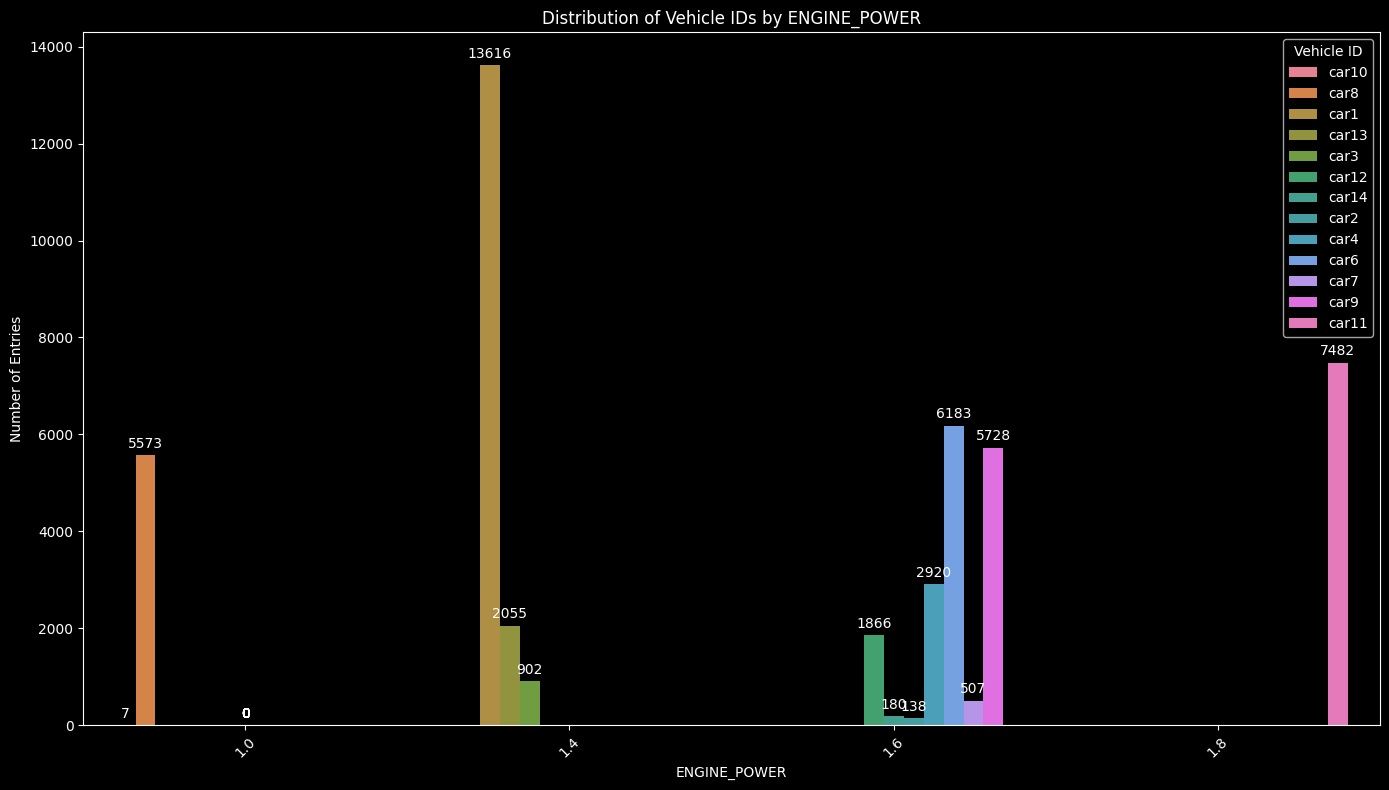

Aggregated counts for each ENGINE_POWER and VEHICLE_ID:
    ENGINE_POWER VEHICLE_ID  Count
0            1.0      car10      7
1            1.0       car8   5573
2            1.4       car1  13616
3            1.4      car13   2055
4            1.4       car3    902
5            1.6      car12   1866
6            1.6      car14    180
7            1.6       car2    138
8            1.6       car4   2920
9            1.6       car6   6183
10           1.6       car7    507
11           1.6       car9   5728
12           1.8      car11   7482


In [30]:
grouped_counts = df_EDA2.groupby(['ENGINE_POWER', 'VEHICLE_ID']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='ENGINE_POWER', y='Count', hue='VEHICLE_ID', data=grouped_counts, palette='husl')

plt.title('Distribution of Vehicle IDs by ENGINE_POWER')
plt.xlabel('ENGINE_POWER')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Vehicle ID')
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Aggregated counts for each ENGINE_POWER and VEHICLE_ID:")
print(grouped_counts)

**_AUTOMATIC_**

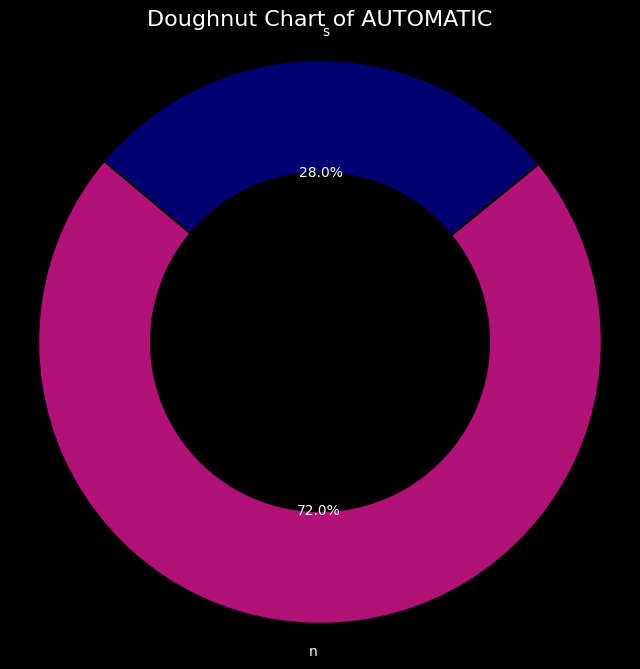

AUTOMATIC
n    33947
s    13210
Name: count, dtype: int64


In [31]:
Automatic_counts= df_EDA2['AUTOMATIC'].value_counts()
colors = ['#c71585', '#000080']
plt.figure(figsize=(8, 8))
plt.pie(
    Automatic_counts,
    labels=Automatic_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.9)
)
plt.title('Doughnut Chart of AUTOMATIC', fontsize=16)
plt.axis('equal')
plt.show()
print(Automatic_counts)

# AUTOMATIC VS. VEHICLE_ID

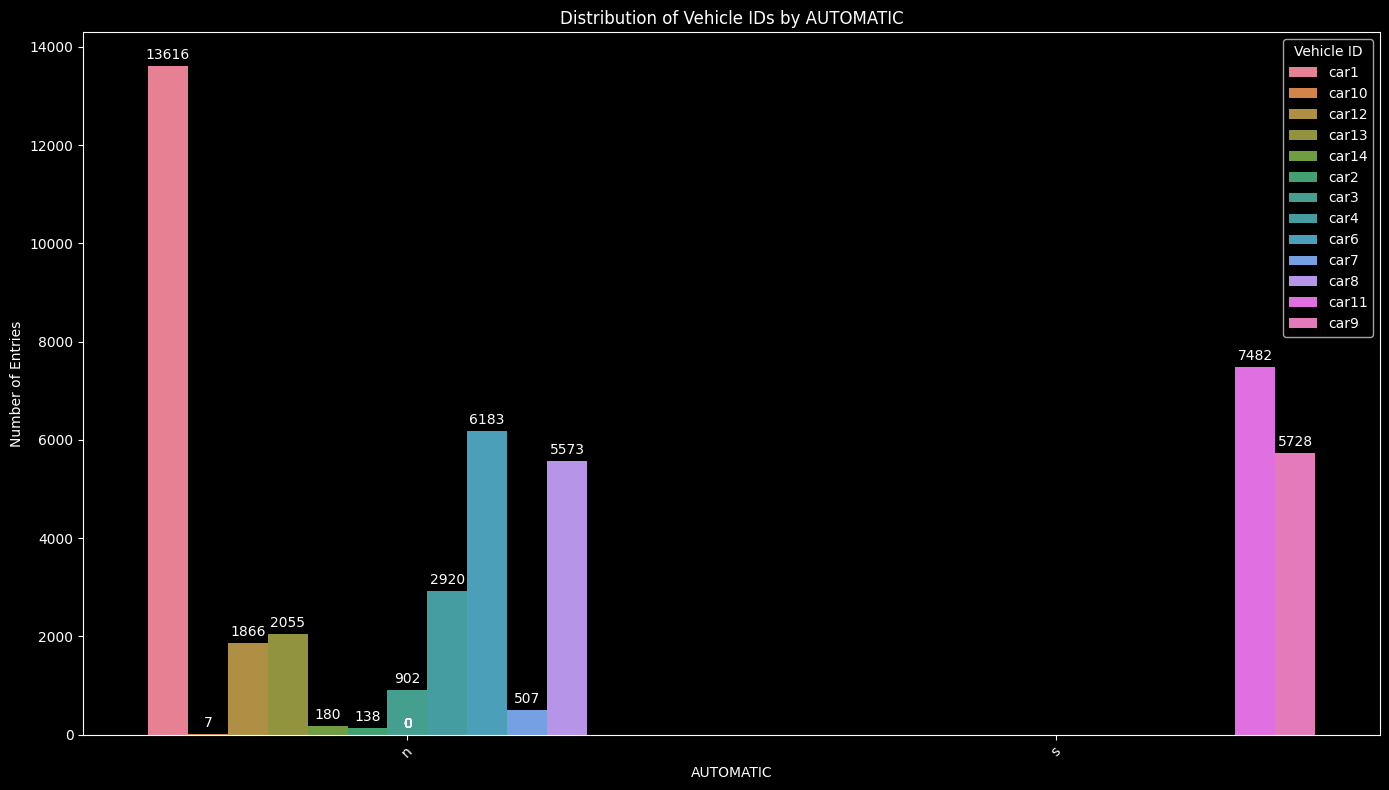

Aggregated counts for each AUTOMATIC and VEHICLE_ID:
   AUTOMATIC VEHICLE_ID  Count
0          n       car1  13616
1          n      car10      7
2          n      car12   1866
3          n      car13   2055
4          n      car14    180
5          n       car2    138
6          n       car3    902
7          n       car4   2920
8          n       car6   6183
9          n       car7    507
10         n       car8   5573
11         s      car11   7482
12         s       car9   5728


In [32]:
grouped_counts = df_EDA2.groupby(['AUTOMATIC', 'VEHICLE_ID']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='AUTOMATIC', y='Count', hue='VEHICLE_ID', data=grouped_counts, palette='husl')

plt.title('Distribution of Vehicle IDs by AUTOMATIC')
plt.xlabel('AUTOMATIC')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Vehicle ID')
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Aggregated counts for each AUTOMATIC and VEHICLE_ID:")
print(grouped_counts)

**_BAROMETRIC_PRESSURE(KPA)_**

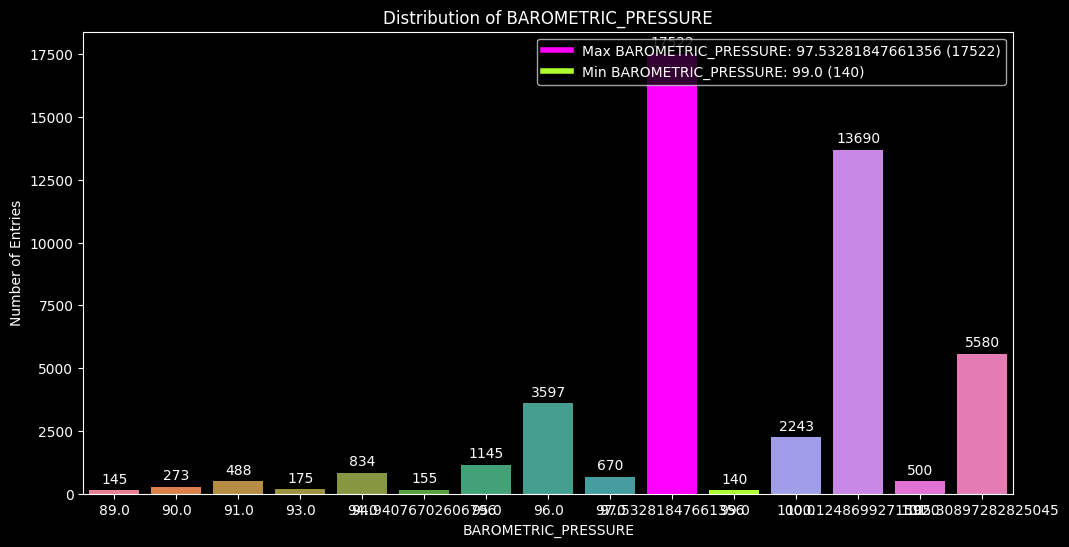

Counts for each BAROMETRIC_PRESSURE:
208_allure: 5728
agile: 13616
c3: 2055
corolla: 7482
duster: 2920
eco_sport: 138
fit: 902
focus: 507
palio: 5573
polo: 6183
siena: 7
versa: 1866
voyage: 180


In [33]:
BAROMETRIC_PRESSURE_counts = df_EDA2['BAROMETRIC_PRESSURE(KPA)'].value_counts().sort_index()
max_BAROMETRIC_PRESSURE = BAROMETRIC_PRESSURE_counts.idxmax()
max_count = BAROMETRIC_PRESSURE_counts.max()
min_BAROMETRIC_PRESSURE = BAROMETRIC_PRESSURE_counts.idxmin()
min_count = BAROMETRIC_PRESSURE_counts.min()
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=BAROMETRIC_PRESSURE_counts.index, y=BAROMETRIC_PRESSURE_counts.values, palette='husl')
bar_plot.patches[BAROMETRIC_PRESSURE_counts.index.get_loc(max_BAROMETRIC_PRESSURE)].set_facecolor('#ff00ff')
bar_plot.patches[BAROMETRIC_PRESSURE_counts.index.get_loc(min_BAROMETRIC_PRESSURE)].set_facecolor('#adff2f')

plt.title('Distribution of BAROMETRIC_PRESSURE')
plt.xlabel('BAROMETRIC_PRESSURE')
plt.ylabel('Number of Entries')

plt.legend(handles=[
    plt.Line2D([0], [0], color='#ff00ff', lw=4, label=f'Max BAROMETRIC_PRESSURE: {max_BAROMETRIC_PRESSURE} ({max_count})'),
    plt.Line2D([0], [0], color='#adff2f', lw=4, label=f'Min BAROMETRIC_PRESSURE: {min_BAROMETRIC_PRESSURE} ({min_count})')
], loc='upper right')


for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()

print("Counts for each BAROMETRIC_PRESSURE:")
for model, count in model_counts.items():
    print(f"{model}: {count}")

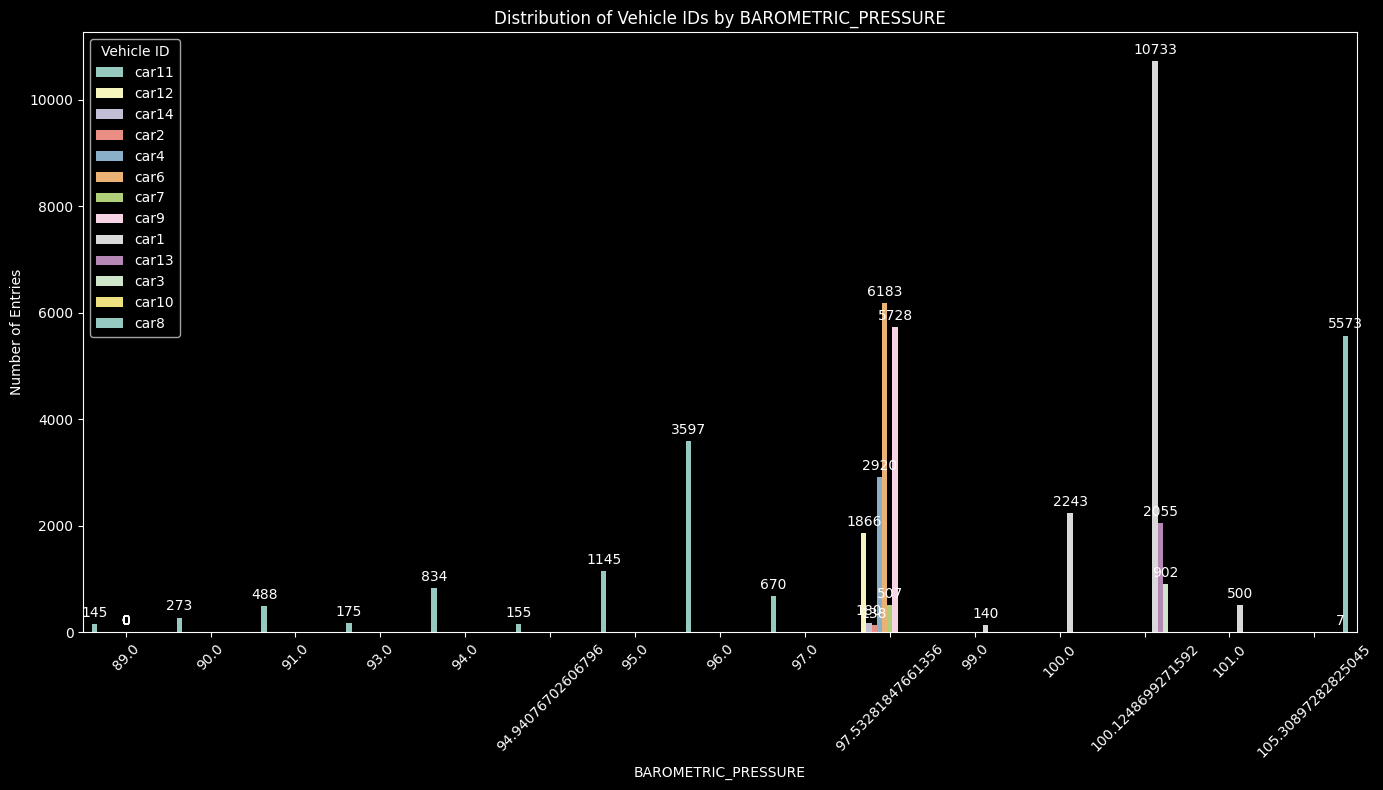

Aggregated counts for each BAROMETRIC_PRESSURE and VEHICLE_ID:
    BAROMETRIC_PRESSURE(KPA) VEHICLE_ID  Count
0                  89.000000      car11    145
1                  90.000000      car11    273
2                  91.000000      car11    488
3                  93.000000      car11    175
4                  94.000000      car11    834
5                  94.940767      car11    155
6                  95.000000      car11   1145
7                  96.000000      car11   3597
8                  97.000000      car11    670
9                  97.532818      car12   1866
10                 97.532818      car14    180
11                 97.532818       car2    138
12                 97.532818       car4   2920
13                 97.532818       car6   6183
14                 97.532818       car7    507
15                 97.532818       car9   5728
16                 99.000000       car1    140
17                100.000000       car1   2243
18                100.124870       car1  107

In [34]:
grouped_counts = df_EDA2.groupby(['BAROMETRIC_PRESSURE(KPA)', 'VEHICLE_ID']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='BAROMETRIC_PRESSURE(KPA)', y='Count', hue='VEHICLE_ID', data=grouped_counts, palette='Set3')

plt.title('Distribution of Vehicle IDs by BAROMETRIC_PRESSURE')
plt.xlabel('BAROMETRIC_PRESSURE')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Vehicle ID')
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Aggregated counts for each BAROMETRIC_PRESSURE and VEHICLE_ID:")
print(grouped_counts)

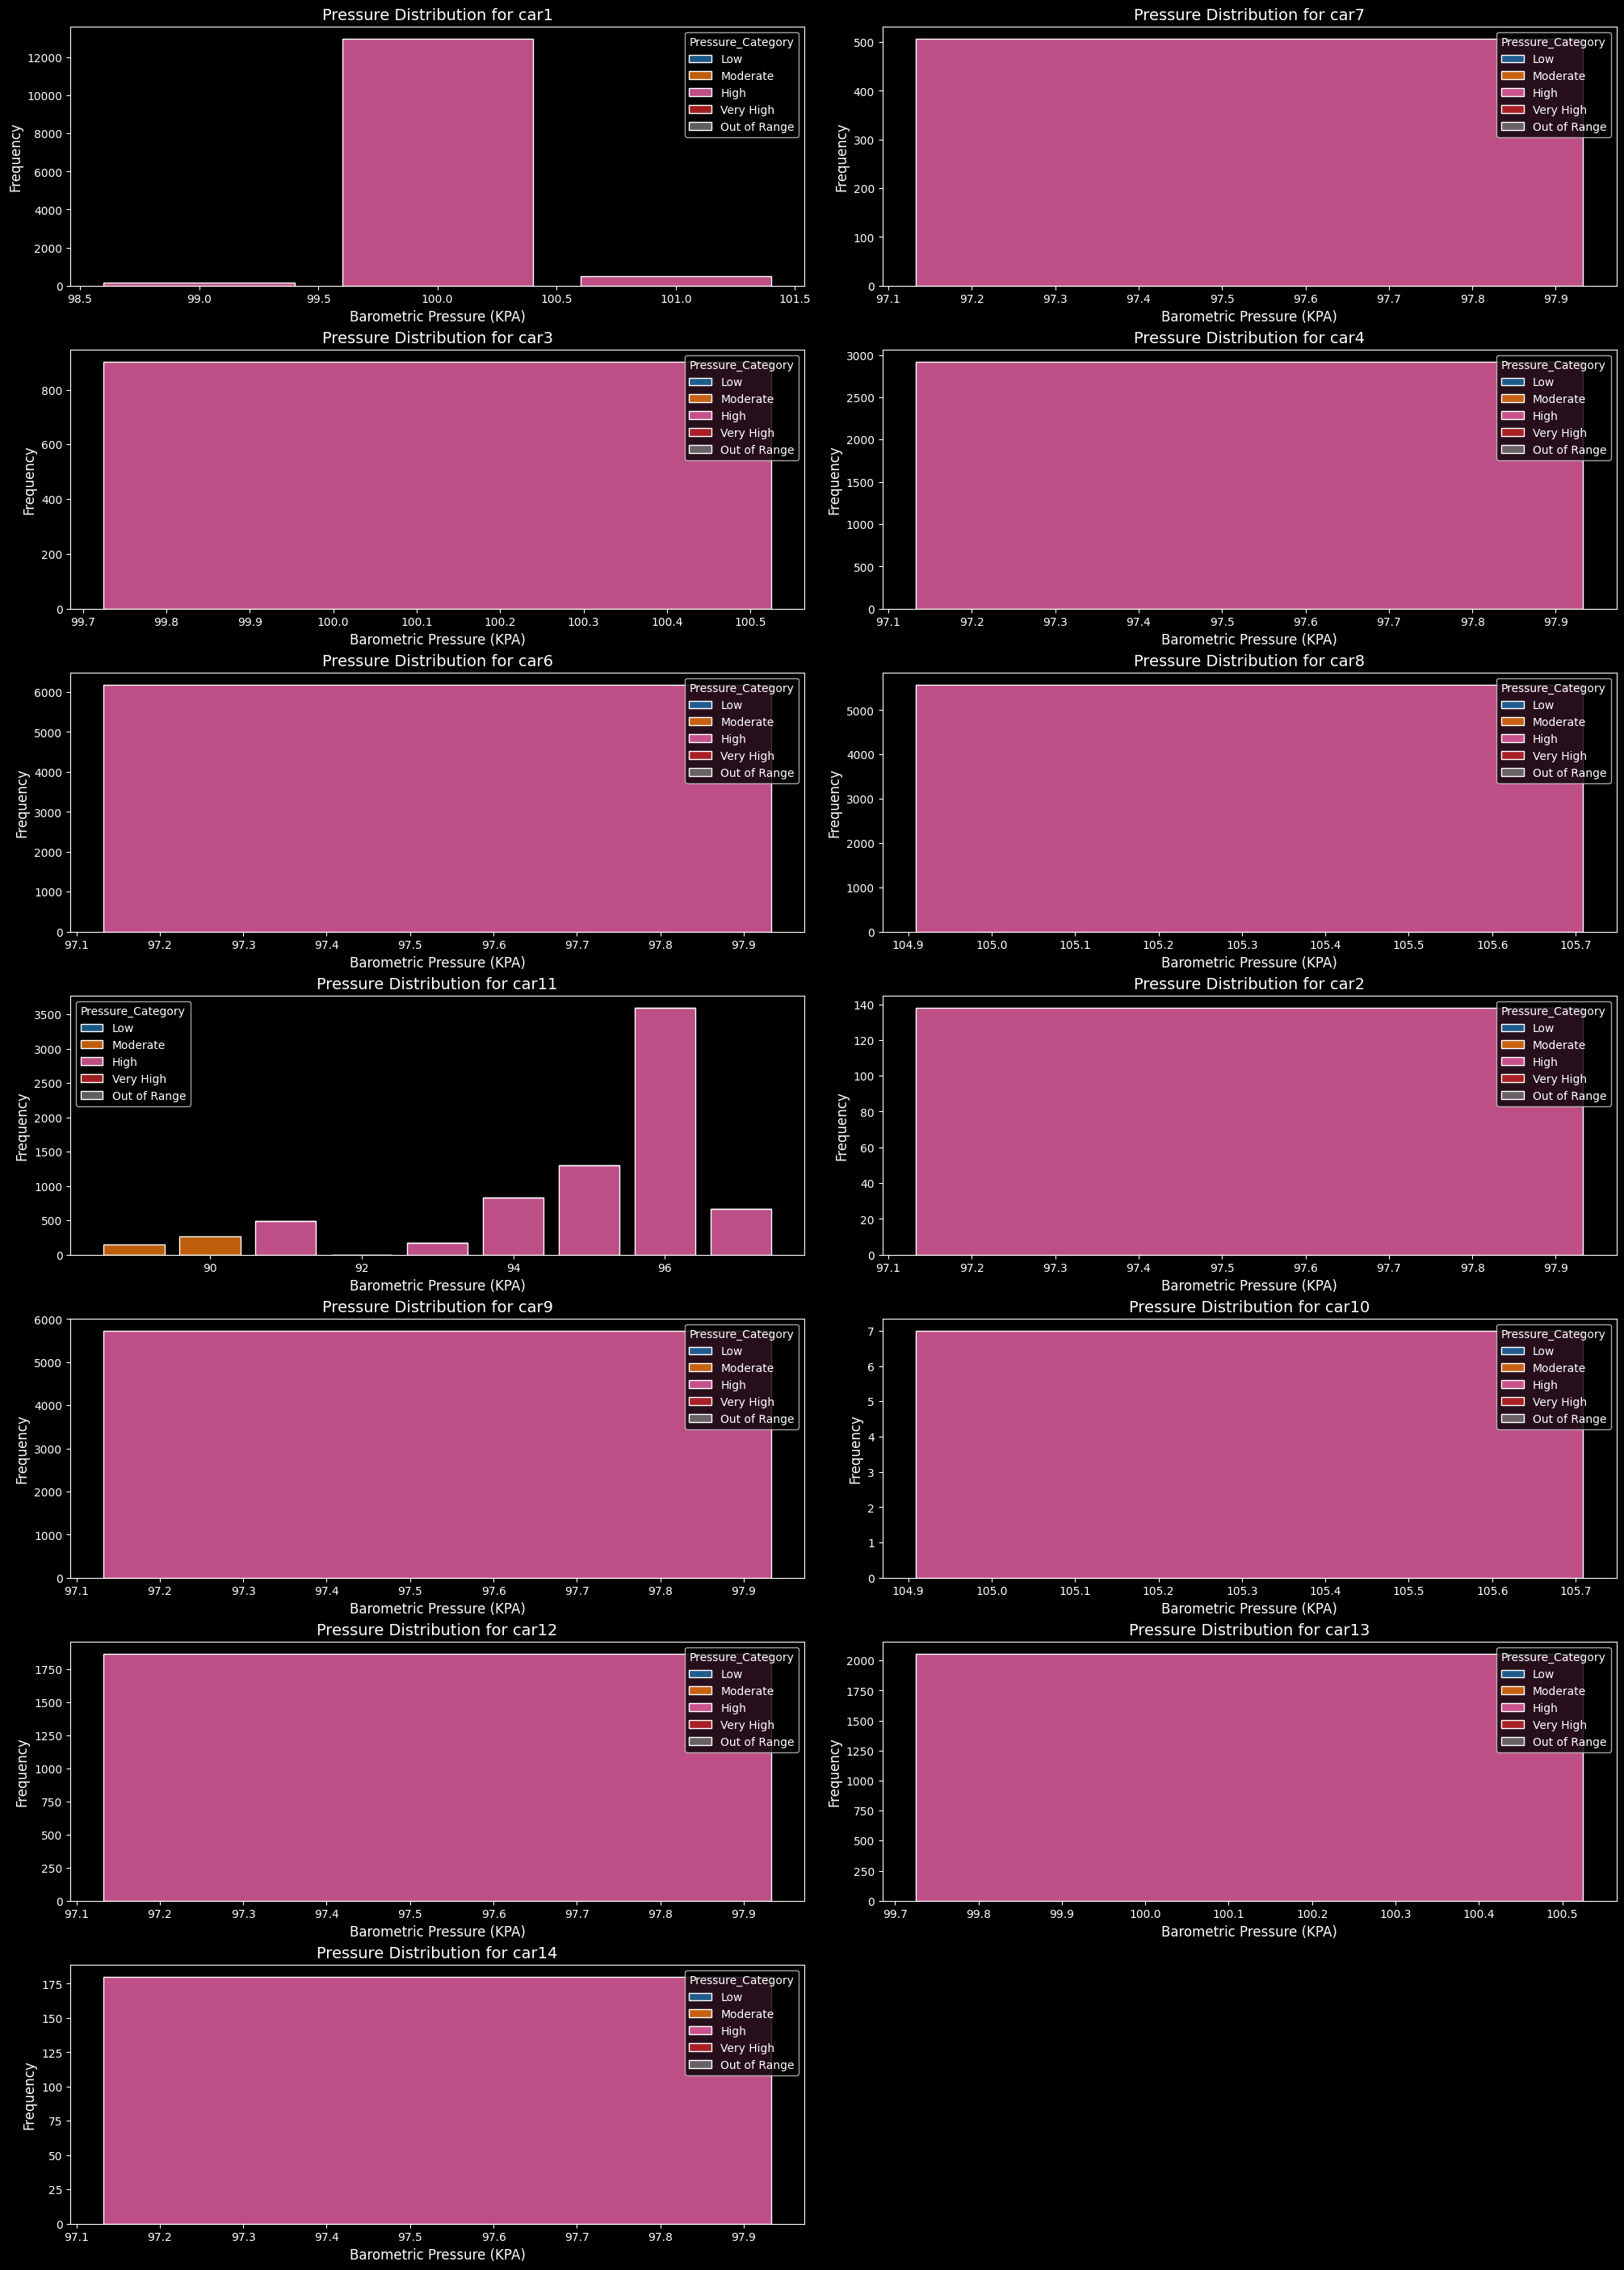

Counts for each vehicle and pressure category:

car1:
  Low: 0
  Moderate: 0
  High: 13616
  Very High: 0
  Out of Range: 0

car7:
  Low: 0
  Moderate: 0
  High: 507
  Very High: 0
  Out of Range: 0

car3:
  Low: 0
  Moderate: 0
  High: 902
  Very High: 0
  Out of Range: 0

car4:
  Low: 0
  Moderate: 0
  High: 2920
  Very High: 0
  Out of Range: 0

car6:
  Low: 0
  Moderate: 0
  High: 6183
  Very High: 0
  Out of Range: 0

car8:
  Low: 0
  Moderate: 0
  High: 5573
  Very High: 0
  Out of Range: 0

car11:
  Low: 0
  Moderate: 418
  High: 7064
  Very High: 0
  Out of Range: 0

car2:
  Low: 0
  Moderate: 0
  High: 138
  Very High: 0
  Out of Range: 0

car9:
  Low: 0
  Moderate: 0
  High: 5728
  Very High: 0
  Out of Range: 0

car10:
  Low: 0
  Moderate: 0
  High: 7
  Very High: 0
  Out of Range: 0

car12:
  Low: 0
  Moderate: 0
  High: 1866
  Very High: 0
  Out of Range: 0

car13:
  Low: 0
  Moderate: 0
  High: 2055
  Very High: 0
  Out of Range: 0

car14:
  Low: 0
  Moderate: 0
  High: 1

In [35]:
pressure_ranges = {
    'Low': (0, 70),        # Example values; adjust as needed
    'Moderate': (71, 90),
    'High': (91, 110),
    'Very High': (111, 130)
}

range_colors = {
    'Low': '#1f77b4',       # Blue
    'Moderate': '#ff7f0e',  # Orange
    'High': '#ff69b4',      # Pink
    'Very High': '#d62728', # Red
    'Out of Range': '#7f7f7f' # Gray for out of range
}
unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]


    vehicle_data['Pressure_Category'] = pd.cut(
        vehicle_data['BAROMETRIC_PRESSURE(KPA)'],
        bins=[-np.inf] + [v[1] for v in pressure_ranges.values()] + [np.inf],
        labels=list(pressure_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Pressure_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts


    sns.histplot(
        data=vehicle_data, x='BAROMETRIC_PRESSURE(KPA)', hue='Pressure_Category', palette=range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Pressure Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Barometric Pressure (KPA)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)


for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()


print("Counts for each vehicle and pressure category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


**_ENGINE_LOAD_**

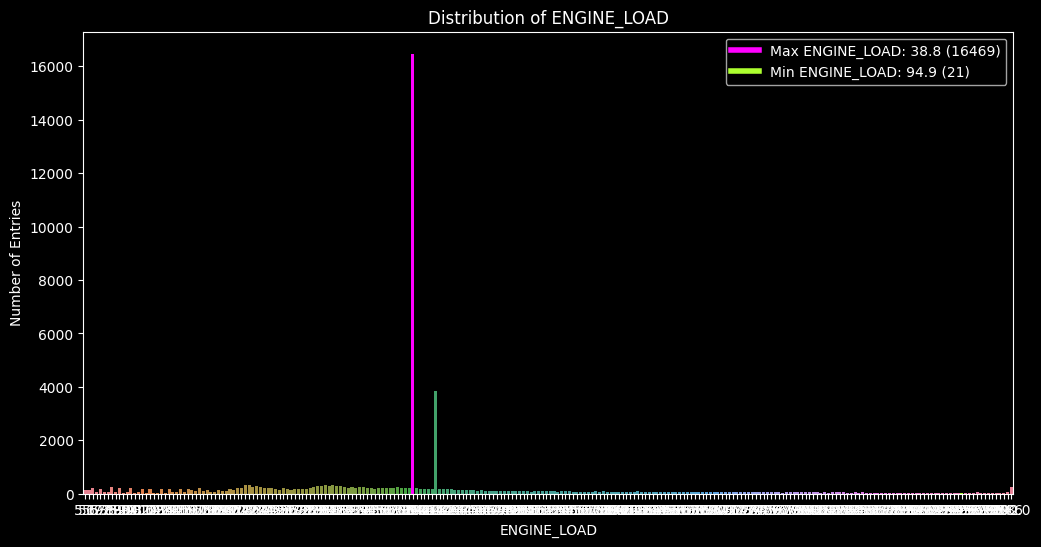

Counts for each mark:
5.1: 150
5.5: 142
5.9: 210
6.3: 83
6.7: 183
7.1: 49
7.5: 59
7.8: 246
8.2: 53
8.6: 204
9.0: 37
9.4: 48
9.8: 204
10.2: 37
10.6: 50
11.0: 189
11.4: 33
11.8: 194
12.2: 24
12.5: 26
12.9: 170
13.3: 37
13.7: 186
14.1: 83
14.5: 78
14.9: 191
15.3: 63
15.7: 185
16.1: 146
16.5: 116
16.9: 207
17.3: 119
17.6: 143
18.0: 60
18.4: 83
18.8: 145
19.2: 87
19.6: 114
20.0: 162
20.4: 144
20.8: 202
21.2: 223
21.6: 318
22.0: 312
22.4: 252
22.7: 291
23.1: 251
23.5: 208
23.9: 219
24.3: 198
24.7: 183
25.1: 153
25.5: 204
25.9: 162
26.3: 158
26.7: 179
27.1: 177
27.5: 178
27.8: 181
28.2: 228
28.6: 253
29.0: 289
29.4: 273
29.8: 342
30.2: 305
30.6: 308
31.0: 291
31.4: 289
31.8: 250
32.2: 229
32.5: 243
32.9: 228
33.3: 238
33.7: 267
34.1: 228
34.5: 197
34.9: 188
35.3: 208
35.7: 221
36.1: 205
36.5: 210
36.9: 222
37.3: 238
37.6: 229
38.0: 196
38.4: 228
38.8: 16469
39.2: 219
39.6: 180
40.0: 177
40.4: 178
40.8: 178
41.0: 3848
41.2: 176
41.6: 171
42.0: 171
42.4: 166
42.7: 143
43.1: 147
43.5: 153
43.9: 

In [36]:

ENGINE_LOAD_counts = df_EDA2['ENGINE_LOAD'].value_counts().sort_index()
max_ENGINE_LOAD = ENGINE_LOAD_counts.idxmax()
max_count = ENGINE_LOAD_counts.max()
min_ENGINE_LOAD = ENGINE_LOAD_counts.idxmin()
min_count = ENGINE_LOAD_counts.min()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=ENGINE_LOAD_counts.index, y=ENGINE_LOAD_counts.values, palette='husl')

bar_plot.patches[ENGINE_LOAD_counts.index.get_loc(max_ENGINE_LOAD)].set_facecolor('#ff00ff')
bar_plot.patches[ENGINE_LOAD_counts.index.get_loc(min_ENGINE_LOAD)].set_facecolor('#adff2f')


plt.title('Distribution of ENGINE_LOAD')
plt.xlabel('ENGINE_LOAD')
plt.ylabel('Number of Entries')


plt.legend(handles=[
    plt.Line2D([0], [0], color='#ff00ff', lw=4, label=f'Max ENGINE_LOAD: {max_ENGINE_LOAD} ({max_count})'),
    plt.Line2D([0], [0], color='#adff2f', lw=4, label=f'Min ENGINE_LOAD: {min_ENGINE_LOAD} ({min_count})')
], loc='upper right')

'''for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')'''

plt.show()


print("Counts for each mark:")
for ENGINE_LOAD, count in ENGINE_LOAD_counts.items():
    print(f"{ENGINE_LOAD}: {count}")

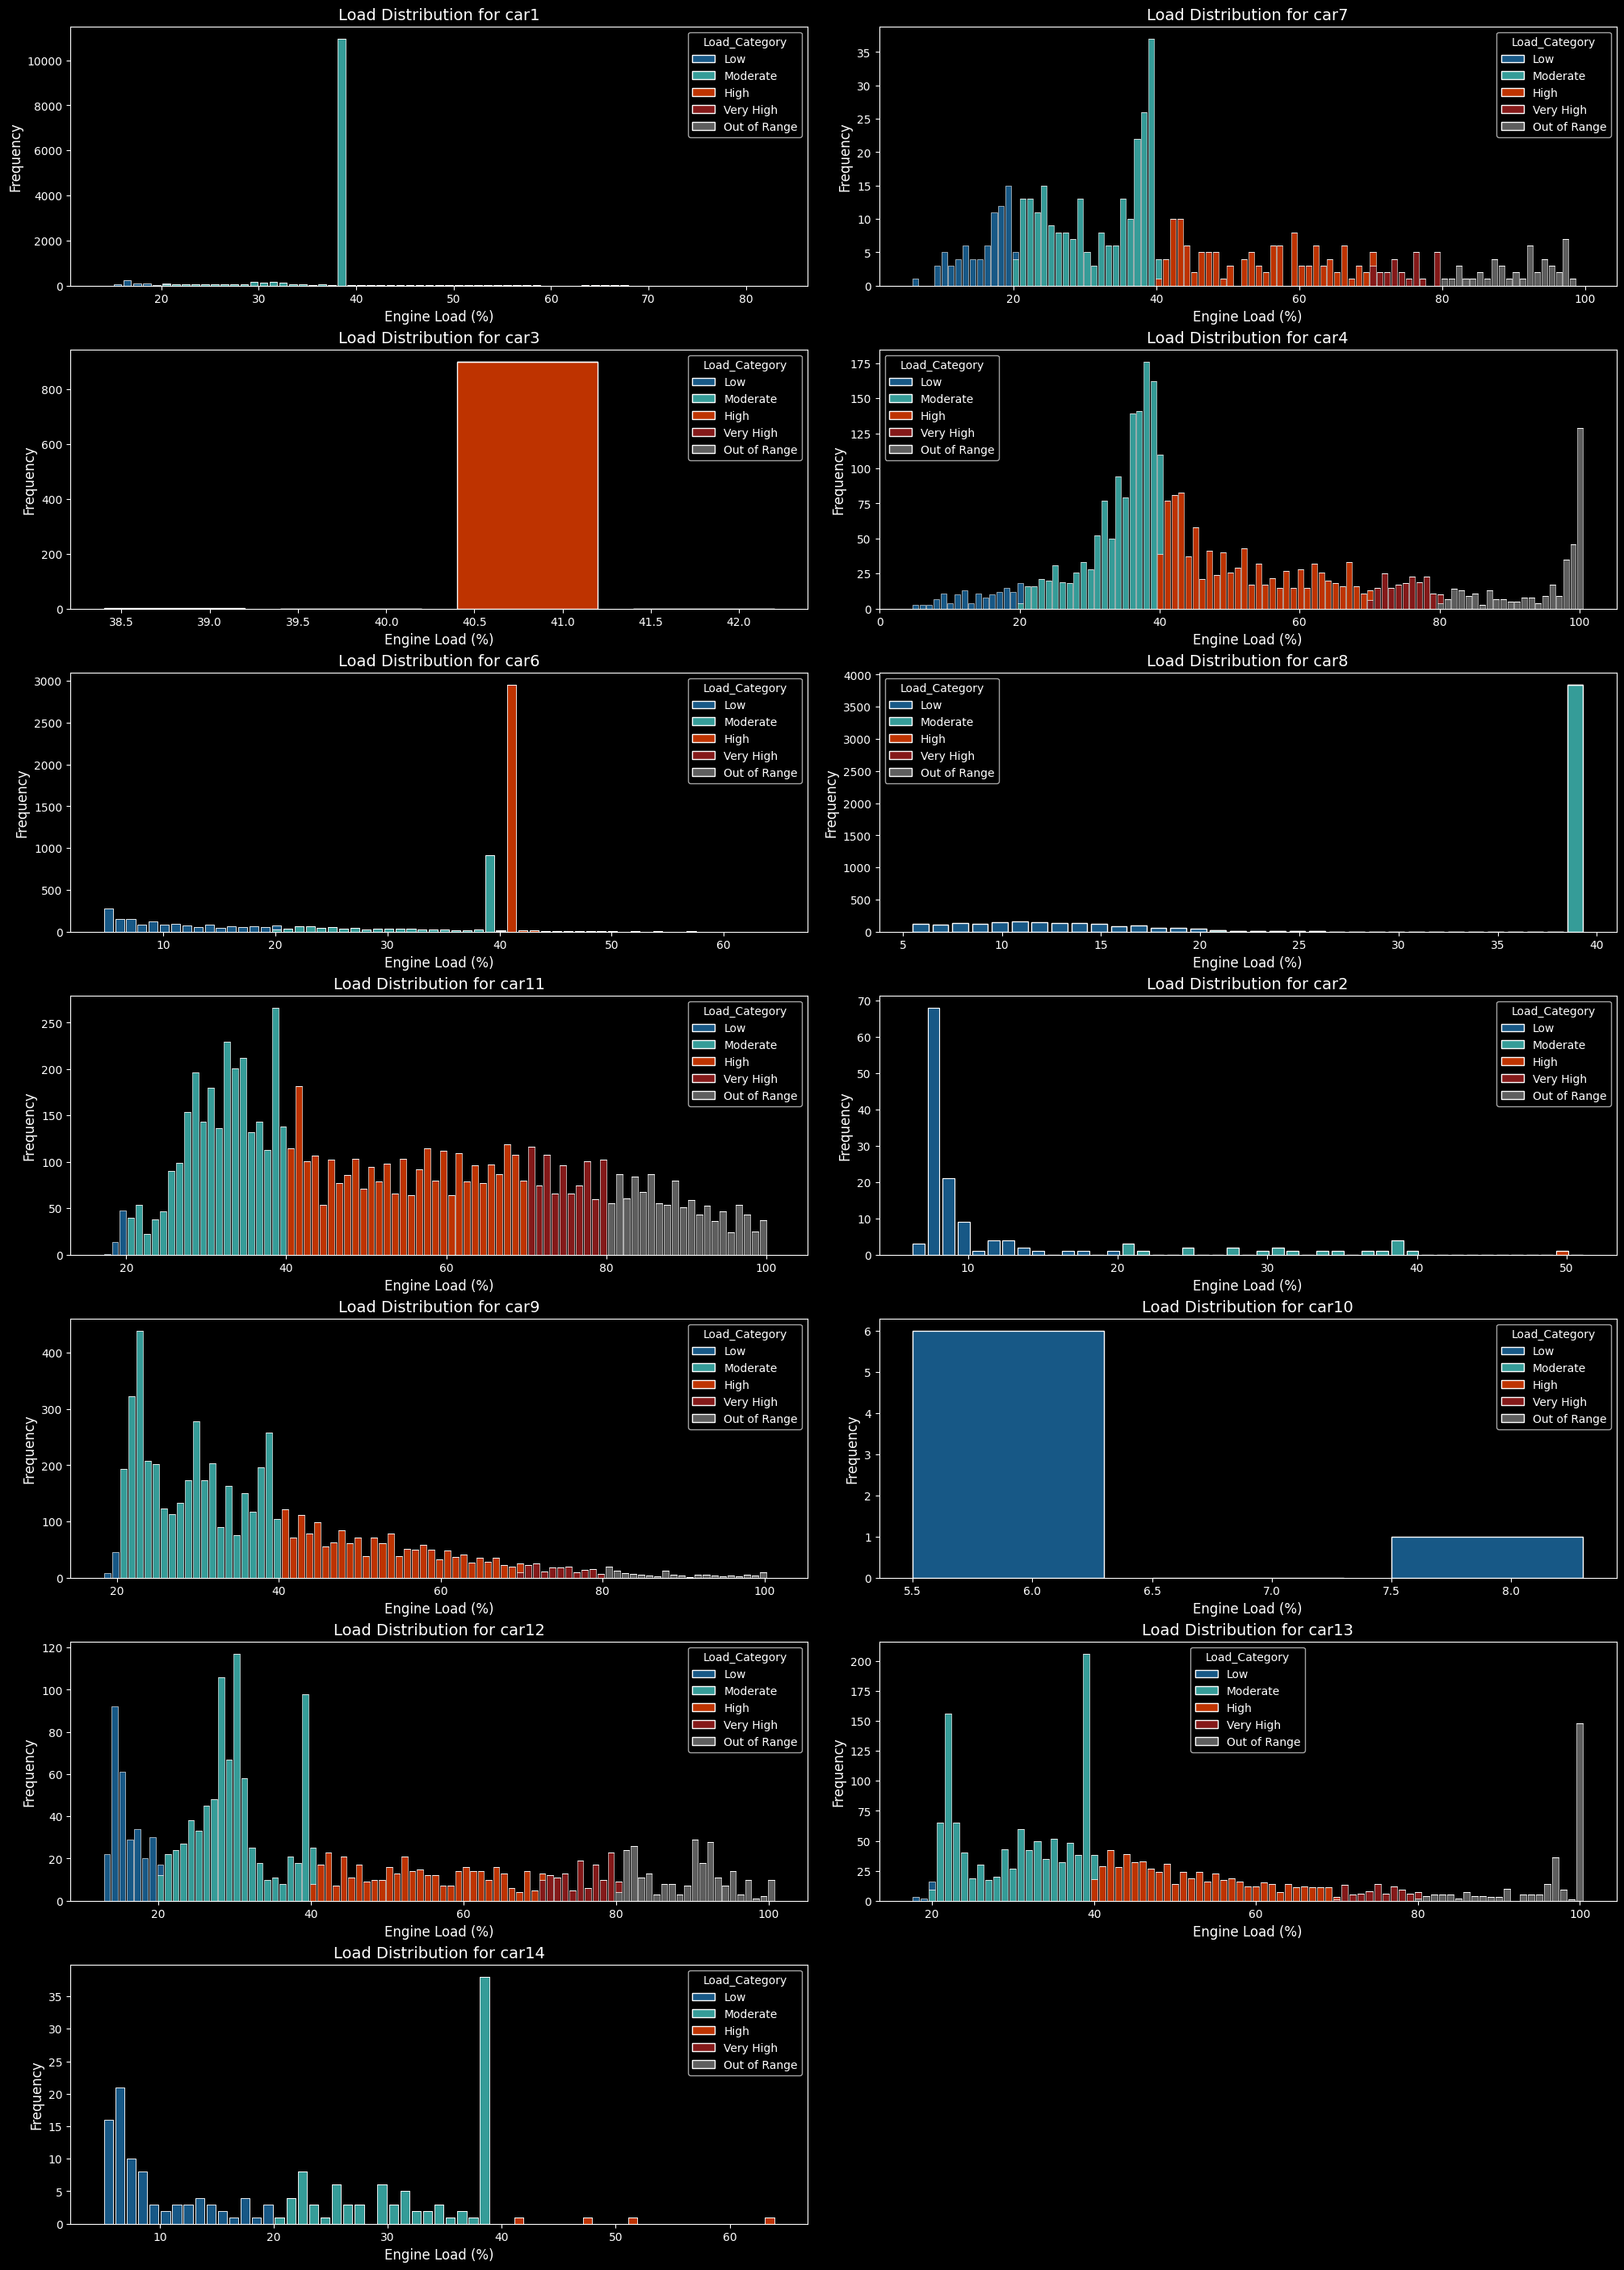

Counts for each vehicle and load category:

car1:
  Low: 582
  Moderate: 12441
  High: 579
  Very High: 13
  Out of Range: 1

car7:
  Low: 75
  Moderate: 240
  High: 121
  Very High: 25
  Out of Range: 46

car3:
  Low: 0
  Moderate: 1
  High: 901
  Very High: 0
  Out of Range: 0

car4:
  Low: 140
  Moderate: 1273
  High: 966
  Very High: 178
  Out of Range: 363

car6:
  Low: 1507
  Moderate: 1614
  High: 3062
  Very High: 0
  Out of Range: 0

car8:
  Low: 1663
  Moderate: 3910
  High: 0
  Very High: 0
  Out of Range: 0

car11:
  Low: 63
  Moderate: 2633
  High: 2818
  Very High: 865
  Out of Range: 1103

car2:
  Low: 116
  Moderate: 21
  High: 1
  Very High: 0
  Out of Range: 0

car9:
  Low: 54
  Moderate: 3719
  High: 1662
  Very High: 168
  Out of Range: 125

car10:
  Low: 7
  Moderate: 0
  High: 0
  Very High: 0
  Out of Range: 0

car12:
  Low: 293
  Moderate: 823
  High: 379
  Very High: 131
  Out of Range: 240

car13:
  Low: 12
  Moderate: 1074
  High: 607
  Very High: 85
  Out of

In [37]:
load_ranges = {
    'Low': (0, 20),
    'Moderate': (21, 40),
    'High': (41, 70),
    'Very High': (71, 80)
}

range_colors = {
    'Low': '#1f77b4',       # Blue
    'Moderate': '#48d1cc',  # Aqua
    'High': '#ff4500',      # Orange
    'Very High': '#b22222', # Red
    'Out of Range': '#7f7f7f' # Gray for out of range
}


unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['ENGINE_LOAD'])
    vehicle_data['Load_Category'] = pd.cut(
        vehicle_data['ENGINE_LOAD'],
        bins=[-np.inf] + [v[1] for v in load_ranges.values()] + [np.inf],
        labels=list(load_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Load_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts


    sns.histplot(
        data=vehicle_data, x='ENGINE_LOAD', hue='Load_Category', palette=range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Load Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Engine Load (%)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)


for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()


print("Counts for each vehicle and load category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


In [38]:
Cars_Engine_Evalution={'car1':'G','car2':'B','car3':'N','car4':'N','car6':'B','car7':'N','car8':'G','car9':'G','car10':'B','car11':'N','car12':'N','car13':'N','car14':'G'}
# #Good:Overall use 20--->70 mostly
# #Need Attention use lower than 20 or higher 70-->80
# #Critical issues exceed 80 highly and also classfied as Attentio

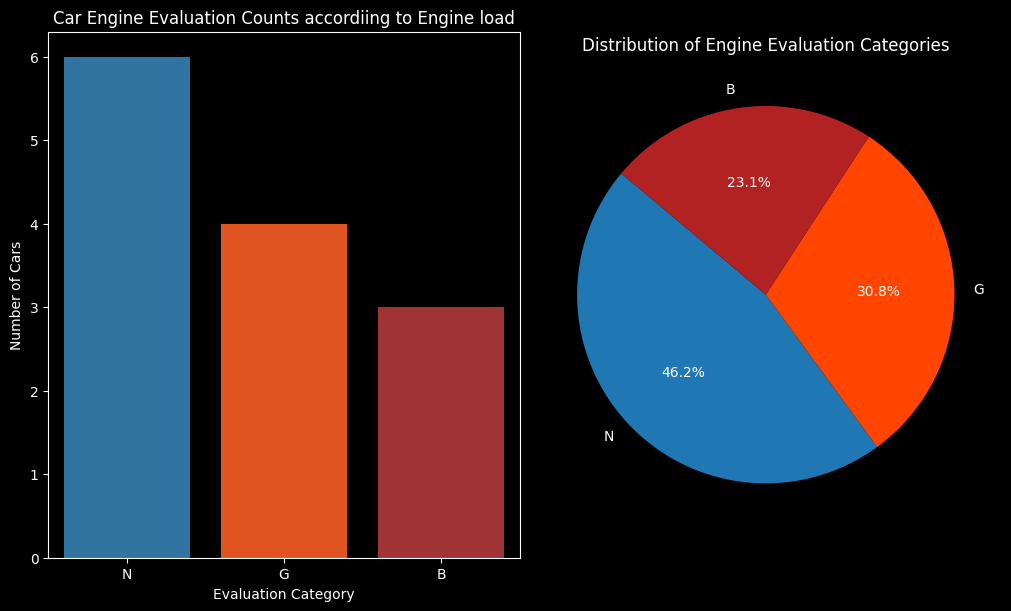

In [39]:

df_eval = pd.DataFrame(list(Cars_Engine_Evalution.items()), columns=['Vehicle', 'Evaluation'])


eval_counts = df_eval['Evaluation'].value_counts()


fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#1f77b4', '#ff4500', '#b22222'], ax=ax[0])
ax[0].set_title('Car Engine Evaluation Counts accordiing to Engine load')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#1f77b4', '#ff4500', '#b22222'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Engine Evaluation Categories')

# Show plots
plt.show()

**_AMBIENT_AIR_TEMP_**

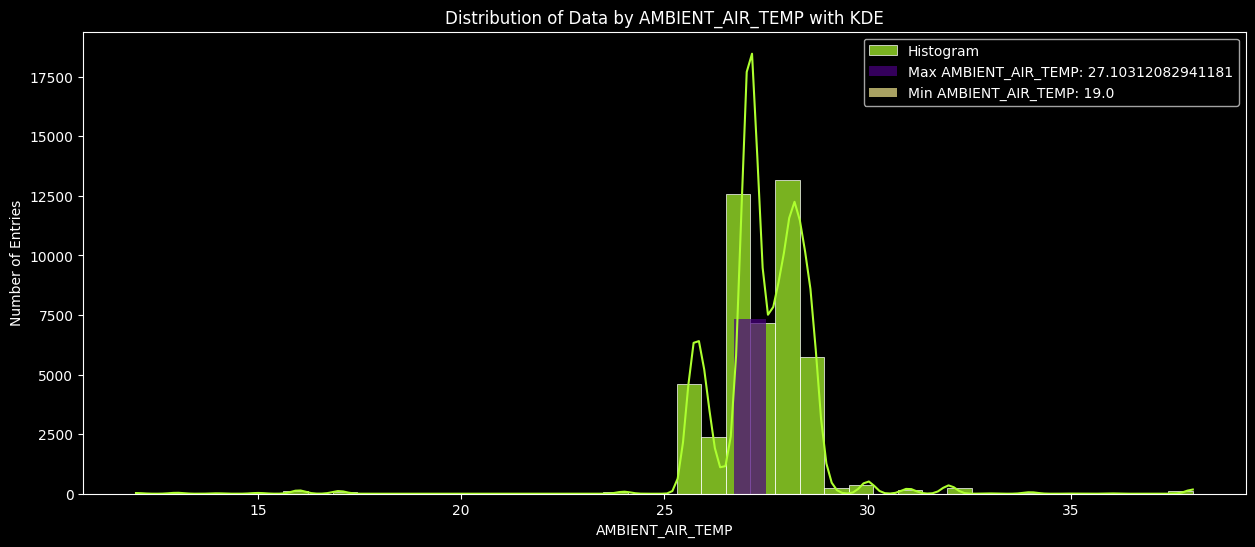

Counts for each AMBIENT_AIR_TEMP_counts:
22.0: 1
23.0: 2
24.0: 6
25.0: 3
26.0: 6
27.0: 13
28.0: 7
29.0: 7
30.0: 14
31.0: 12
32.0: 10
33.0: 16
34.0: 15
35.0: 15
36.0: 29
37.0: 16
38.0: 21
39.0: 33
40.0: 25
41.0: 19
42.0: 44
43.0: 31
44.0: 30
45.0: 52
46.0: 45
47.0: 46
48.0: 85
49.0: 42
50.0: 59
51.0: 122
52.0: 94
53.0: 115
54.0: 209
55.0: 103
56.0: 110
57.0: 214
58.0: 109
59.0: 101
60.0: 176
61.0: 102
62.0: 99
63.0: 232
64.0: 115
65.0: 134
66.0: 243
67.0: 153
68.0: 190
69.0: 317
70.0: 194
71.0: 188
72.0: 446
73.0: 329
74.0: 325
75.0: 1284
76.0: 766
77.0: 1034
78.0: 1795
79.0: 1118
80.0: 1280
81.0: 1290
81.75010323874697: 13255
82.0: 749
83.0: 938
84.0: 1422
85.0: 2415
86.0: 3218
87.0: 1852
88.0: 2039
89.0: 862
90.0: 1210
91.0: 933
92.0: 580
93.0: 1242
94.0: 548
95.0: 632
96.0: 466
97.0: 284
98.0: 348
99.0: 168
100.0: 179
101.0: 37
102.0: 60
103.0: 15
104.0: 13
105.0: 1


In [40]:
AMBIENT_AIR_TEMP_counts = df_EDA2['AMBIENT_AIR_TEMP'].value_counts().sort_index()

max_AMBIENT_AIR_TEMP = AMBIENT_AIR_TEMP_counts.idxmax()
max_count = AMBIENT_AIR_TEMP_counts.max()
min_AMBIENT_AIR_TEMP = AMBIENT_AIR_TEMP_counts.idxmin()
min_count = AMBIENT_AIR_TEMP_counts.min()

plt.figure(figsize=(15, 6))

sns.histplot(df_EDA2['AMBIENT_AIR_TEMP'], bins=len(AMBIENT_AIR_TEMP_counts), kde=True, color='#adff2f', alpha=0.7, linewidth=0.5, label='Histogram')

plt.bar(max_AMBIENT_AIR_TEMP, max_count, color='#4b0082', label=f'Max AMBIENT_AIR_TEMP: {max_AMBIENT_AIR_TEMP}', alpha=0.7)
plt.bar(min_AMBIENT_AIR_TEMP, min_count, color='#f0e68c', label=f'Min AMBIENT_AIR_TEMP: {min_AMBIENT_AIR_TEMP}', alpha=0.7)

plt.title('Distribution of Data by AMBIENT_AIR_TEMP with KDE')
plt.xlabel('AMBIENT_AIR_TEMP')
plt.ylabel('Number of Entries')
plt.legend()
plt.show()
print("Counts for each AMBIENT_AIR_TEMP_counts:")
for ENGINE_COOLANT_TEMP, count in ENGINE_COOLANT_TEMP_counts.items():
    print(f"{ENGINE_COOLANT_TEMP}: {count}")

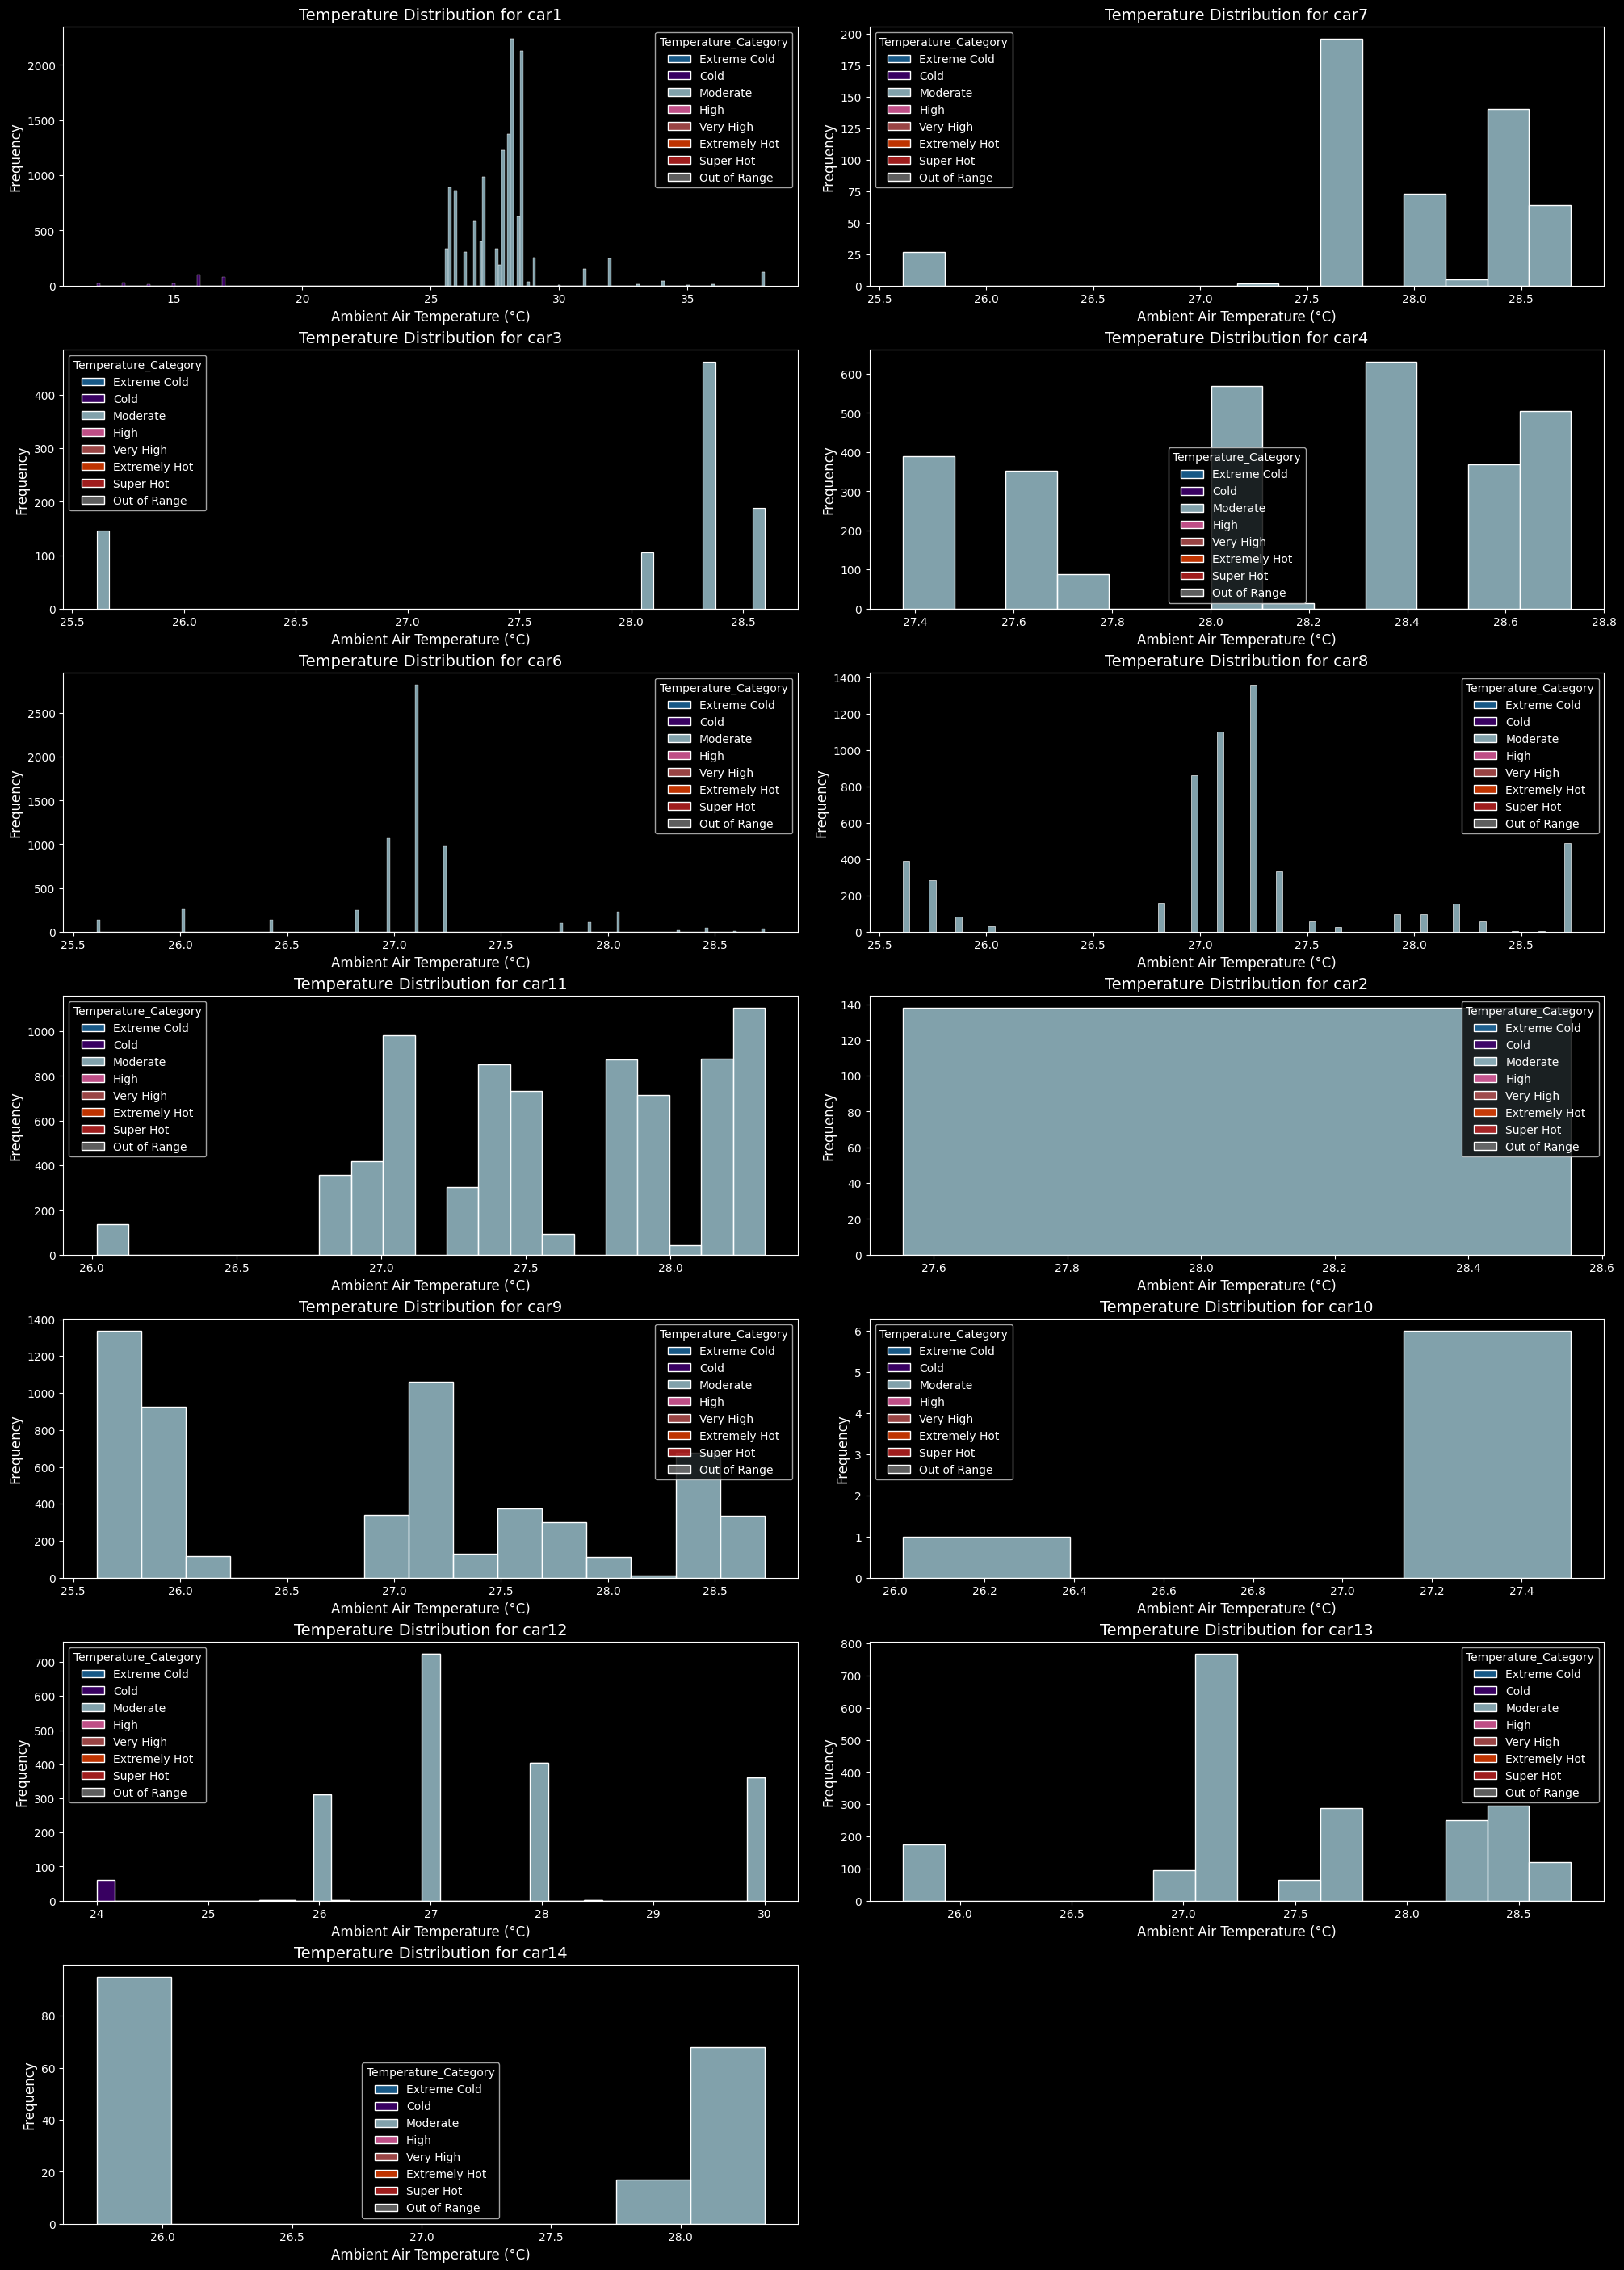

Counts for each vehicle and temperature category:

car1:
  Extreme Cold: 0
  Cold: 262
  Moderate: 13354
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car7:
  Extreme Cold: 0
  Cold: 0
  Moderate: 507
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car3:
  Extreme Cold: 0
  Cold: 0
  Moderate: 902
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car4:
  Extreme Cold: 0
  Cold: 0
  Moderate: 2920
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car6:
  Extreme Cold: 0
  Cold: 0
  Moderate: 6183
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car8:
  Extreme Cold: 0
  Cold: 0
  Moderate: 5573
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car11:
  Extreme Cold: 0
  Cold: 0
  Moderate: 7482
  High: 0
  Very High: 0
  Extremely Hot: 0
  Super Hot: 0
  Out of Range: 0

car2:
  Extreme Cold: 0
  Cold: 0
  Moderate

In [41]:
temperature_ranges = {
    'Extreme Cold': (-40, 0),
    'Cold': (0, 25),
    'Moderate': (25, 40),
    'High': (40, 60),
    'Very High': (60, 105),
    'Extremely Hot': (105, 150),
    'Super Hot': (150, 215)
}

range_colors = {
    'Extreme Cold': '#1f77b4',     # Blue
    'Cold': '#4b0082',            # Indigo
    'Moderate': '#add8e6',        # Light Blue
    'High': '#ff69b4',            # Pink
    'Very High': '#cd5c5c',       # Red
    'Extremely Hot': '#ff4500',   # Orange
    'Super Hot': '#d62728',       # Dark Red
    'Out of Range': '#7f7f7f'     # Gray for out of range
}

# Assuming df_cleaned is your DataFrame
# Convert AMBIENT_AIR_TEMP to numeric, handling any potential non-numeric values
df_EDA2['AMBIENT_AIR_TEMP'] = pd.to_numeric(df_EDA2['AMBIENT_AIR_TEMP'], errors='coerce')

# Extract unique vehicle IDs
unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]

    # Categorize AMBIENT_AIR_TEMP
    vehicle_data['Temperature_Category'] = pd.cut(
        vehicle_data['AMBIENT_AIR_TEMP'],
        bins=[-np.inf] + [v[1] for v in temperature_ranges.values()] + [np.inf],
        labels=list(temperature_ranges.keys()) + ['Out of Range']
    )

    # Count occurrences in each category
    counts = vehicle_data['Temperature_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    # Plot the data
    sns.histplot(
        data=vehicle_data, x='AMBIENT_AIR_TEMP', hue='Temperature_Category', palette=range_colors,
        ax=ax, multiple='stack'
    )

    ax.set_title(f'Temperature Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Ambient Air Temperature (°C)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print counts for each vehicle and temperature category
print("Counts for each vehicle and temperature category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")

**_INTAKE_MANIFOLD_PRESSURE_**

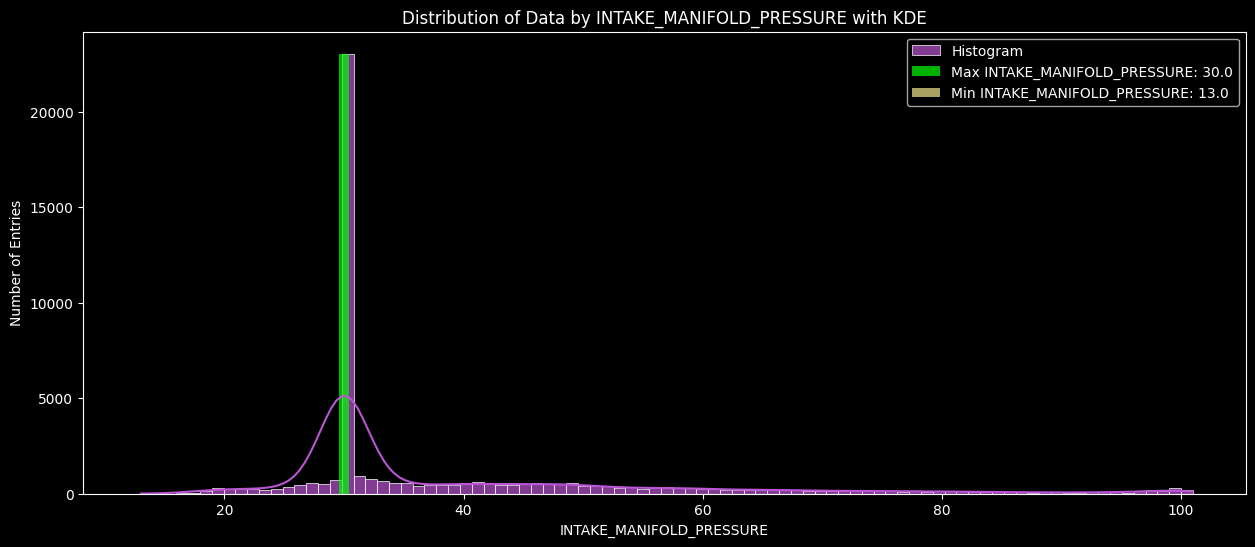

Counts for each INTAKE_MANIFOLD_PRESSURE_counts:
22.0: 1
23.0: 2
24.0: 6
25.0: 3
26.0: 6
27.0: 13
28.0: 7
29.0: 7
30.0: 14
31.0: 12
32.0: 10
33.0: 16
34.0: 15
35.0: 15
36.0: 29
37.0: 16
38.0: 21
39.0: 33
40.0: 25
41.0: 19
42.0: 44
43.0: 31
44.0: 30
45.0: 52
46.0: 45
47.0: 46
48.0: 85
49.0: 42
50.0: 59
51.0: 122
52.0: 94
53.0: 115
54.0: 209
55.0: 103
56.0: 110
57.0: 214
58.0: 109
59.0: 101
60.0: 176
61.0: 102
62.0: 99
63.0: 232
64.0: 115
65.0: 134
66.0: 243
67.0: 153
68.0: 190
69.0: 317
70.0: 194
71.0: 188
72.0: 446
73.0: 329
74.0: 325
75.0: 1284
76.0: 766
77.0: 1034
78.0: 1795
79.0: 1118
80.0: 1280
81.0: 1290
81.75010323874697: 13255
82.0: 749
83.0: 938
84.0: 1422
85.0: 2415
86.0: 3218
87.0: 1852
88.0: 2039
89.0: 862
90.0: 1210
91.0: 933
92.0: 580
93.0: 1242
94.0: 548
95.0: 632
96.0: 466
97.0: 284
98.0: 348
99.0: 168
100.0: 179
101.0: 37
102.0: 60
103.0: 15
104.0: 13
105.0: 1


In [42]:
INTAKE_MANIFOLD_PRESSURE_counts = df_EDA2['INTAKE_MANIFOLD_PRESSURE'].value_counts().sort_index()

max_INTAKE_MANIFOLD_PRESSURE = INTAKE_MANIFOLD_PRESSURE_counts.idxmax()
max_count = INTAKE_MANIFOLD_PRESSURE_counts.max()
min_INTAKE_MANIFOLD_PRESSURE = INTAKE_MANIFOLD_PRESSURE_counts.idxmin()
min_count = INTAKE_MANIFOLD_PRESSURE_counts.min()

plt.figure(figsize=(15, 6))

sns.histplot(df_EDA2['INTAKE_MANIFOLD_PRESSURE'], bins=len(INTAKE_MANIFOLD_PRESSURE_counts), kde=True, color='#ba55d3', alpha=0.7, linewidth=0.5, label='Histogram')

plt.bar(max_INTAKE_MANIFOLD_PRESSURE, max_count, color='#00ff00', label=f'Max INTAKE_MANIFOLD_PRESSURE: {max_INTAKE_MANIFOLD_PRESSURE}', alpha=0.7)
plt.bar(min_INTAKE_MANIFOLD_PRESSURE, min_count, color='#f0e68c', label=f'Min INTAKE_MANIFOLD_PRESSURE: {min_INTAKE_MANIFOLD_PRESSURE}', alpha=0.7)

plt.title('Distribution of Data by INTAKE_MANIFOLD_PRESSURE with KDE')
plt.xlabel('INTAKE_MANIFOLD_PRESSURE')
plt.ylabel('Number of Entries')
plt.legend()
plt.show()
print("Counts for each INTAKE_MANIFOLD_PRESSURE_counts:")
for ENGINE_COOLANT_TEMP, count in ENGINE_COOLANT_TEMP_counts.items():
    print(f"{ENGINE_COOLANT_TEMP}: {count}")

# INTAKE_MANIFOLD_PRESSURE VS CARS

In [43]:
df_EDA2['INTAKE_MANIFOLD_PRESSURE'].unique()

array([ 49.,  52.,  51.,  50.,  53.,  92.,  47.,  33.,  46.,  58.,  45.,
        78.,  48.,  65.,  41.,  37.,  60.,  79.,  63.,  56.,  32.,  38.,
        40.,  39.,  54.,  26.,  29.,  64.,  30.,  43.,  31.,  35.,  57.,
        28.,  89.,  42.,  77.,  27.,  67.,  34.,  25.,  36., 100.,  69.,
        99.,  73.,  68.,  59.,  66.,  44.,  61.,  24.,  76.,  70.,  55.,
        72.,  71.,  84.,  95.,  74.,  75.,  62.,  86., 101.,  91.,  81.,
        85.,  98.,  80.,  97.,  90.,  82.,  94.,  87.,  83.,  88.,  96.,
        93.,  23.,  20.,  22.,  21.,  14.,  18.,  19.,  15.,  16.,  17.,
        13.])

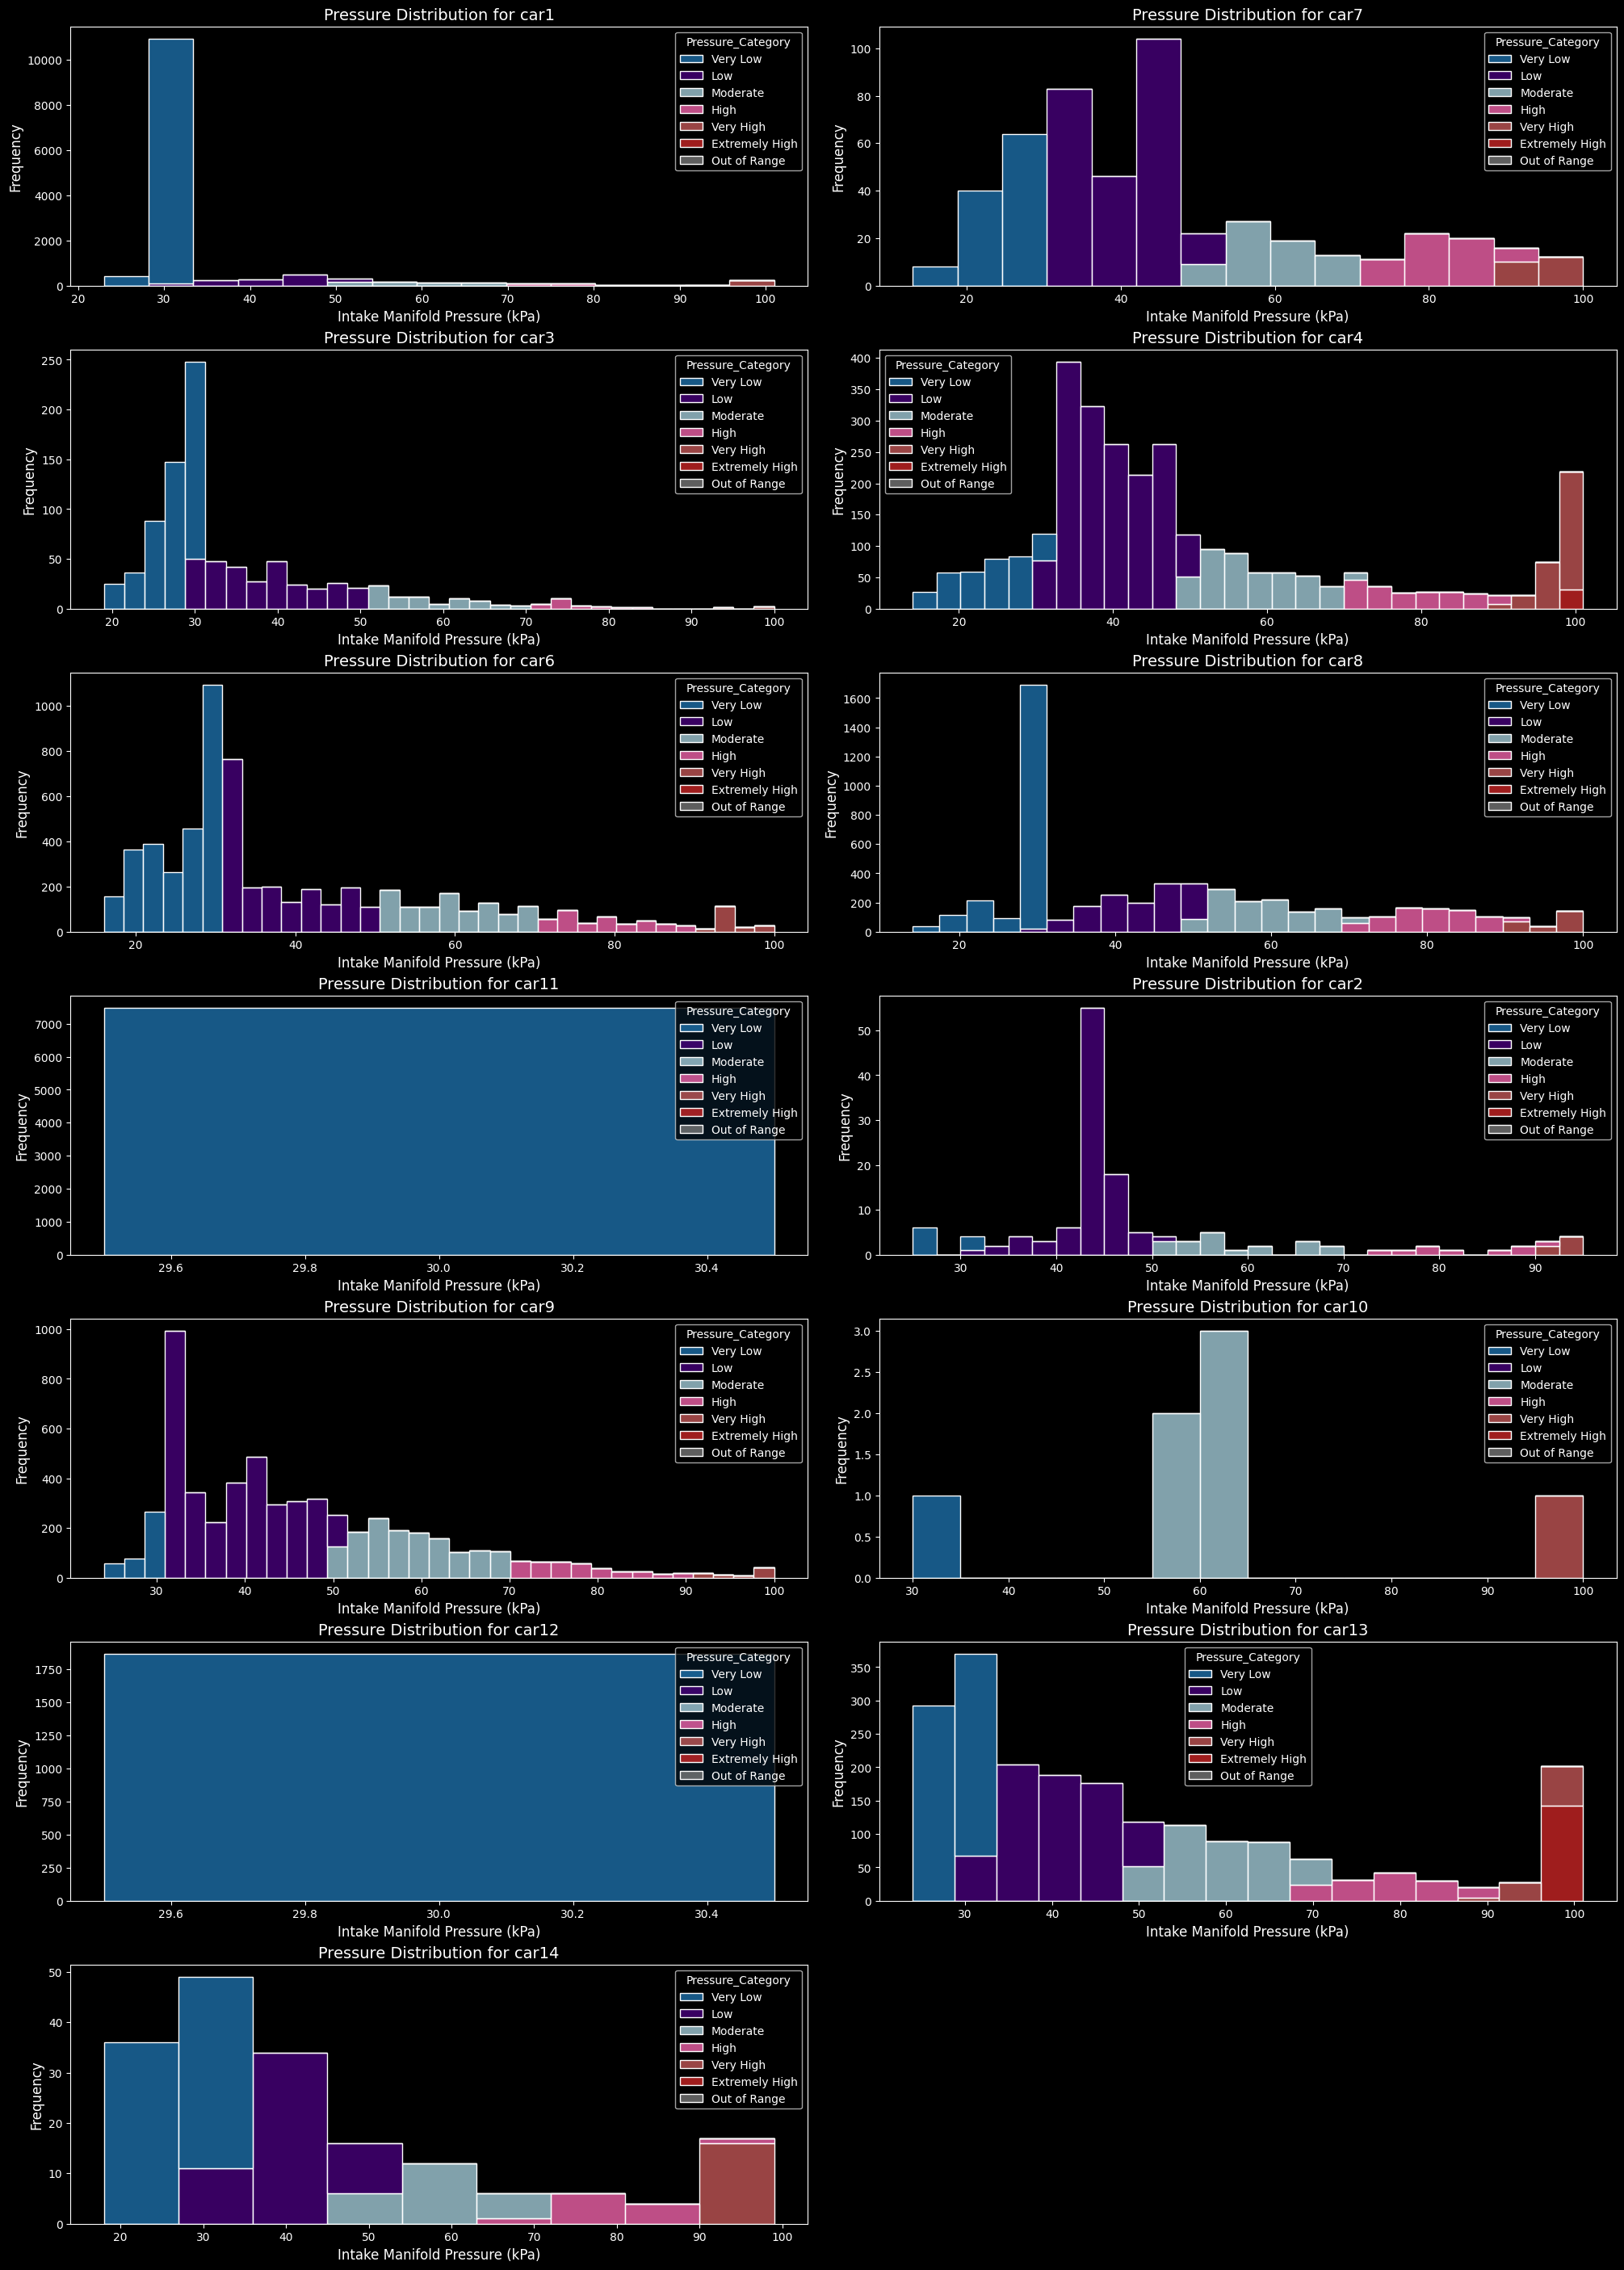

Counts for each vehicle and pressure category:

car1:
  Very Low: 11224
  Low: 1276
  Moderate: 622
  High: 237
  Very High: 250
  Extremely High: 7
  Out of Range: 0

car7:
  Very Low: 112
  Low: 246
  Moderate: 68
  High: 59
  Very High: 22
  Extremely High: 0
  Out of Range: 0

car3:
  Very Low: 494
  Low: 306
  Moderate: 77
  High: 22
  Very High: 3
  Extremely High: 0
  Out of Range: 0

car4:
  Very Low: 349
  Low: 1600
  Moderate: 449
  High: 200
  Very High: 291
  Extremely High: 31
  Out of Range: 0

car6:
  Very Low: 2720
  Low: 1901
  Moderate: 986
  High: 400
  Very High: 176
  Extremely High: 0
  Out of Range: 0

car8:
  Very Low: 2125
  Low: 1296
  Moderate: 1144
  High: 757
  Very High: 251
  Extremely High: 0
  Out of Range: 0

car11:
  Very Low: 7482
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extremely High: 0
  Out of Range: 0

car2:
  Very Low: 9
  Low: 95
  Moderate: 19
  High: 9
  Very High: 6
  Extremely High: 0
  Out of Range: 0

car9:
  Very Low: 398
  Low

In [44]:
pressure_ranges = {
    'Very Low': (0, 30),
    'Low': (31, 50),
    'Moderate': (51, 70),
    'High': (71, 90),
    'Very High': (91, 100),
    'Extremely High': (101, 105)
}

range_colors = {
    'Very Low': '#1f77b4',       # Blue
    'Low': '#4b0082',            # Indigo
    'Moderate': '#add8e6',       # Light Blue
    'High': '#ff69b4',           # Pink
    'Very High': '#cd5c5c',      # Red
    'Extremely High': '#d62728', # Dark Red
    'Out of Range': '#7f7f7f'    # Gray for out of range
}


# Convert INTAKE_MANIFOLD_PRESSURE to numeric, handling any potential non-numeric values
df_EDA2['INTAKE_MANIFOLD_PRESSURE'] = pd.to_numeric(df_EDA2['INTAKE_MANIFOLD_PRESSURE'], errors='coerce')

# Extract unique vehicle IDs
unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]

    # Categorize INTAKE_MANIFOLD_PRESSURE
    vehicle_data['Pressure_Category'] = pd.cut(
        vehicle_data['INTAKE_MANIFOLD_PRESSURE'],
        bins=[-np.inf] + [v[1] for v in pressure_ranges.values()] + [np.inf],
        labels=list(pressure_ranges.keys()) + ['Out of Range']
    )

    # Count occurrences in each category
    counts = vehicle_data['Pressure_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    # Plot the data
    sns.histplot(
        data=vehicle_data, x='INTAKE_MANIFOLD_PRESSURE', hue='Pressure_Category', palette=range_colors,
        ax=ax, multiple='stack'
    )

    ax.set_title(f'Pressure Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Intake Manifold Pressure (kPa)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print counts for each vehicle and pressure category
print("Counts for each vehicle and pressure category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


**_SPEEED Eda_**

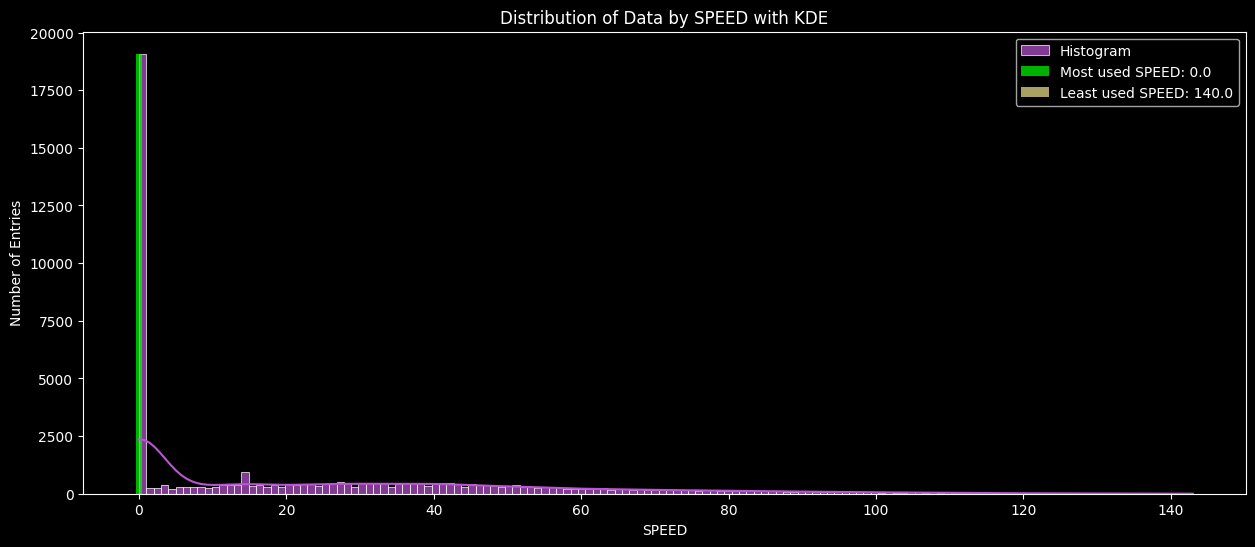

Counts for each SPEED:
0.0: 19082
1.0: 253
2.0: 267
3.0: 365
4.0: 208
5.0: 305
6.0: 309
7.0: 305
8.0: 312
9.0: 235
10.0: 303
11.0: 377
12.0: 366
13.0: 357
14.0: 961
15.0: 346
16.0: 371
17.0: 289
18.0: 383
19.0: 310
20.0: 416
21.0: 379
22.0: 403
23.0: 407
24.0: 317
25.0: 443
26.0: 471
27.0: 497
28.0: 475
29.0: 310
30.0: 477
31.0: 452
32.0: 451
33.0: 484
34.0: 306
35.0: 433
36.0: 464
37.0: 474
38.0: 482
39.0: 336
40.0: 451
41.0: 482
42.0: 453
43.0: 434
44.0: 299
45.0: 400
46.0: 372
47.0: 368
48.0: 323
49.0: 276
50.0: 329
51.0: 371
52.0: 312
53.0: 284
54.0: 236
55.0: 283
56.0: 279
57.0: 245
58.0: 203
59.0: 202
60.0: 224
61.0: 221
62.0: 198
63.0: 227
64.0: 167
65.0: 210
66.0: 204
67.0: 163
68.0: 194
69.0: 142
70.0: 157
71.0: 168
72.0: 174
73.0: 168
74.0: 148
75.0: 150
76.0: 126
77.0: 145
78.0: 151
79.0: 124
80.0: 105
81.0: 116
82.0: 124
83.0: 108
84.0: 118
85.0: 108
86.0: 99
87.0: 97
88.0: 77
89.0: 82
90.0: 101
91.0: 102
92.0: 85
93.0: 96
94.0: 76
95.0: 83
96.0: 89
97.0: 66
98.0: 56
99.0: 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for SPEED
SPEED_counts = df_EDA2['SPEED'].value_counts().sort_index()

# Find max and min speed values and their counts
max_SPEED = SPEED_counts.idxmax()
max_count = SPEED_counts.max()
min_SPEED = SPEED_counts.idxmin()
min_count = SPEED_counts.min()

# Set up the plot
plt.figure(figsize=(15, 6))

# Plot histogram with KDE
sns.histplot(df_EDA2['SPEED'], bins=len(SPEED_counts), kde=True, color='#ba55d3', alpha=0.7, linewidth=0.5, label='Histogram')

# Overlay bar plots for max and min SPEED
plt.bar(max_SPEED, max_count, color='#00ff00', label=f'Most used SPEED: {max_SPEED}', alpha=0.7)
plt.bar(min_SPEED, min_count, color='#f0e68c', label=f'Least used SPEED: {min_SPEED}', alpha=0.7)

# Customize plot
plt.title('Distribution of Data by SPEED with KDE')
plt.xlabel('SPEED')
plt.ylabel('Number of Entries')
plt.legend()
plt.show()

# Print counts for each SPEED
print("Counts for each SPEED:")
for speed, count in SPEED_counts.items():
    print(f"{speed}: {count}")


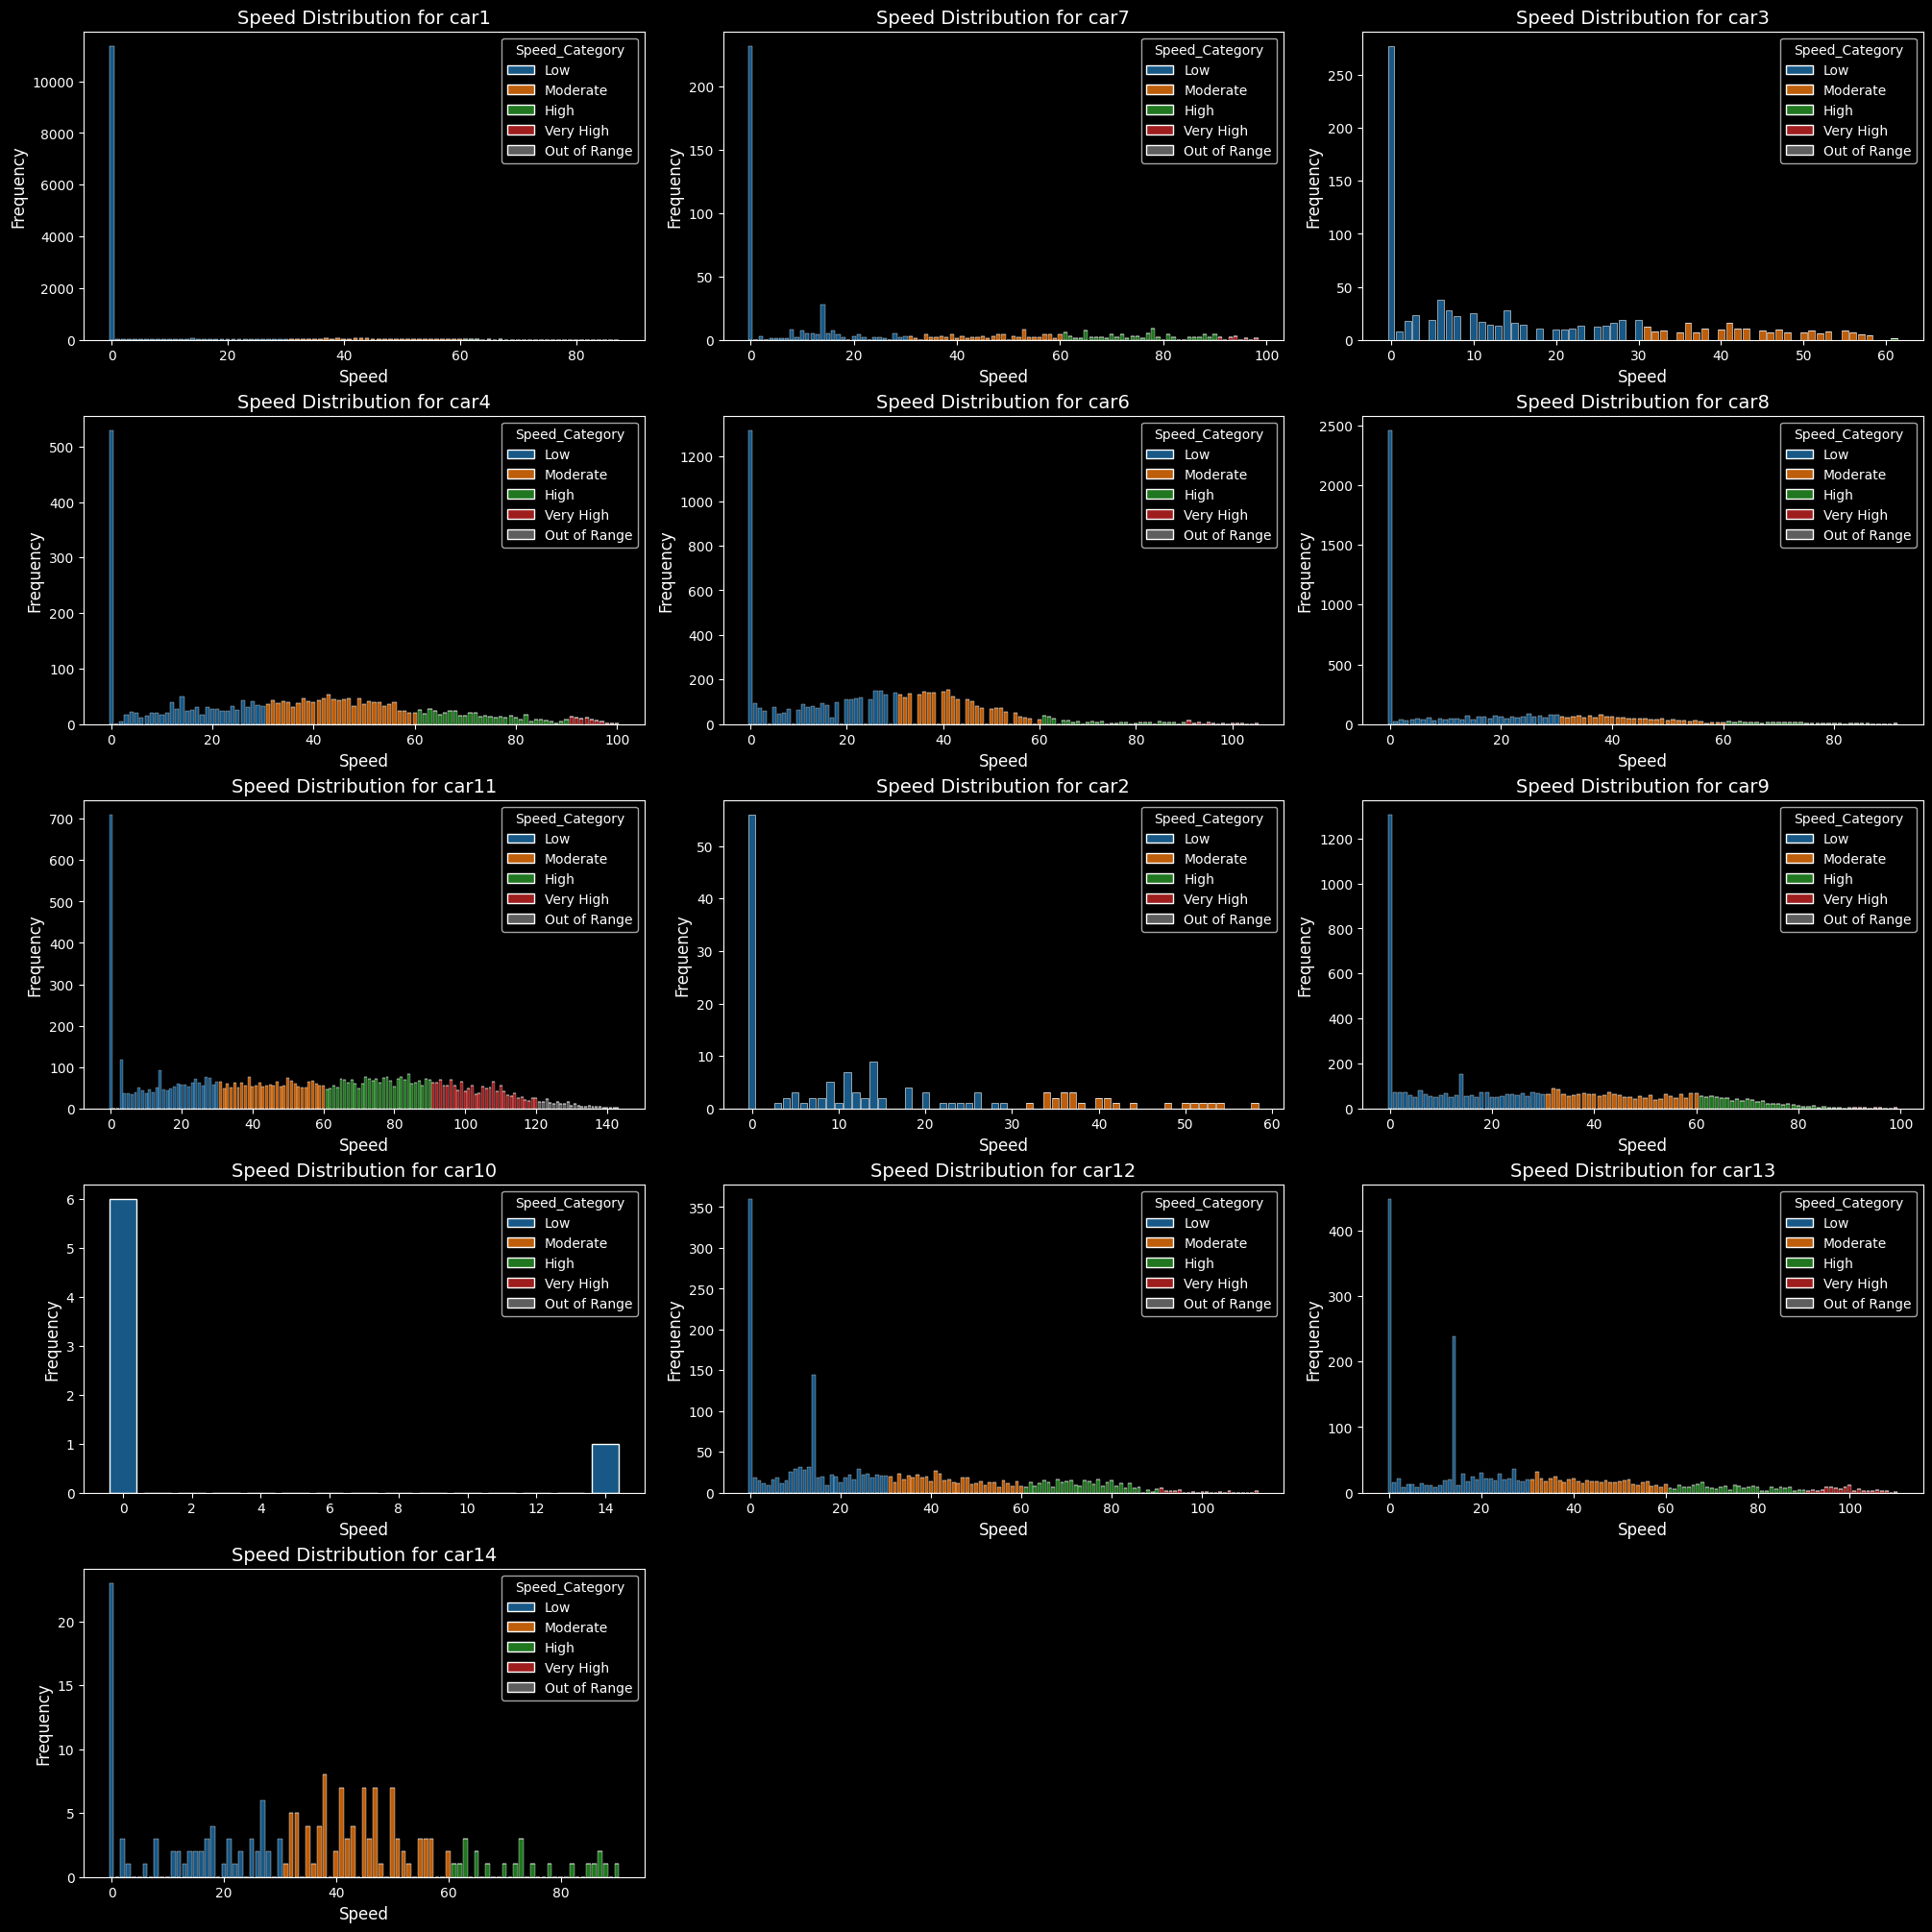

Counts for each vehicle and speed category:

car1:
  Low: 12350
  Moderate: 1131
  High: 135
  Very High: 0
  Out of Range: 0

car7:
  Low: 340
  Moderate: 77
  High: 81
  Very High: 9
  Out of Range: 0

car3:
  Low: 694
  Moderate: 206
  High: 2
  Very High: 0
  Out of Range: 0

car4:
  Low: 1280
  Moderate: 1139
  High: 430
  Very High: 71
  Out of Range: 0

car6:
  Low: 3608
  Moderate: 2264
  High: 269
  Very High: 42
  Out of Range: 0

car8:
  Low: 4031
  Moderate: 1295
  High: 245
  Very High: 2
  Out of Range: 0

car11:
  Low: 2274
  Moderate: 1742
  High: 1931
  Very High: 1343
  Out of Range: 192

car2:
  Low: 112
  Moderate: 26
  High: 0
  Very High: 0
  Out of Range: 0

car9:
  Low: 3233
  Moderate: 1764
  High: 721
  Very High: 10
  Out of Range: 0

car10:
  Low: 7
  Moderate: 0
  High: 0
  Very High: 0
  Out of Range: 0

car12:
  Low: 1081
  Moderate: 464
  High: 299
  Very High: 22
  Out of Range: 0

car13:
  Low: 1217
  Moderate: 514
  High: 237
  Very High: 87
  Out of 

In [46]:
speed_ranges = {
    'Low': (0, 30),
    'Moderate': (31, 60),
    'High': (61, 90),
    'Very High': (91, 120)
}

range_colors = {
    'Low': '#1f77b4',       # Blue
    'Moderate': '#ff7f0e',  # Orange
    'High': '#2ca02c',      # Green
    'Very High': '#d62728', # Red
    'Out of Range': '#7f7f7f' # Gray for out of range
}



unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 3
n_rows = (n_vehicles + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}
for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]


    vehicle_data['Speed_Category'] = pd.cut(
        vehicle_data['SPEED'],
        bins=[-np.inf] + [v[1] for v in speed_ranges.values()] + [np.inf],
        labels=list(speed_ranges.keys()) + ['Out of Range']
    )


    counts = vehicle_data['Speed_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts


    sns.histplot(
        data=vehicle_data, x='SPEED', hue='Speed_Category', palette=range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Speed Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Speed', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)




for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])



plt.show()


print("Counts for each vehicle and speed category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


In [47]:
Cars_speed_Evalution={'car1':'B','car2':'G','car3':'G','car4':'N','car6':'N','car7':'B','car8':'G','car9':'N','car10':'B','car11':'B','car12':'N','car13':'B','car14':'N'}

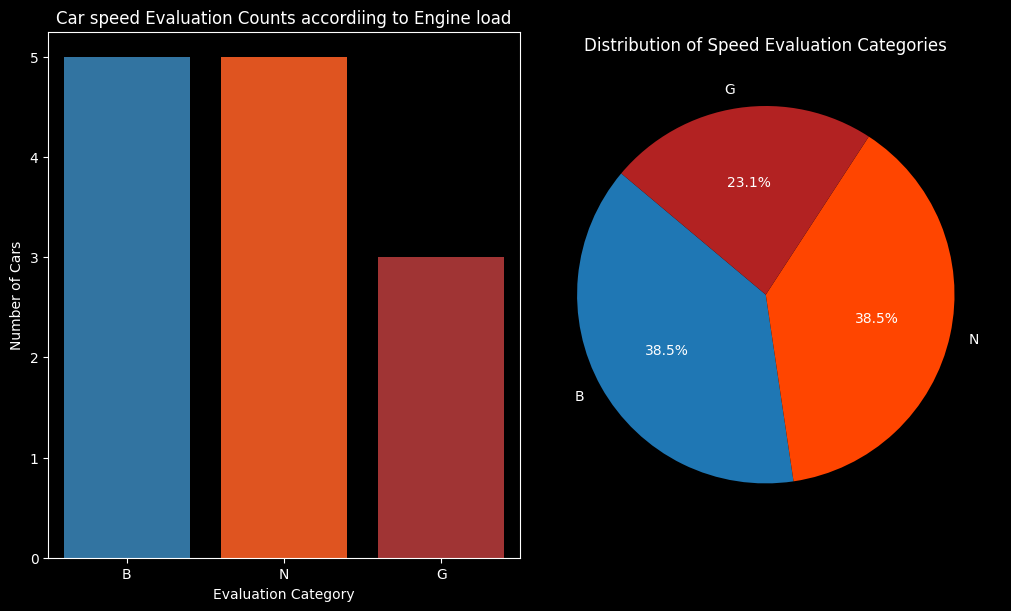

In [48]:

df_eval = pd.DataFrame(list(Cars_speed_Evalution.items()), columns=['Vehicle', 'Evaluation'])


eval_counts = df_eval['Evaluation'].value_counts()


fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#1f77b4', '#ff4500', '#b22222'], ax=ax[0])
ax[0].set_title('Car speed Evaluation Counts accordiing to Engine load')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#1f77b4', '#ff4500', '#b22222'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Speed Evaluation Categories')

# Show plots
plt.show()

**_AIR_INTAKE_TEMP_**

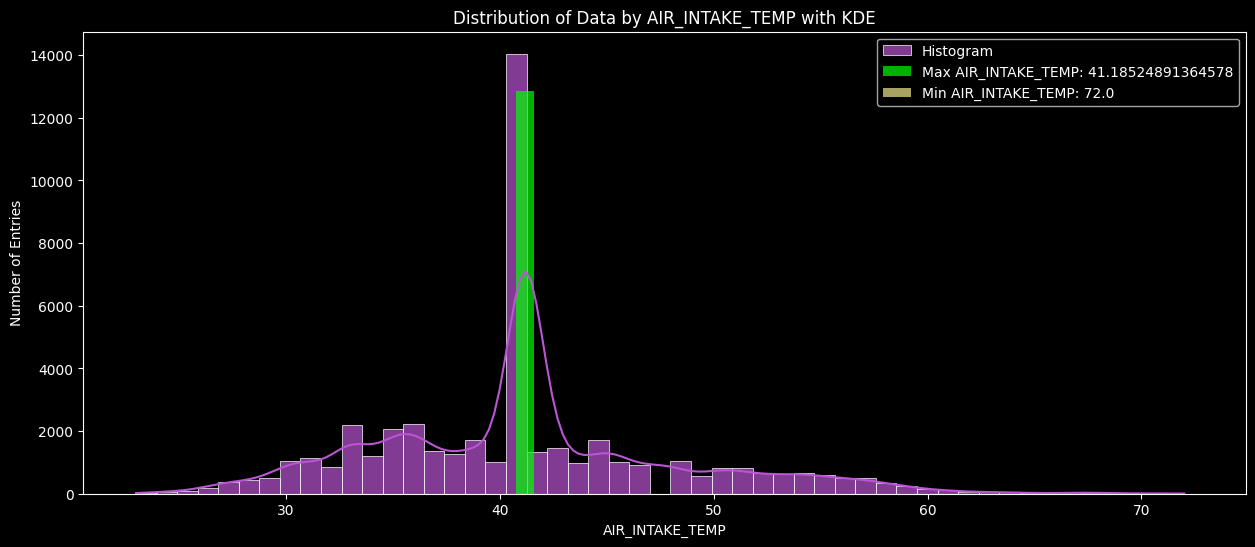

Counts for each AIR_INTAKE_TEMP:
23.0: 12
24.0: 62
25.0: 75
26.0: 173
27.0: 375
28.0: 432
29.0: 511
30.0: 1035
31.0: 1142
32.0: 864
33.0: 2186
34.0: 1203
35.0: 2061
36.0: 2233
37.0: 1369
38.0: 1262
39.0: 1723
40.0: 1022
41.0: 1179
41.18524891364578: 12868
42.0: 1327
43.0: 1471
44.0: 966
45.0: 1700
46.0: 1026
47.0: 915
48.0: 1042
49.0: 570
50.0: 808
51.0: 830
52.0: 648
53.0: 634
54.0: 676
55.0: 599
56.0: 505
57.0: 497
58.0: 343
59.0: 255
60.0: 142
61.0: 112
62.0: 56
63.0: 59
64.0: 42
65.0: 22
66.0: 14
67.0: 40
68.0: 36
69.0: 9
70.0: 11
71.0: 9
72.0: 6


In [49]:

AIR_INTAKE_TEMP_counts = df_EDA2['AIR_INTAKE_TEMP'].value_counts().sort_index()


max_AIR_INTAKE_TEMP = AIR_INTAKE_TEMP_counts.idxmax()
max_count = AIR_INTAKE_TEMP_counts.max()
min_AIR_INTAKE_TEMP = AIR_INTAKE_TEMP_counts.idxmin()
min_count = AIR_INTAKE_TEMP_counts.min()


plt.figure(figsize=(15, 6))


sns.histplot(df_EDA2['AIR_INTAKE_TEMP'], bins=len(AIR_INTAKE_TEMP_counts), kde=True, color='#ba55d3', alpha=0.7, linewidth=0.5, label='Histogram')


plt.bar(max_AIR_INTAKE_TEMP, max_count, color='#00ff00', label=f'Max AIR_INTAKE_TEMP: {max_AIR_INTAKE_TEMP}', alpha=0.7)
plt.bar(min_AIR_INTAKE_TEMP, min_count, color='#f0e68c', label=f'Min AIR_INTAKE_TEMP: {min_AIR_INTAKE_TEMP}', alpha=0.7)


plt.title('Distribution of Data by AIR_INTAKE_TEMP with KDE')
plt.xlabel('AIR_INTAKE_TEMP')
plt.ylabel('Number of Entries')
plt.legend()

plt.show()

# Print counts for each AIR_INTAKE_TEMP
print("Counts for each AIR_INTAKE_TEMP:")
for temp, count in AIR_INTAKE_TEMP_counts.items():
    print(f"{temp}: {count}")


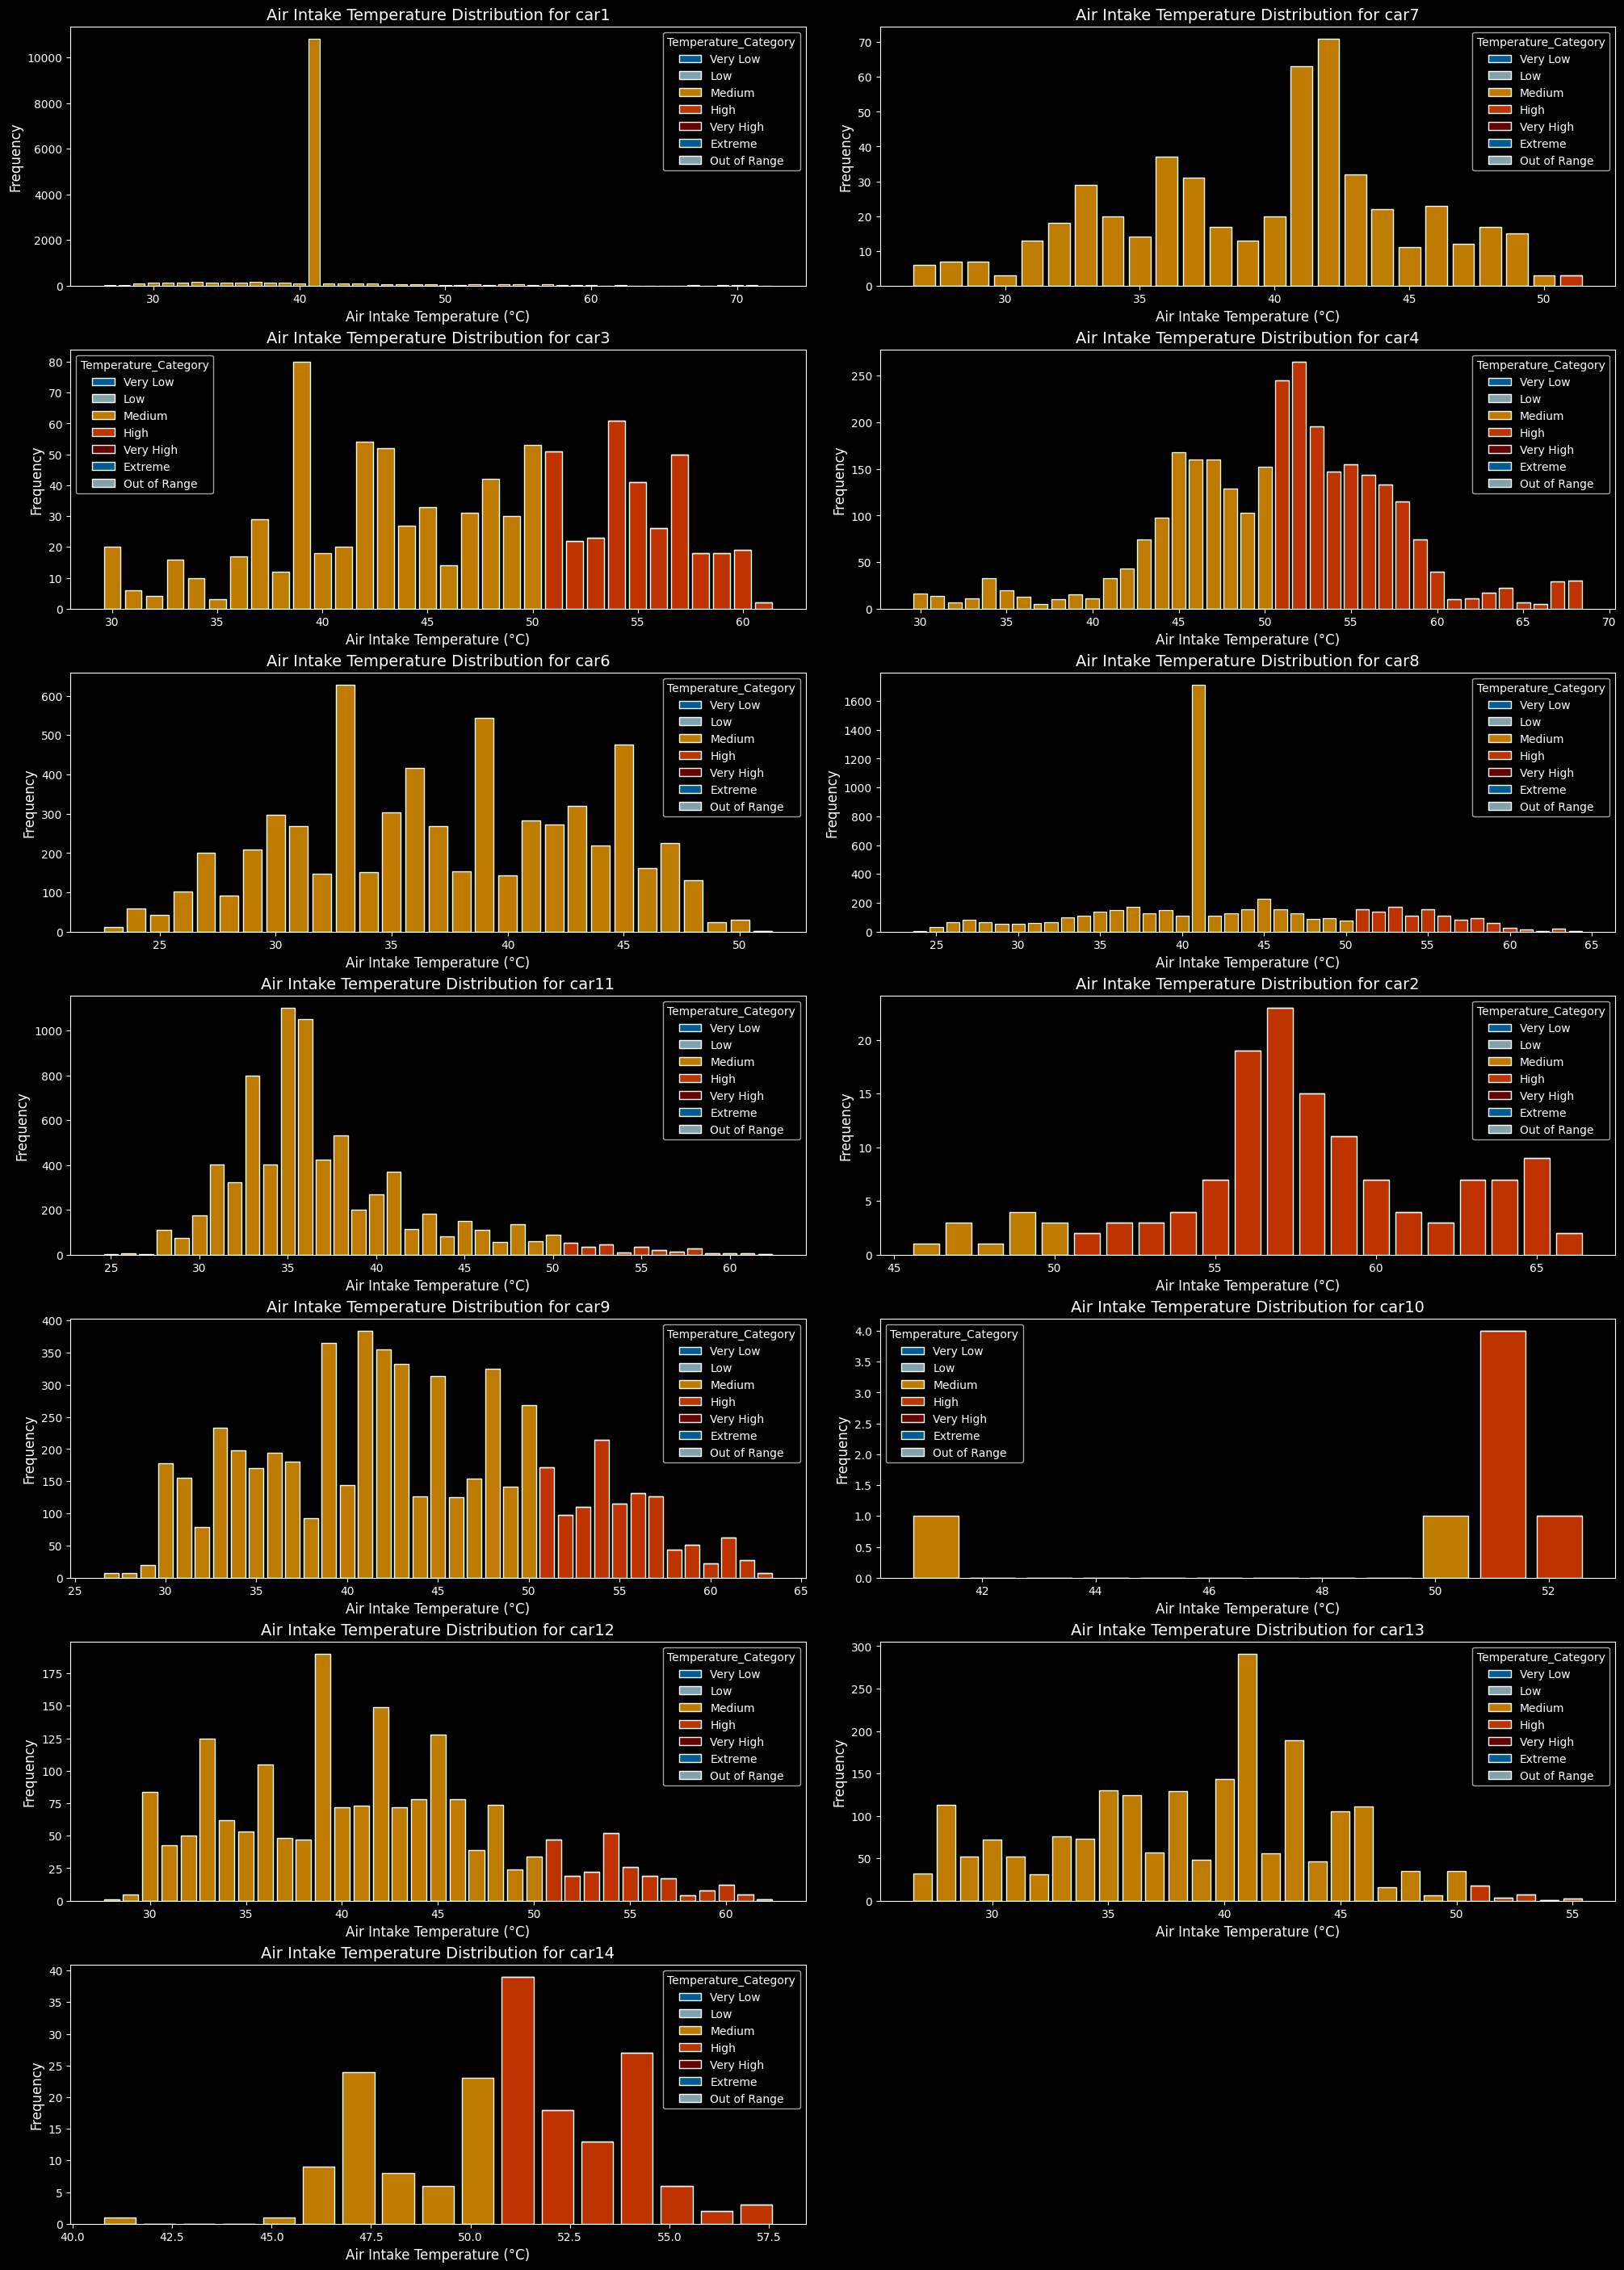

Counts for each vehicle and temperature category:

car1:
  Very Low: 0
  Low: 0
  Medium: 13152
  High: 464
  Very High: 0
  Extreme: 0
  Out of Range: 0

car7:
  Very Low: 0
  Low: 0
  Medium: 504
  High: 3
  Very High: 0
  Extreme: 0
  Out of Range: 0

car3:
  Very Low: 0
  Low: 0
  Medium: 571
  High: 331
  Very High: 0
  Extreme: 0
  Out of Range: 0

car4:
  Very Low: 0
  Low: 0
  Medium: 1275
  High: 1645
  Very High: 0
  Extreme: 0
  Out of Range: 0

car6:
  Very Low: 0
  Low: 0
  Medium: 6182
  High: 1
  Very High: 0
  Extreme: 0
  Out of Range: 0

car8:
  Very Low: 0
  Low: 0
  Medium: 4412
  High: 1161
  Very High: 0
  Extreme: 0
  Out of Range: 0

car11:
  Very Low: 0
  Low: 0
  Medium: 7225
  High: 257
  Very High: 0
  Extreme: 0
  Out of Range: 0

car2:
  Very Low: 0
  Low: 0
  Medium: 12
  High: 126
  Very High: 0
  Extreme: 0
  Out of Range: 0

car9:
  Very Low: 0
  Low: 0
  Medium: 4549
  High: 1179
  Very High: 0
  Extreme: 0
  Out of Range: 0

car10:
  Very Low: 0
  Lo

In [50]:
# Define temperature ranges (example ranges, adjust as needed)
temperature_ranges = {
    'Very Low': -40,
    'Low': 0,
    'Medium': 50,
    'High': 100,
    'Very High': 150,
    'Extreme': 215
}

# Create bins for temperature categories
bins = [-np.inf] + list(temperature_ranges.values()) + [np.inf]
labels = list(temperature_ranges.keys()) + ['Out of Range']

unique_vehicles = df_EDA2['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

range_colors = ['#007acc', '#add8e6', '#ffa500', '#ff4500', '#8b0000']  # Example, adjust as needed

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_EDA2[df_EDA2['VEHICLE_ID'] == vehicle]

    vehicle_data['Temperature_Category'] = pd.cut(
        vehicle_data['AIR_INTAKE_TEMP'],
        bins=bins,
        labels=labels
    )

    counts = vehicle_data['Temperature_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='AIR_INTAKE_TEMP', hue='Temperature_Category', palette=range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Air Intake Temperature Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Air Intake Temperature (°C)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove any empty subplots
for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and temperature category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


In [51]:
Cars_Intake_Temp_Evalution={'car1':'G','car2':'B','car3':'N','car4':'N','car6':'G','car7':'G','car8':'N','car9':'N','car10':'B','car11':'G','car12':'N','car13':'G','car14':'N'}

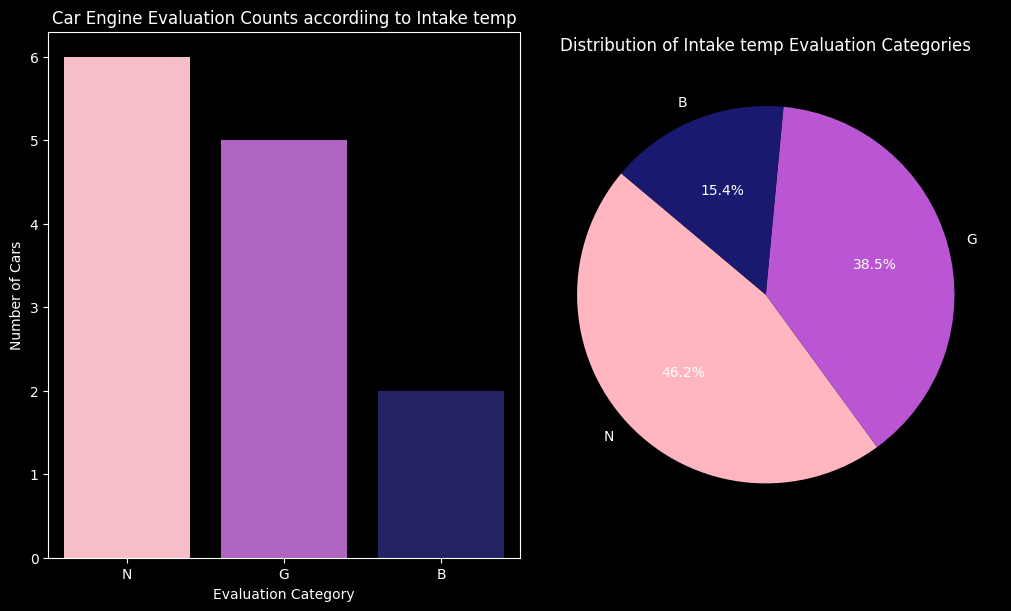

In [52]:
df_eval = pd.DataFrame(list(Cars_Intake_Temp_Evalution.items()), columns=['Vehicle', 'Evaluation'])


eval_counts = df_eval['Evaluation'].value_counts()


fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191970'], ax=ax[0])
ax[0].set_title('Car Engine Evaluation Counts accordiing to Intake temp')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Intake temp Evaluation Categories')

# Show plots
plt.show()

# Average Fuel Mixture

In [53]:
df_cleaned1=pd.read_csv('/content/sample_data/PREPROCCED_DATA.csv')

In [54]:
df_cleaned1['AVG_Short_term_fuel_trim'].min()

-100.0

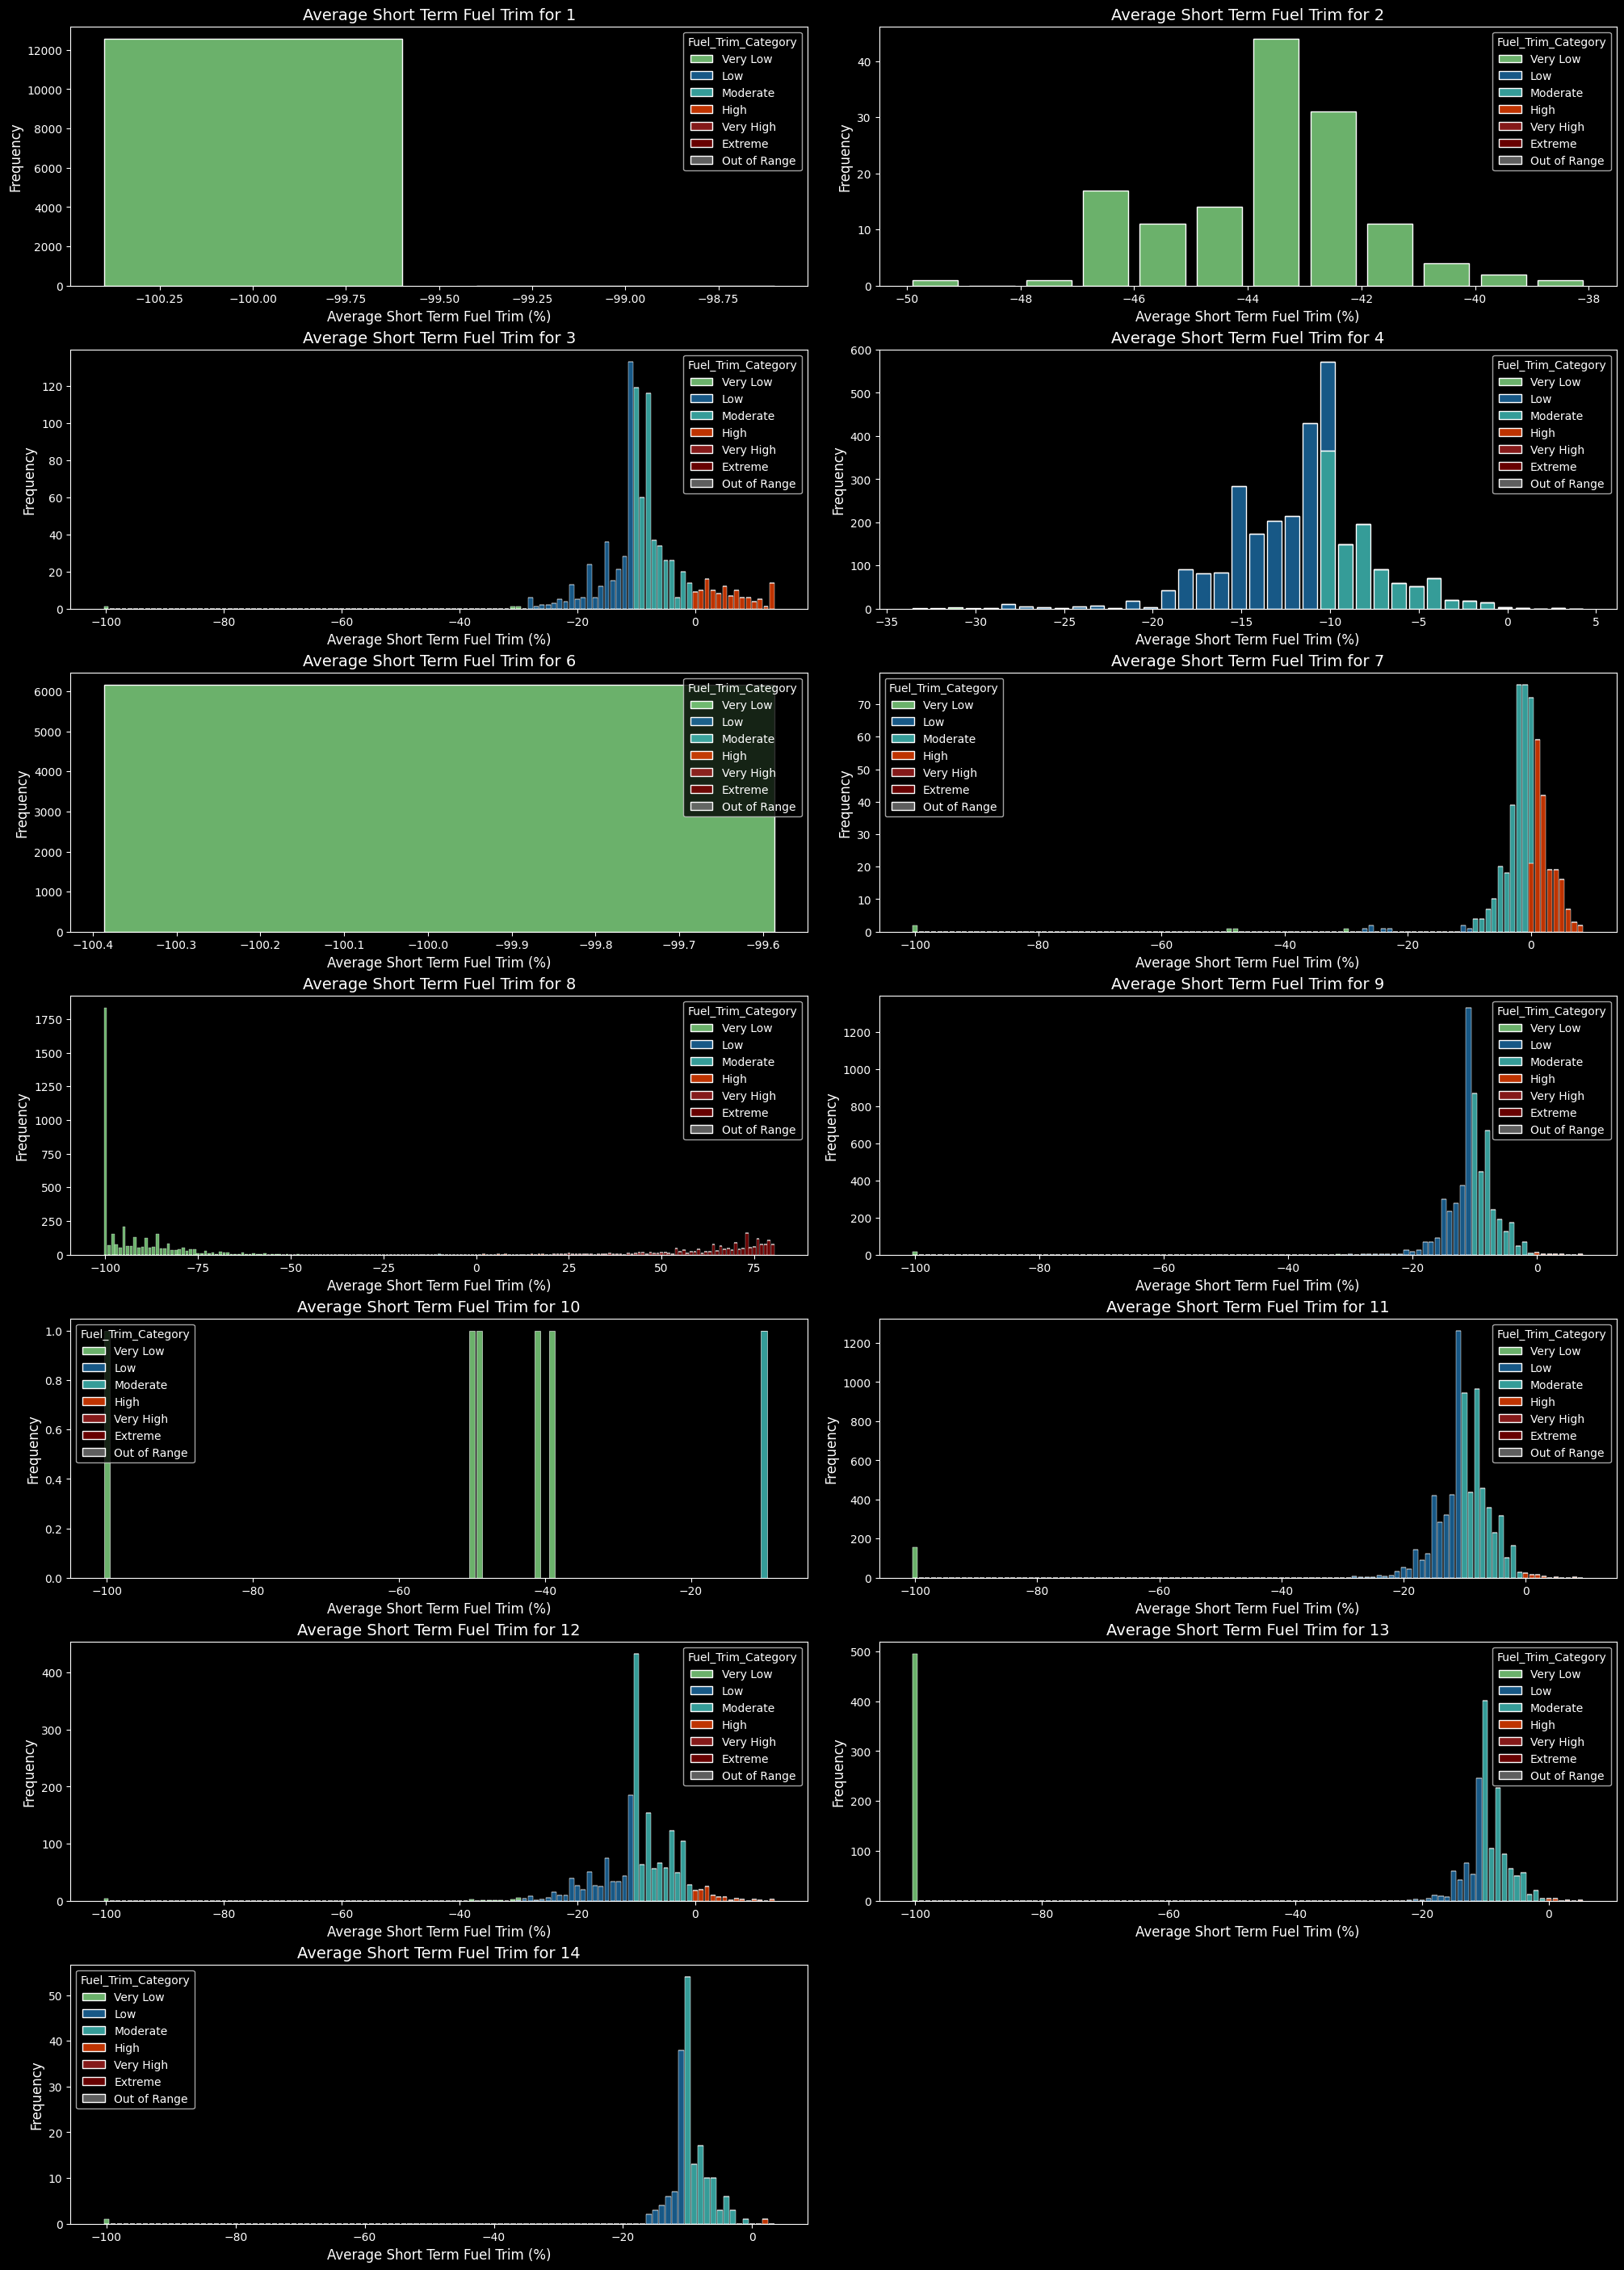

Counts for each vehicle and average short term fuel trim category:

1:
  Very Low: 12569
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0
  Out of Range: 0

2:
  Very Low: 137
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0
  Out of Range: 0

3:
  Very Low: 3
  Low: 322
  Moderate: 458
  High: 118
  Very High: 0
  Extreme: 0
  Out of Range: 0

4:
  Very Low: 7
  Low: 1867
  Moderate: 1040
  High: 4
  Very High: 0
  Extreme: 0
  Out of Range: 0

6:
  Very Low: 6165
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0
  Out of Range: 0

7:
  Very Low: 5
  Low: 8
  Moderate: 305
  High: 188
  Very High: 0
  Extreme: 0
  Out of Range: 0

8:
  Very Low: 3818
  Low: 1
  Moderate: 5
  High: 25
  Very High: 193
  Extreme: 1476
  Out of Range: 0

9:
  Very Low: 16
  Low: 2840
  Moderate: 2835
  High: 23
  Very High: 0
  Extreme: 0
  Out of Range: 0

10:
  Very Low: 5
  Low: 0
  Moderate: 1
  High: 0
  Very High: 0
  Extreme: 0
  Out of Range: 0

11:
  Very Low: 

In [55]:

avg_short_term_fuel_trim_ranges = {
    'Very Low': (-100, -30),
    'Low': (-29, -10),
    'Moderate': (-9, 0),
    'High': (1, 20),
    'Very High': (21, 50),
    'Extreme': (51, 80)
}

avg_fuel_trim_range_colors = {
    'Very Low': '#90ee90',
    'Low': '#1f77b4',
    'Moderate': '#48d1cc',
    'High': '#ff4500',
    'Very High': '#b22222',
    'Extreme': '#8b0000',
    'Out of Range': '#7f7f7f'
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['AVG_Short_term_fuel_trim'])
    vehicle_data['Fuel_Trim_Category'] = pd.cut(
        vehicle_data['AVG_Short_term_fuel_trim'],
        bins=[-np.inf] + [v[1] for v in avg_short_term_fuel_trim_ranges.values()] + [np.inf],
        labels=list(avg_short_term_fuel_trim_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Fuel_Trim_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='AVG_Short_term_fuel_trim', hue='Fuel_Trim_Category', palette=avg_fuel_trim_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Average Short Term Fuel Trim for {vehicle}', fontsize=14)
    ax.set_xlabel('Average Short Term Fuel Trim (%)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and average short term fuel trim category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


In [56]:
Cars_AVG_FUEL_Evalution={'car1':'B','car2':'B','car3':'G','car4':'G','car6':'B','car7':'G','car8':'N','car9':'G','car10':'B','car11':'G','car12':'G','car13':'G','car14':'G'}

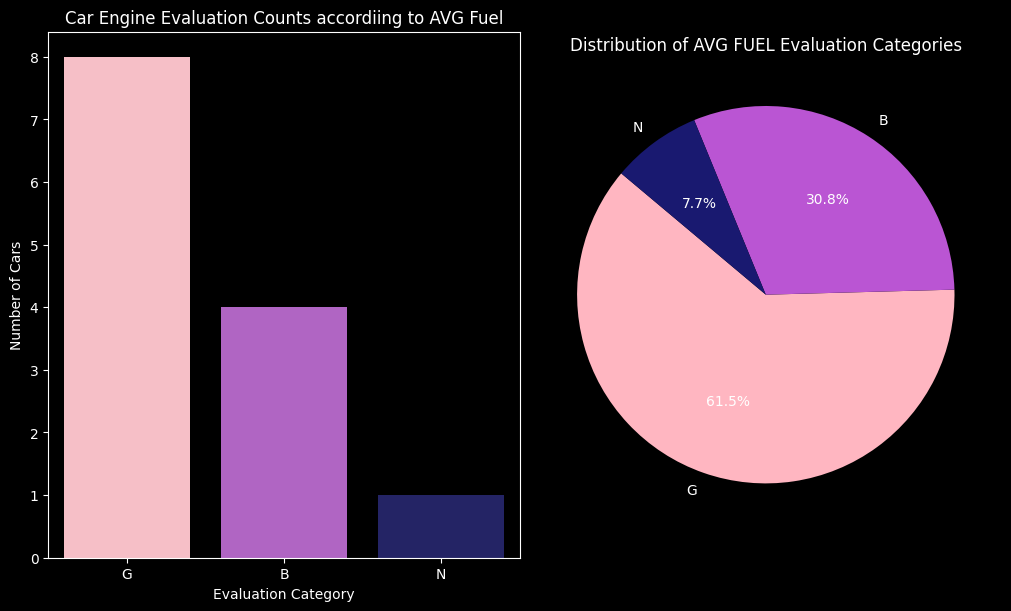

In [57]:

df_eval = pd.DataFrame(list(Cars_AVG_FUEL_Evalution.items()), columns=['Vehicle', 'Evaluation'])


eval_counts = df_eval['Evaluation'].value_counts()


fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191970'], ax=ax[0])
ax[0].set_title('Car Engine Evaluation Counts accordiing to AVG Fuel')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of AVG FUEL Evaluation Categories')

# Show plots
plt.show()

In [58]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45997 entries, 0 to 45996
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIMESTAMP                   45997 non-null  float64
 1   MARK                        45997 non-null  int64  
 2   MODEL                       45997 non-null  int64  
 3   ENGINE_POWER                45997 non-null  float64
 4   AUTOMATIC                   45997 non-null  int64  
 5   VEHICLE_ID                  45997 non-null  int64  
 6   BAROMETRIC_PRESSURE(KPA)    45997 non-null  float64
 7   FUEL_LEVEL                  45997 non-null  float64
 8   ENGINE_LOAD                 45997 non-null  float64
 9   ENGINE_RPM                  45997 non-null  float64
 10  INTAKE_MANIFOLD_PRESSURE    45997 non-null  float64
 11  MAF                         45997 non-null  float64
 12  LONG TERM FUEL TRIM BANK 2  45997 non-null  float64
 13  FUEL_TYPE                   459

In [59]:
df_cleaned1["Braking"].head()

0    0
1    0
2    0
3    0
4    1
Name: Braking, dtype: int64

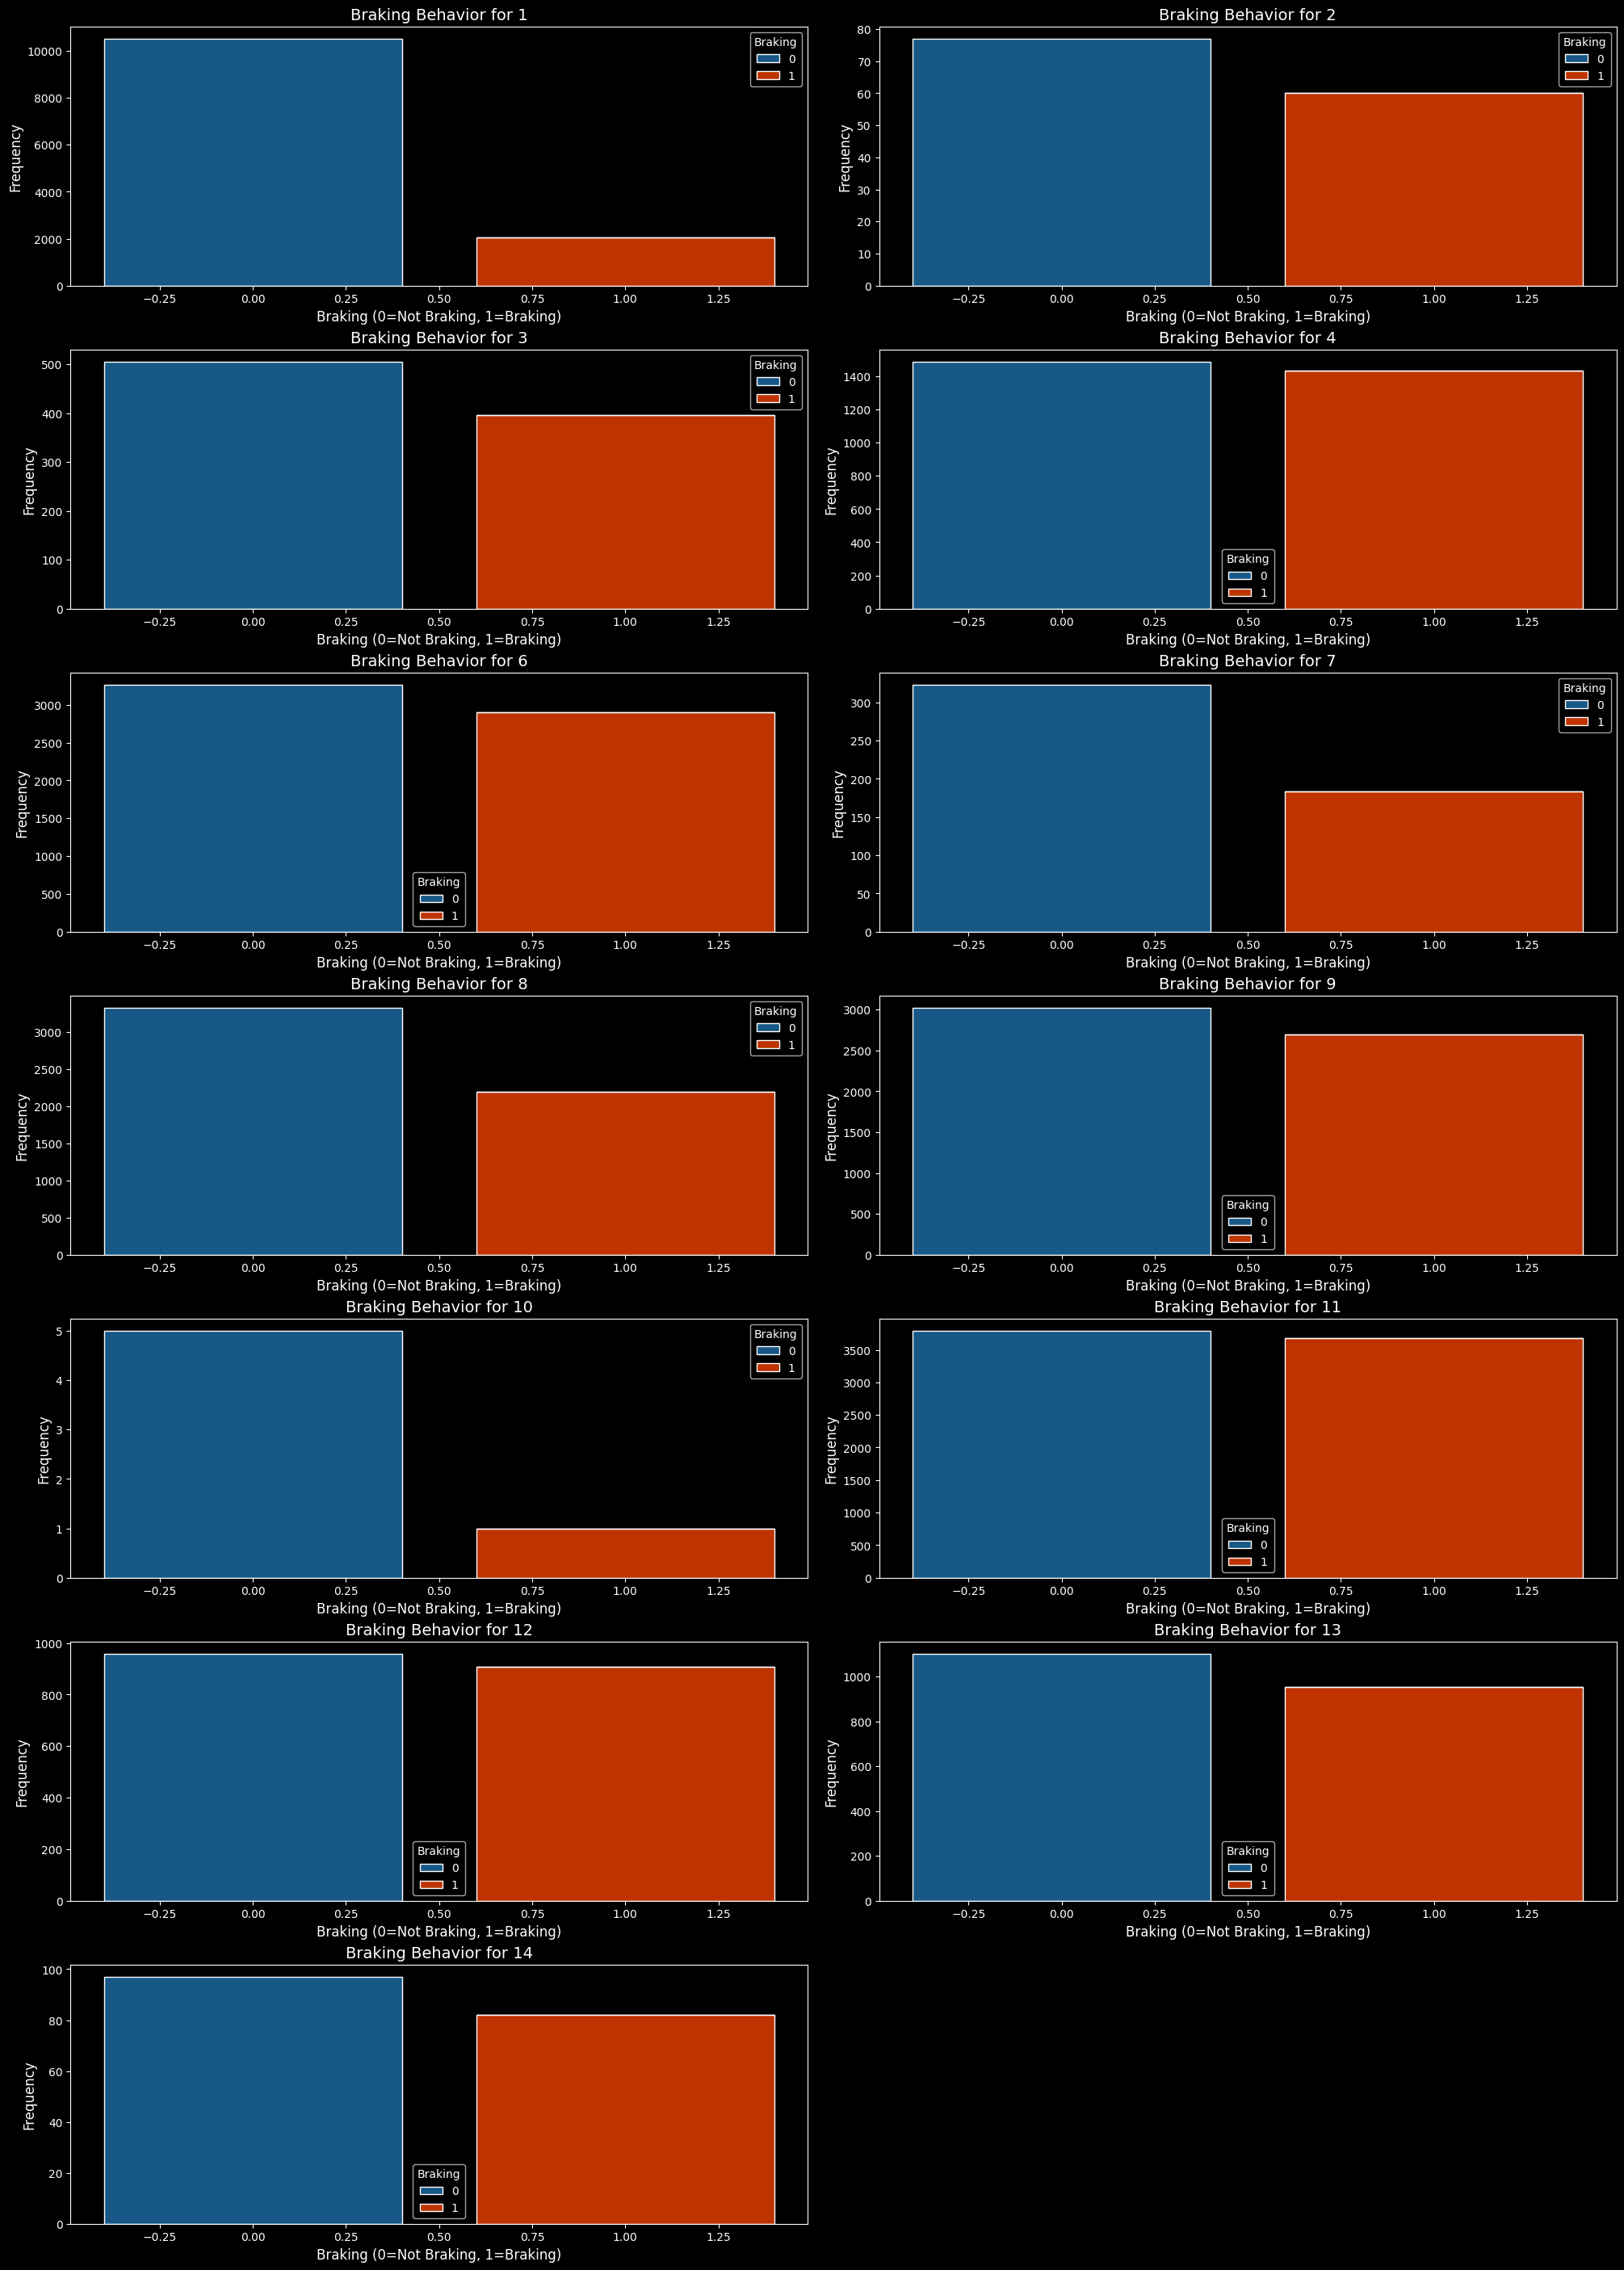

Counts for each vehicle and braking behavior:

1:
  0: 10516
  1: 2053

2:
  0: 77
  1: 60

3:
  0: 505
  1: 396

4:
  0: 1487
  1: 1431

6:
  0: 3266
  1: 2899

7:
  0: 323
  1: 183

8:
  0: 3324
  1: 2194

9:
  0: 3022
  1: 2692

10:
  0: 5
  1: 1

11:
  0: 3792
  1: 3674

12:
  0: 958
  1: 907

13:
  0: 1101
  1: 952

14:
  0: 97
  1: 82


In [60]:
# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['Braking'])

    counts = vehicle_data['Braking'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='Braking', hue='Braking', palette={0: '#1f77b4', 1: '#ff4500'},
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Braking Behavior for {vehicle}', fontsize=14)
    ax.set_xlabel('Braking (0=Not Braking, 1=Braking)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove unused subplots
for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and braking behavior:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


# Engine_Load_Percentage

In [61]:
df_cleaned1["Engine_Load_Percentage"].min()

13.252647503782148

In [62]:
df_cleaned1["Engine_Load_Percentage"].max()

100.0

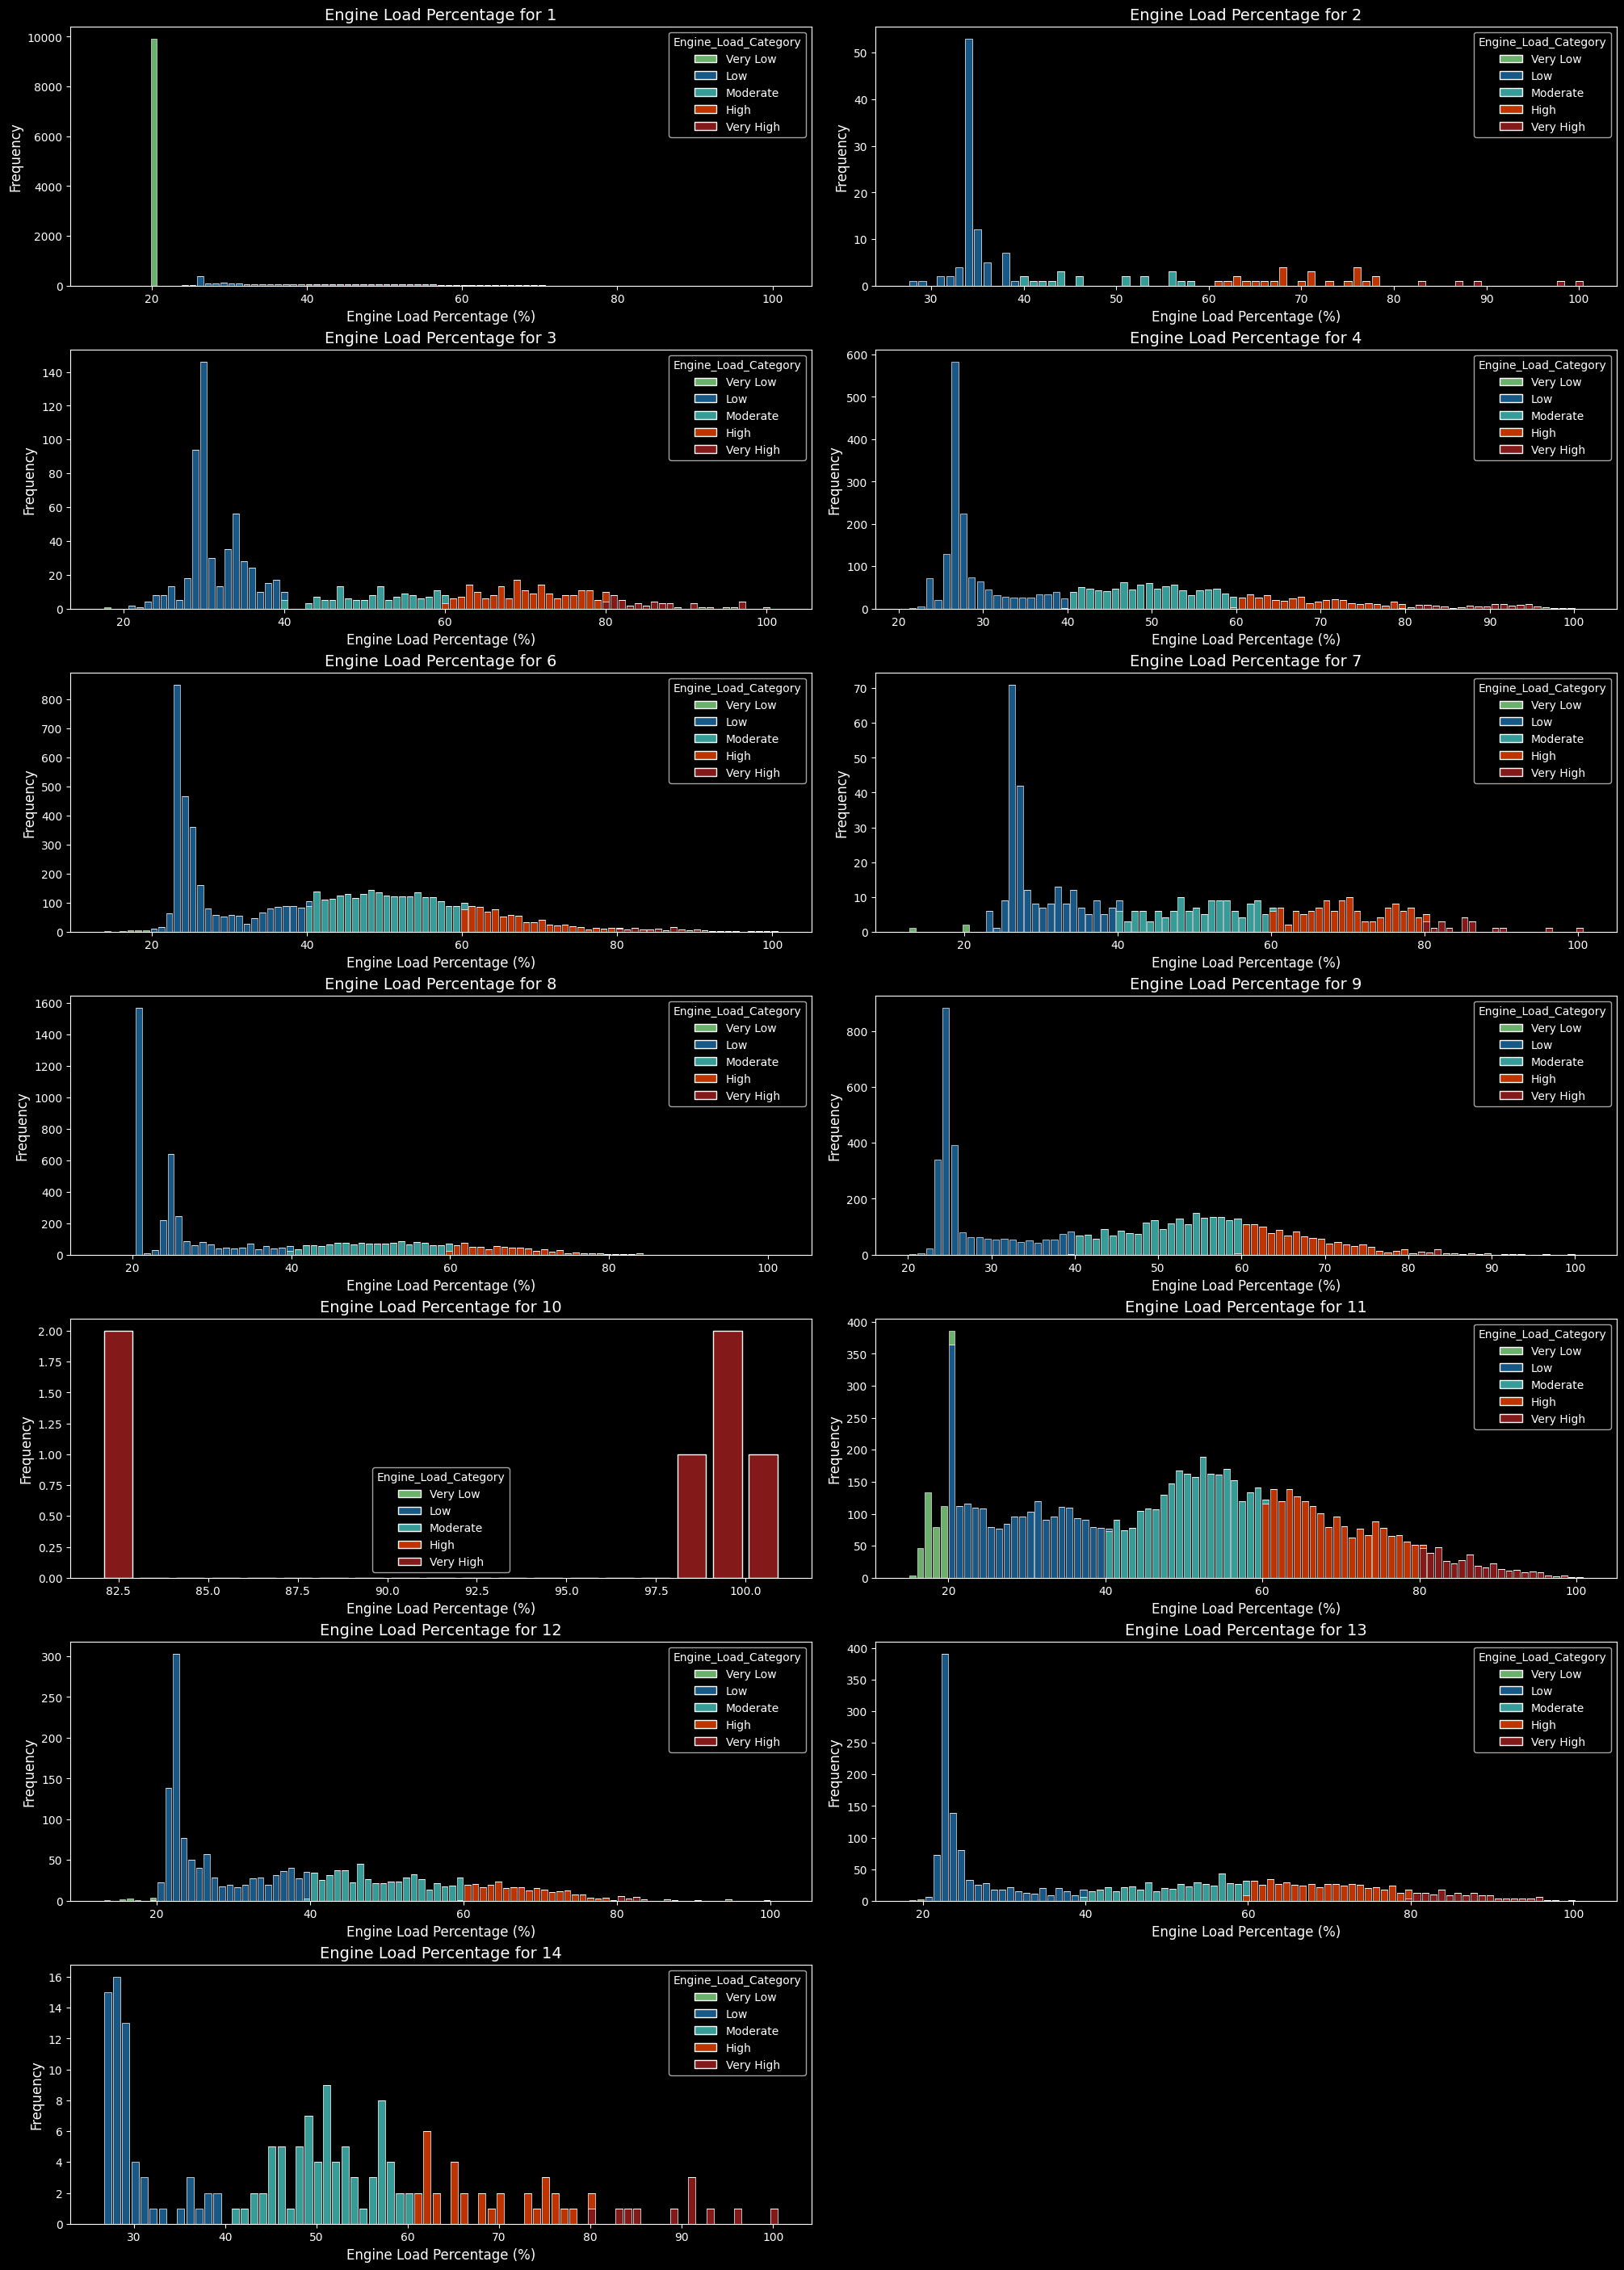

Counts for each vehicle and engine load percentage category:

1:
  Very Low: 9920
  Low: 1379
  Moderate: 1033
  High: 227
  Very High: 10

2:
  Very Low: 0
  Low: 88
  Moderate: 19
  High: 25
  Very High: 5

3:
  Very Low: 1
  Low: 532
  Moderate: 133
  High: 188
  Very High: 47

4:
  Very Low: 0
  Low: 1490
  Moderate: 927
  High: 384
  Very High: 117

6:
  Very Low: 17
  Low: 2812
  Moderate: 2399
  High: 821
  Very High: 116

7:
  Very Low: 3
  Low: 233
  Moderate: 128
  High: 123
  Very High: 19

8:
  Very Low: 2
  Low: 3448
  Moderate: 1359
  High: 681
  Very High: 28

9:
  Very Low: 0
  Low: 2476
  Moderate: 2071
  High: 1093
  Very High: 74

10:
  Very Low: 0
  Low: 0
  Moderate: 0
  High: 0
  Very High: 6

11:
  Very Low: 396
  Low: 2215
  Moderate: 2637
  High: 1843
  Very High: 375

12:
  Very Low: 10
  Low: 1033
  Moderate: 539
  High: 260
  Very High: 23

13:
  Very Low: 3
  Low: 953
  Moderate: 467
  High: 488
  Very High: 142

14:
  Very Low: 0
  Low: 62
  Moderate: 74
 

In [63]:
# Define the ranges for Engine_load_percentage
engine_load_percentage_ranges = {
    'Very Low': (0, 20),
    'Low': (20.1, 40),
    'Moderate': (40.1, 60),
    'High': (60.1, 80),
    'Very High': (80.1, 100),
}

engine_load_range_colors = {
    'Very Low': '#90ee90',
    'Low': '#1f77b4',
    'Moderate': '#48d1cc',
    'High': '#ff4500',
    'Very High': '#b22222',
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['Engine_Load_Percentage'])
    vehicle_data['Engine_Load_Category'] = pd.cut(
        vehicle_data['Engine_Load_Percentage'],
        bins=[0] + [v[1] for v in engine_load_percentage_ranges.values()],
        labels=list(engine_load_percentage_ranges.keys())
    )

    counts = vehicle_data['Engine_Load_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='Engine_Load_Percentage', hue='Engine_Load_Category', palette=engine_load_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Engine Load Percentage for {vehicle}', fontsize=14)
    ax.set_xlabel('Engine Load Percentage (%)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and engine load percentage category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


In [64]:
Cars_Engine_load_Evalution={'car1':'G','car2':'N','car3':'N','car4':'N','car6':'G','car7':'N','car8':'G','car9':'G','car10':'B','car11':'N','car12':'G','car13':'N','car14':'B'}

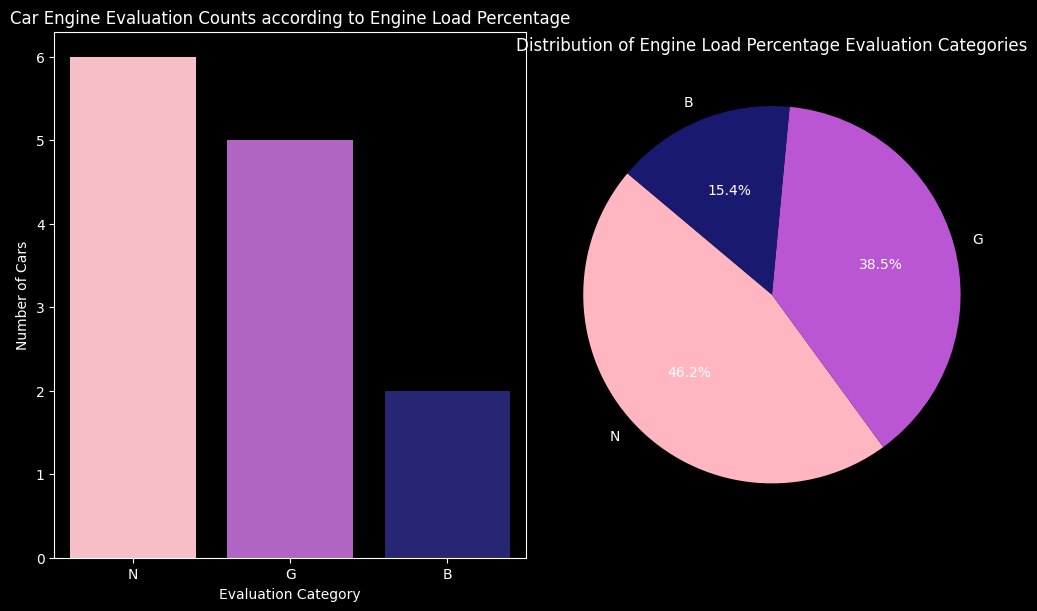

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given dictionary for Engine Load Percentage evaluation
Cars_Engine_load_Evalution = {
    'car1': 'G', 'car2': 'N', 'car3': 'N', 'car4': 'N',
    'car6': 'G', 'car7': 'N', 'car8': 'G', 'car9': 'G',
    'car10': 'B', 'car11': 'N', 'car12': 'G', 'car13': 'N', 'car14': 'B'
}

# Convert the dictionary to a DataFrame
df_eval = pd.DataFrame(list(Cars_Engine_load_Evalution.items()), columns=['Vehicle', 'Evaluation'])

# Count the occurrences of each evaluation category
eval_counts = df_eval['Evaluation'].value_counts()

# Create subplots for the bar chart and pie chart
fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

# Bar plot
sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191980'], ax=ax[0])
ax[0].set_title('Car Engine Evaluation Counts according to Engine Load Percentage')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Engine Load Percentage Evaluation Categories')

# Show plots
plt.show()

#Wheels_Tuning_Index

In [66]:
df_cleaned1["Wheels_Tuning_Index"].min()

5.320599231397917

In [67]:
df_cleaned1["Wheels_Tuning_Index"].max()

40.04022988505747

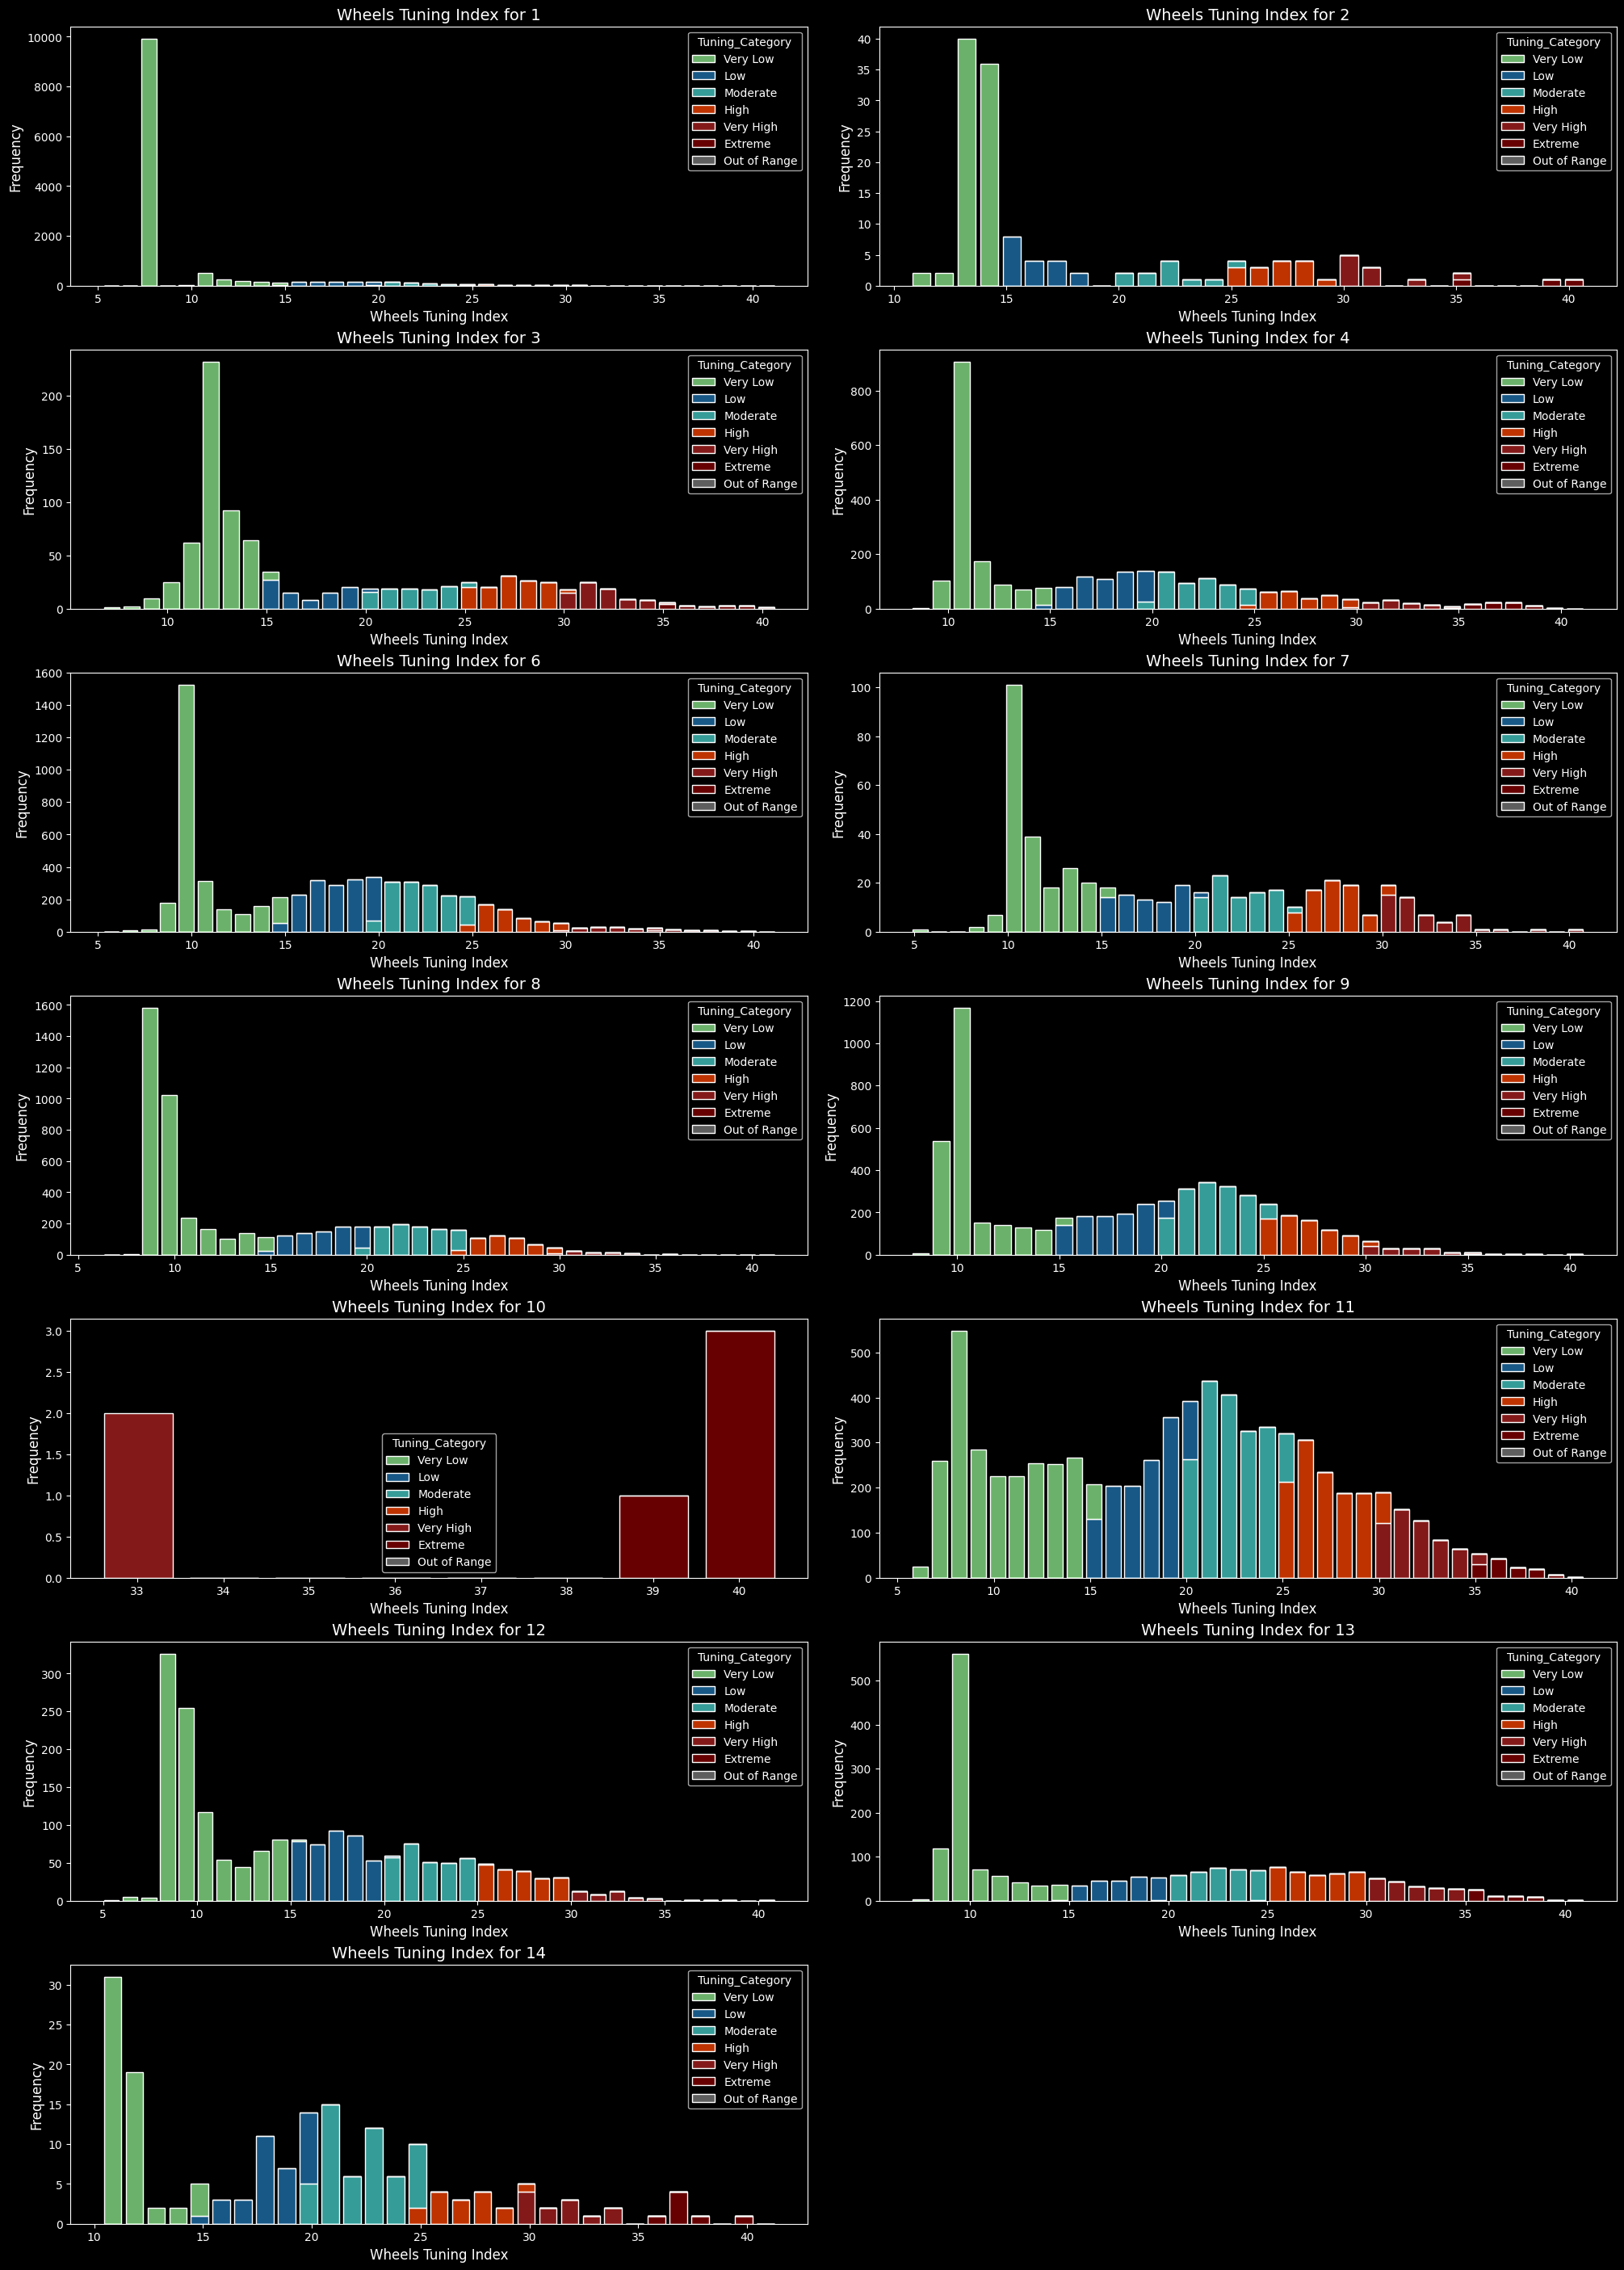

Counts for each vehicle and wheels tuning index category:

1:
  Very Low: 11144
  Low: 737
  Moderate: 520
  High: 144
  Very High: 23
  Extreme: 0
  Out of Range: 1

2:
  Very Low: 80
  Low: 18
  Moderate: 11
  High: 15
  Very High: 10
  Extreme: 3
  Out of Range: 0

3:
  Very Low: 496
  Low: 88
  Moderate: 98
  High: 125
  Very High: 78
  Extreme: 16
  Out of Range: 0

4:
  Very Low: 1407
  Low: 567
  Moderate: 514
  High: 254
  Very High: 101
  Extreme: 75
  Out of Range: 0

6:
  Very Low: 2602
  Low: 1480
  Moderate: 1364
  High: 550
  Very High: 123
  Extreme: 46
  Out of Range: 0

7:
  Very Low: 218
  Low: 75
  Moderate: 86
  High: 76
  Very High: 47
  Extreme: 4
  Out of Range: 0

8:
  Very Low: 3332
  Low: 753
  Moderate: 896
  High: 465
  Very High: 69
  Extreme: 3
  Out of Range: 0

9:
  Very Low: 2282
  Low: 1019
  Moderate: 1506
  High: 747
  Very High: 148
  Extreme: 12
  Out of Range: 0

10:
  Very Low: 0
  Low: 0
  Moderate: 0
  High: 0
  Very High: 2
  Extreme: 4
  Out 

In [68]:
# Define ranges and colors for Wheels_Tuning_Index
wheels_tuning_ranges = {
    'Very Low': (5.32, 15),
    'Low': (15.01, 20),
    'Moderate': (20.01, 25),
    'High': (25.01, 30),
    'Very High': (30.01, 35),
    'Extreme': (35.01, 40.04)
}

wheels_tuning_range_colors = {
    'Very Low': '#90ee90',
    'Low': '#1f77b4',
    'Moderate': '#48d1cc',
    'High': '#ff4500',
    'Very High': '#b22222',
    'Extreme': '#8b0000',
    'Out of Range': '#7f7f7f'
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['Wheels_Tuning_Index'])
    vehicle_data['Tuning_Category'] = pd.cut(
        vehicle_data['Wheels_Tuning_Index'],
        bins=[-np.inf] + [v[1] for v in wheels_tuning_ranges.values()] + [np.inf],
        labels=list(wheels_tuning_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Tuning_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='Wheels_Tuning_Index', hue='Tuning_Category', palette=wheels_tuning_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Wheels Tuning Index for {vehicle}', fontsize=14)
    ax.set_xlabel('Wheels Tuning Index', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and wheels tuning index category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")

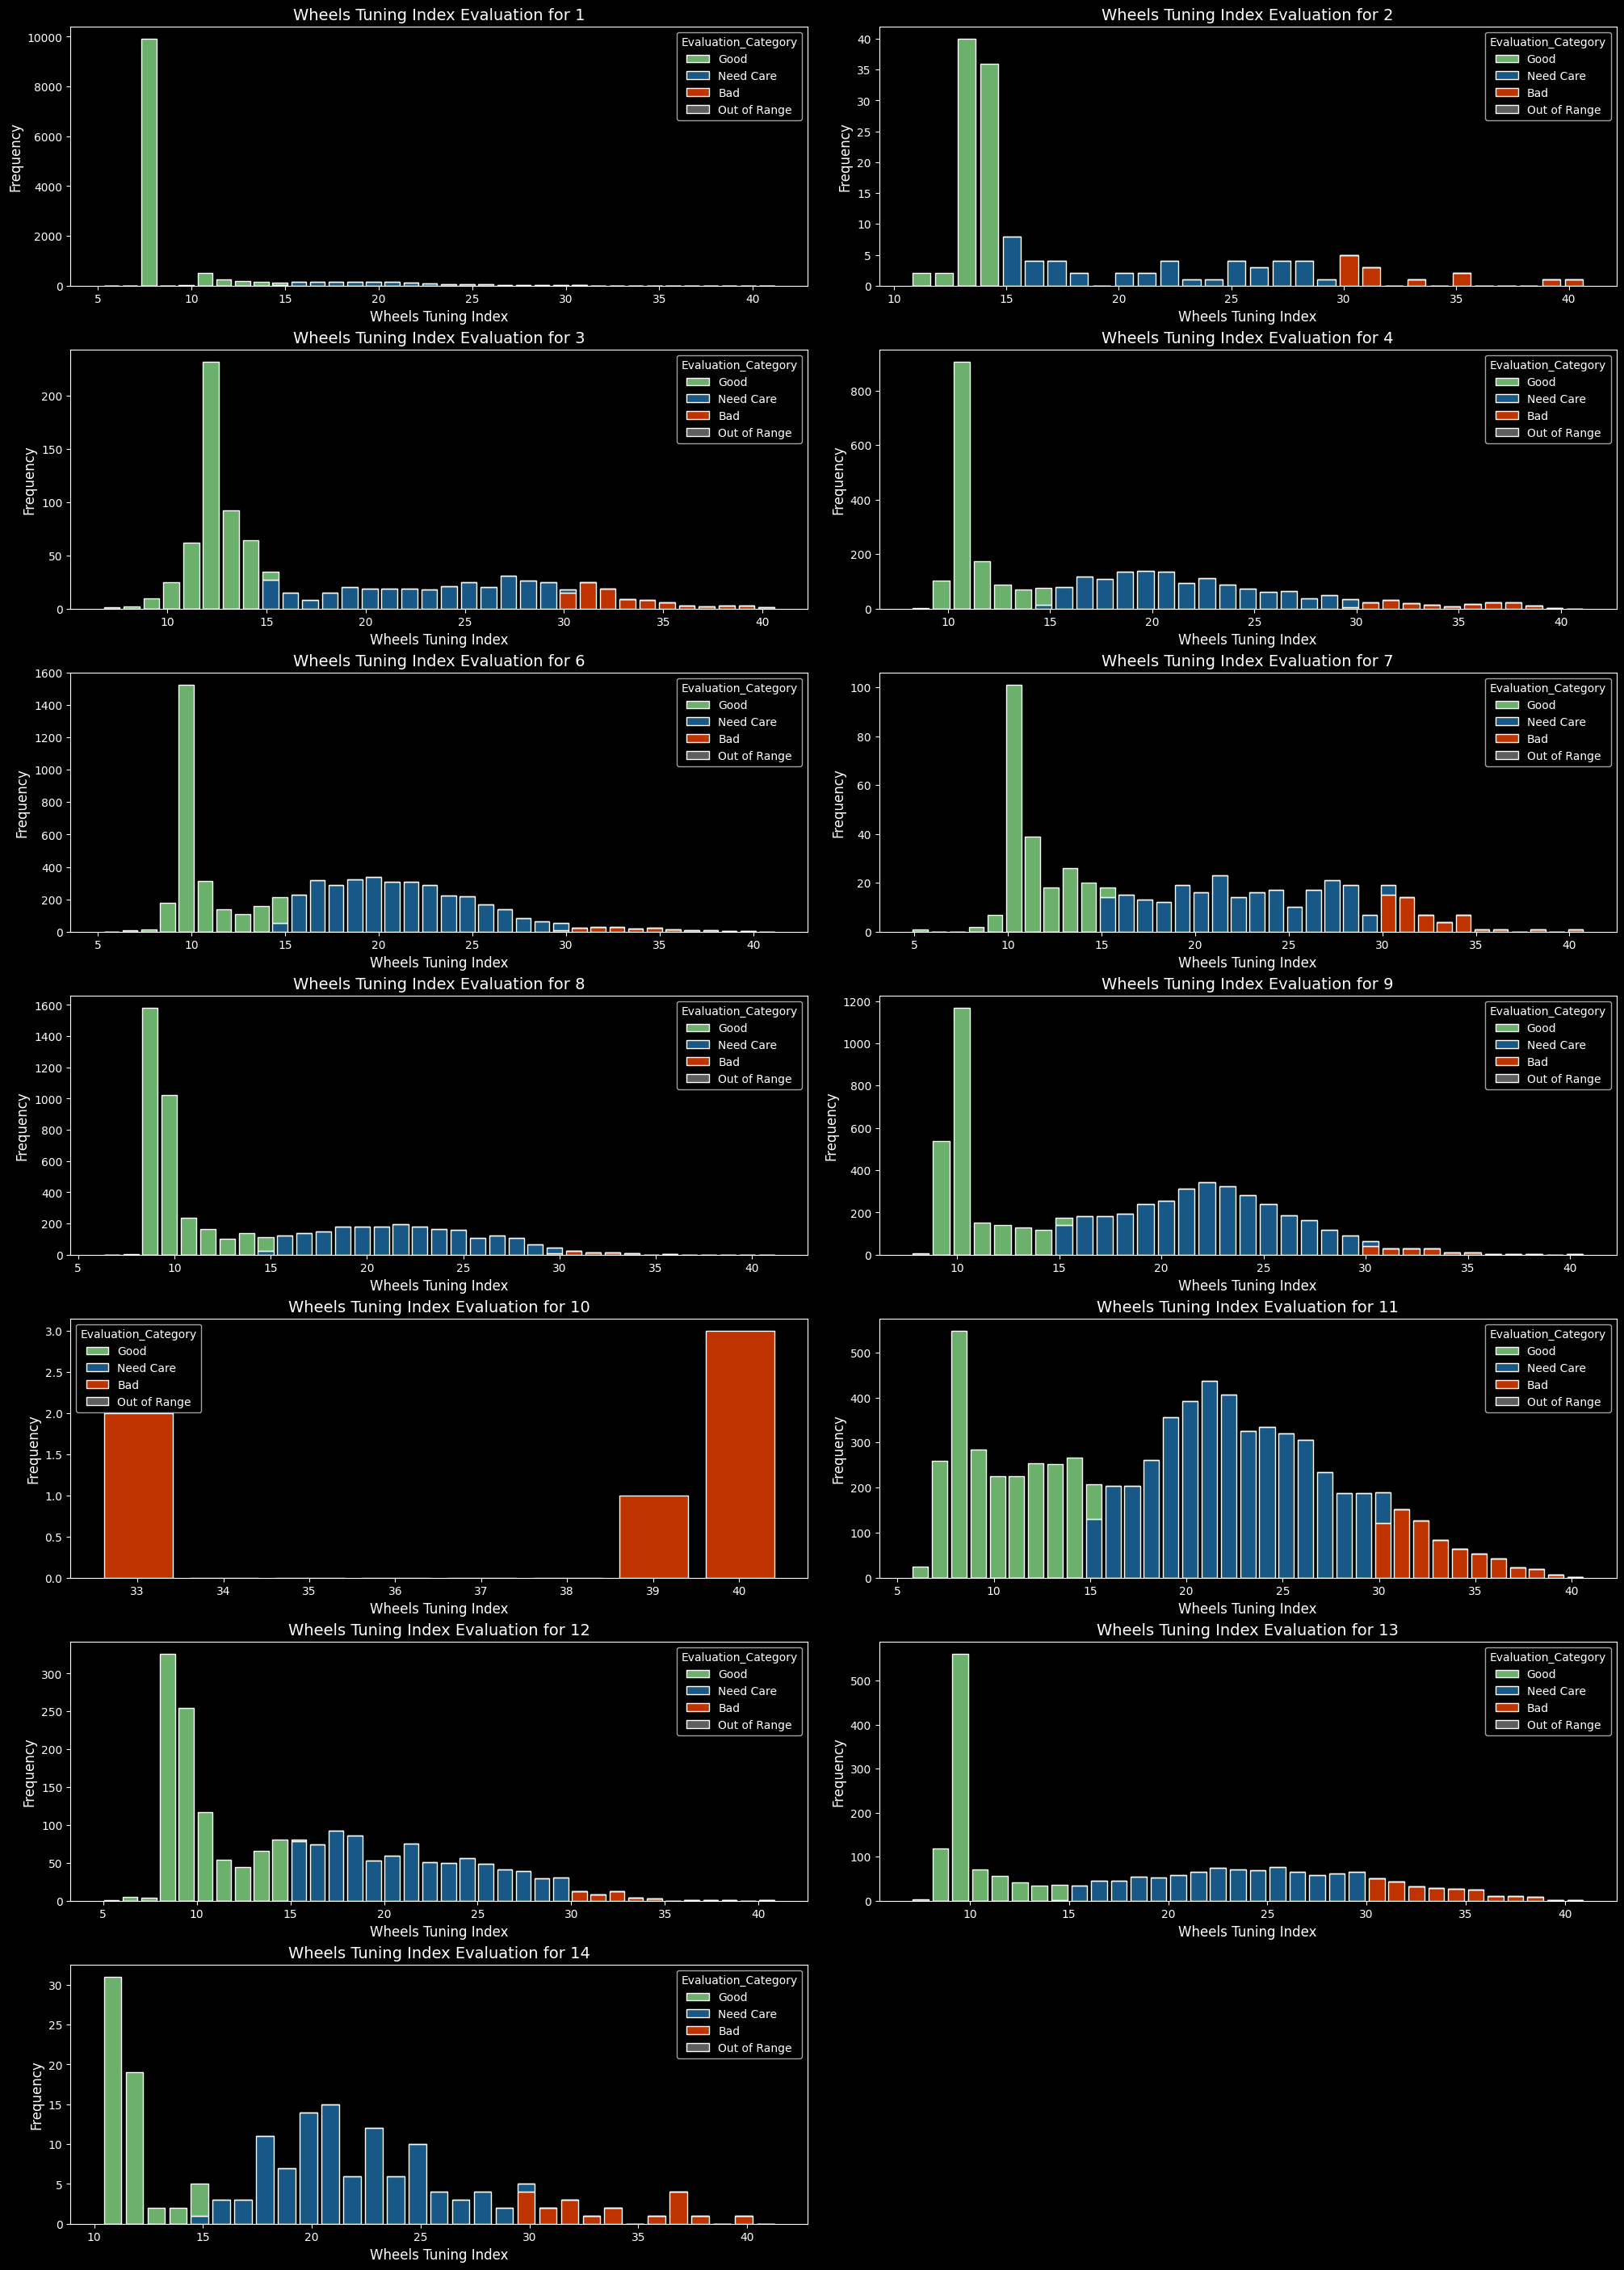

Counts for each vehicle and evaluation category:

1:
  Good: 11144
  Need Care: 1401
  Bad: 23
  Out of Range: 1

2:
  Good: 80
  Need Care: 44
  Bad: 13
  Out of Range: 0

3:
  Good: 496
  Need Care: 311
  Bad: 94
  Out of Range: 0

4:
  Good: 1407
  Need Care: 1335
  Bad: 176
  Out of Range: 0

6:
  Good: 2602
  Need Care: 3394
  Bad: 169
  Out of Range: 0

7:
  Good: 218
  Need Care: 237
  Bad: 51
  Out of Range: 0

8:
  Good: 3332
  Need Care: 2114
  Bad: 72
  Out of Range: 0

9:
  Good: 2282
  Need Care: 3272
  Bad: 160
  Out of Range: 0

10:
  Good: 0
  Need Care: 0
  Bad: 6
  Out of Range: 0

11:
  Good: 2418
  Need Care: 4350
  Bad: 697
  Out of Range: 1

12:
  Good: 956
  Need Care: 865
  Bad: 44
  Out of Range: 0

13:
  Good: 921
  Need Care: 896
  Bad: 236
  Out of Range: 0

14:
  Good: 58
  Need Care: 102
  Bad: 19
  Out of Range: 0


In [71]:
# Define evaluation ranges for Wheels_Tuning_Index
evaluation_ranges = {
    'Good': (5.32, 15),
    'Need Care': (15.01, 30),
    'Bad': (30.01, 40.04)
}

evaluation_range_colors = {
    'Good': '#90ee90',    # Light green for good
    'Need Care': '#1f77b4',  # Blue for normal
    'Bad': '#ff4500',      # Orange for bad
    'Out of Range': '#7f7f7f'  # Add color for 'Out of Range' category
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['Wheels_Tuning_Index'])
    vehicle_data['Evaluation_Category'] = pd.cut(
        vehicle_data['Wheels_Tuning_Index'],
        bins=[-np.inf] + [v[1] for v in evaluation_ranges.values()] + [np.inf],
        labels=list(evaluation_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Evaluation_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='Wheels_Tuning_Index', hue='Evaluation_Category', palette=evaluation_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Wheels Tuning Index Evaluation for {vehicle}', fontsize=14)
    ax.set_xlabel('Wheels Tuning Index', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and evaluation category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


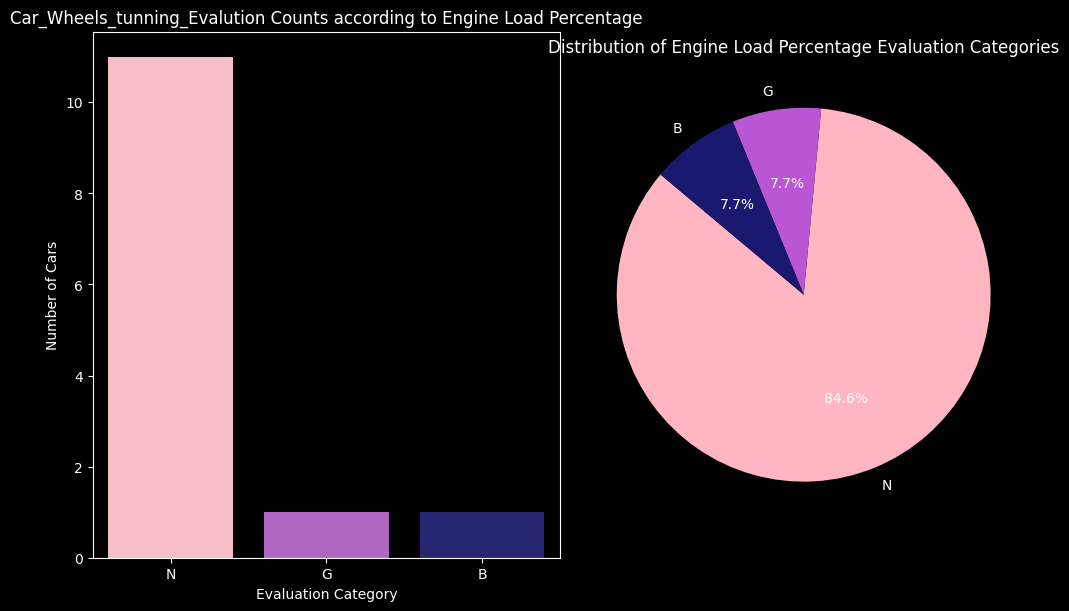

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given dictionary for Engine Load Percentage evaluation
Cars_Wheels_tunning_Evalution = {
    'car1': 'G', 'car2': 'N', 'car3': 'N', 'car4': 'N',
    'car6': 'N', 'car7': 'N', 'car8': 'N', 'car9': 'N',
    'car10': 'B', 'car11': 'N', 'car12': 'N', 'car13': 'N', 'car14': 'N'
}

# Convert the dictionary to a DataFrame
df_eval = pd.DataFrame(list(Cars_Wheels_tunning_Evalution.items()), columns=['Vehicle', 'Evaluation'])

# Count the occurrences of each evaluation category
eval_counts = df_eval['Evaluation'].value_counts()

# Create subplots for the bar chart and pie chart
fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

# Bar plot
sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191980'], ax=ax[0])
ax[0].set_title('Car_Wheels_tunning_Evalution Counts according to Engine Load Percentage')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Engine Load Percentage Evaluation Categories')

# Show plots
plt.show()

# VEHICLE_AGE

In [73]:
df_cleaned1["VEHICLE_AGE"].min()

1.0

In [74]:
df_cleaned1["VEHICLE_AGE"].max()

14.0

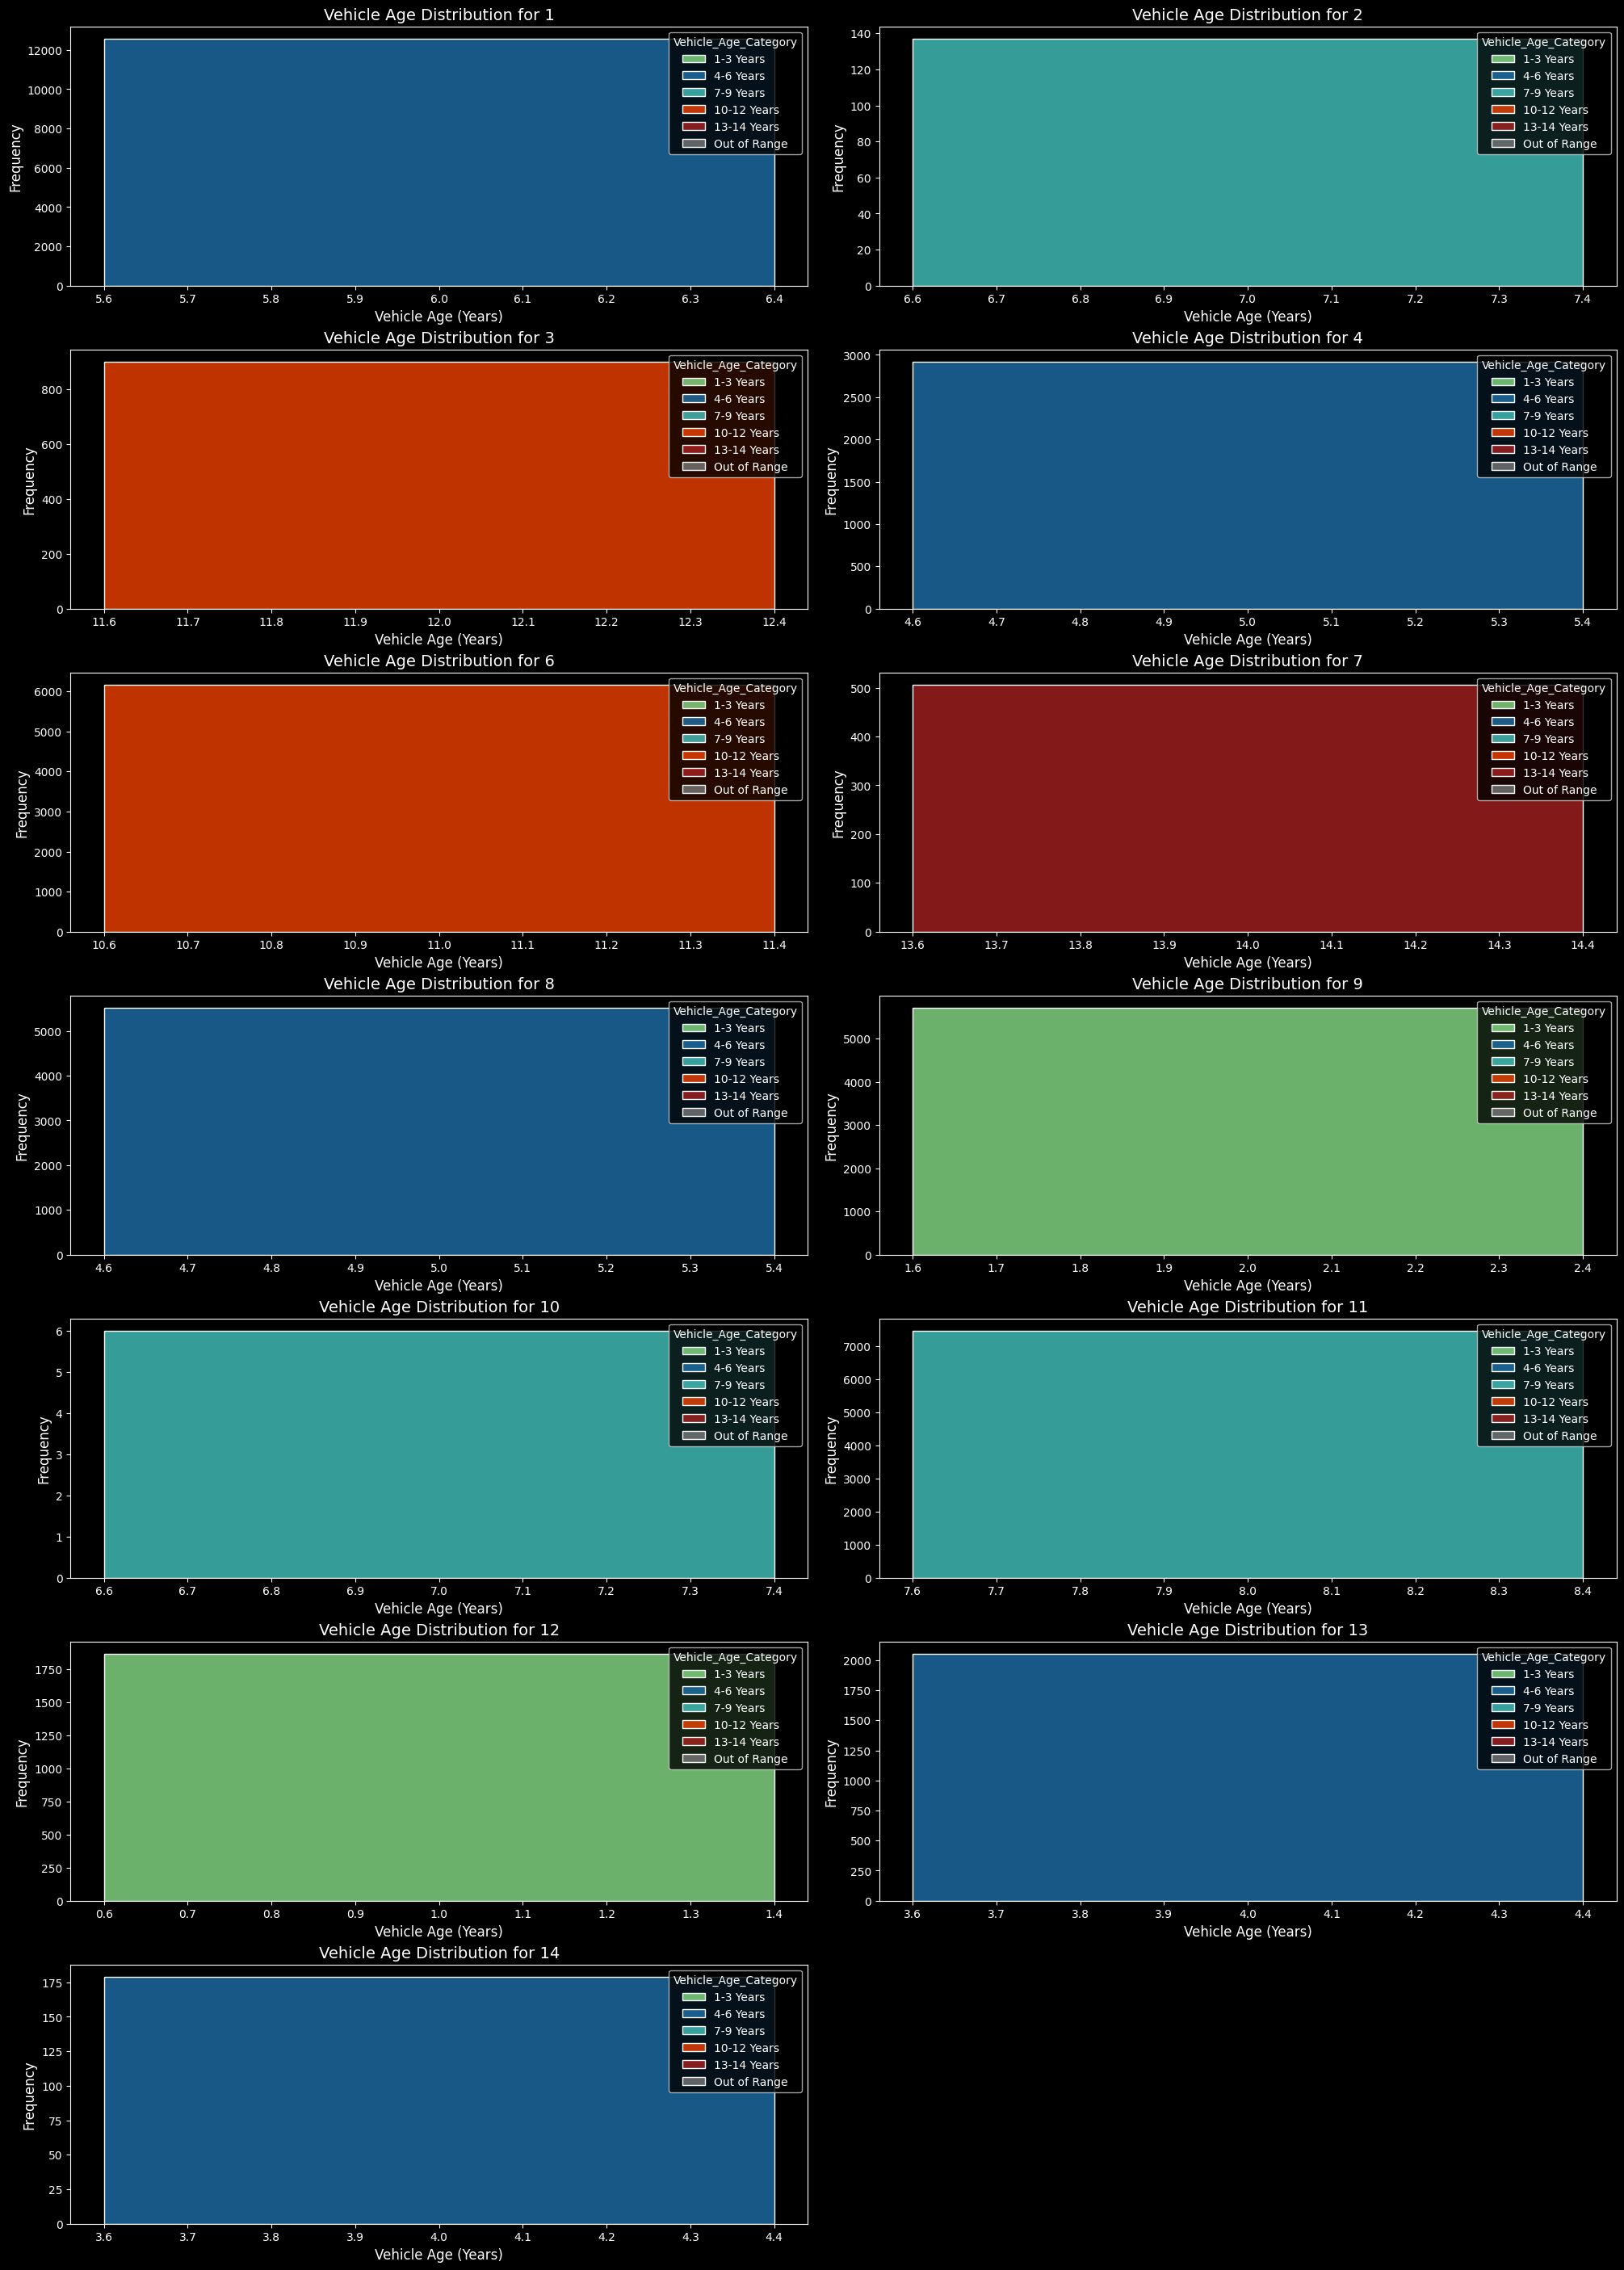

Counts for each vehicle and vehicle age category:

1:
  1-3 Years: 0
  4-6 Years: 12569
  7-9 Years: 0
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

2:
  1-3 Years: 0
  4-6 Years: 0
  7-9 Years: 137
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

3:
  1-3 Years: 0
  4-6 Years: 0
  7-9 Years: 0
  10-12 Years: 901
  13-14 Years: 0
  Out of Range: 0

4:
  1-3 Years: 0
  4-6 Years: 2918
  7-9 Years: 0
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

6:
  1-3 Years: 0
  4-6 Years: 0
  7-9 Years: 0
  10-12 Years: 6165
  13-14 Years: 0
  Out of Range: 0

7:
  1-3 Years: 0
  4-6 Years: 0
  7-9 Years: 0
  10-12 Years: 0
  13-14 Years: 506
  Out of Range: 0

8:
  1-3 Years: 0
  4-6 Years: 5518
  7-9 Years: 0
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

9:
  1-3 Years: 5714
  4-6 Years: 0
  7-9 Years: 0
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

10:
  1-3 Years: 0
  4-6 Years: 0
  7-9 Years: 6
  10-12 Years: 0
  13-14 Years: 0
  Out of Range: 0

11:
  1-3 Years: 

In [75]:
# Define vehicle age ranges and corresponding colors
vehicle_age_ranges = {
    '1-3 Years': (1, 3),
    '4-6 Years': (4, 6),
    '7-9 Years': (7, 9),
    '10-12 Years': (10, 12),
    '13-14 Years': (13, 14)
}

vehicle_age_colors = {
    '1-3 Years': '#90ee90',
    '4-6 Years': '#1f77b4',
    '7-9 Years': '#48d1cc',
    '10-12 Years': '#ff4500',
    '13-14 Years': '#b22222',
    'Out of Range': '#7f7f7f'
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['VEHICLE_AGE'])
    vehicle_data['Vehicle_Age_Category'] = pd.cut(
        vehicle_data['VEHICLE_AGE'],
        bins=[-np.inf] + [v[1] for v in vehicle_age_ranges.values()] + [np.inf],
        labels=list(vehicle_age_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Vehicle_Age_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='VEHICLE_AGE', hue='Vehicle_Age_Category', palette=vehicle_age_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Vehicle Age Distribution for {vehicle}', fontsize=14)
    ax.set_xlabel('Vehicle Age (Years)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and vehicle age category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")

# TEMP_DIFFERENCE

In [76]:
df_cleaned1["TEMP_DIFFERENCE"].min()

-5.103120829411811

In [77]:
df_cleaned1["TEMP_DIFFERENCE"].max()

78.3905206549683

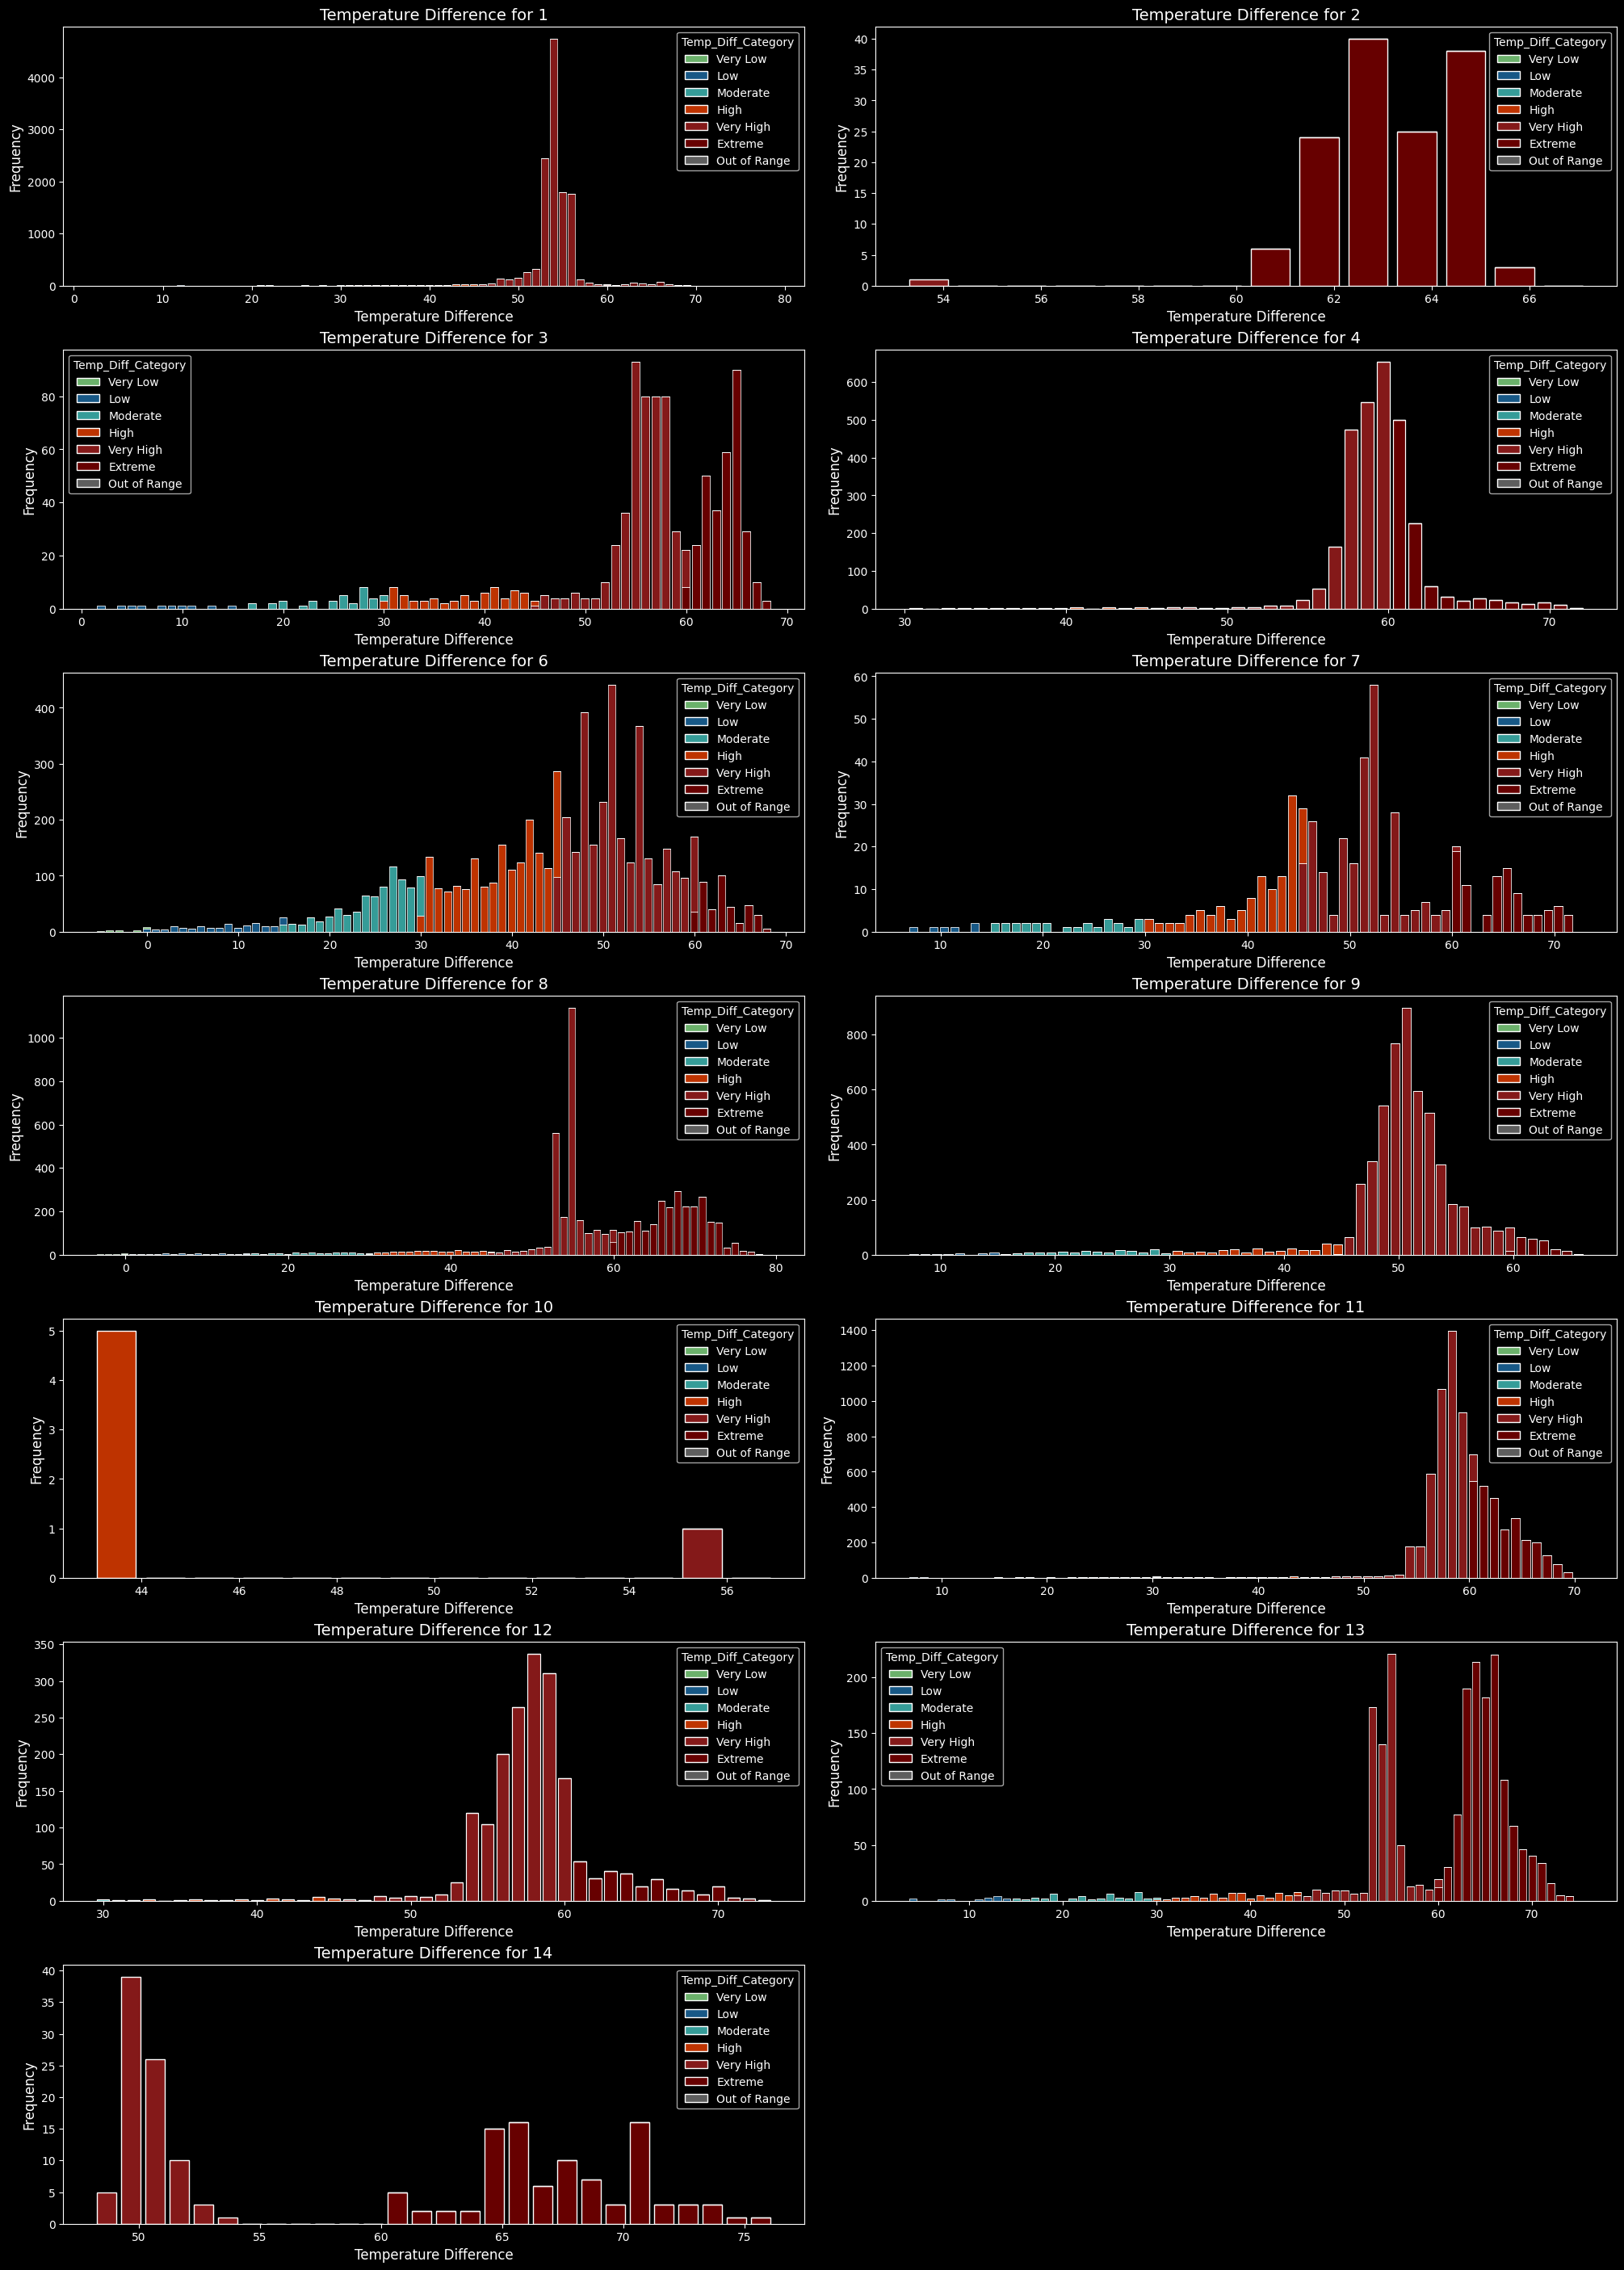

Counts for each vehicle and temperature difference category:

1:
  Very Low: 0
  Low: 18
  Moderate: 54
  High: 212
  Very High: 11986
  Extreme: 299
  Out of Range: 0

2:
  Very Low: 0
  Low: 0
  Moderate: 0
  High: 0
  Very High: 1
  Extreme: 136
  Out of Range: 0

3:
  Very Low: 0
  Low: 10
  Moderate: 35
  High: 72
  Very High: 474
  Extreme: 310
  Out of Range: 0

4:
  Very Low: 0
  Low: 0
  Moderate: 0
  High: 23
  Very High: 1949
  Extreme: 946
  Out of Range: 0

6:
  Very Low: 11
  Low: 137
  Moderate: 785
  High: 1801
  Very High: 3023
  Extreme: 408
  Out of Range: 0

7:
  Very Low: 0
  Low: 6
  Moderate: 26
  High: 125
  Very High: 255
  Extreme: 94
  Out of Range: 0

8:
  Very Low: 13
  Low: 62
  Moderate: 108
  High: 212
  Very High: 2557
  Extreme: 2566
  Out of Range: 0

9:
  Very Low: 0
  Low: 30
  Moderate: 150
  High: 271
  Very High: 5039
  Extreme: 224
  Out of Range: 0

10:
  Very Low: 0
  Low: 0
  Moderate: 0
  High: 5
  Very High: 1
  Extreme: 0
  Out of Range: 0

In [79]:
temp_difference_ranges = {
    'Very Low': (-10, 0),
    'Low': (1, 15),
    'Moderate': (16, 30),
    'High': (31, 45),
    'Very High': (46, 60),
    'Extreme': (61, 80)
}

temp_difference_range_colors = {
    'Very Low': '#90ee90',
    'Low': '#1f77b4',
    'Moderate': '#48d1cc',
    'High': '#ff4500',
    'Very High': '#b22222',
    'Extreme': '#8b0000',
    'Out of Range': '#7f7f7f'
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['TEMP_DIFFERENCE'])
    vehicle_data['Temp_Diff_Category'] = pd.cut(
        vehicle_data['TEMP_DIFFERENCE'],
        bins=[-np.inf] + [v[1] for v in temp_difference_ranges.values()] + [np.inf],
        labels=list(temp_difference_ranges.keys()) + ['Out of Range']
    )

    counts = vehicle_data['Temp_Diff_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='TEMP_DIFFERENCE', hue='Temp_Diff_Category', palette=temp_difference_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Temperature Difference for {vehicle}', fontsize=14)
    ax.set_xlabel('Temperature Difference', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and temperature difference category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


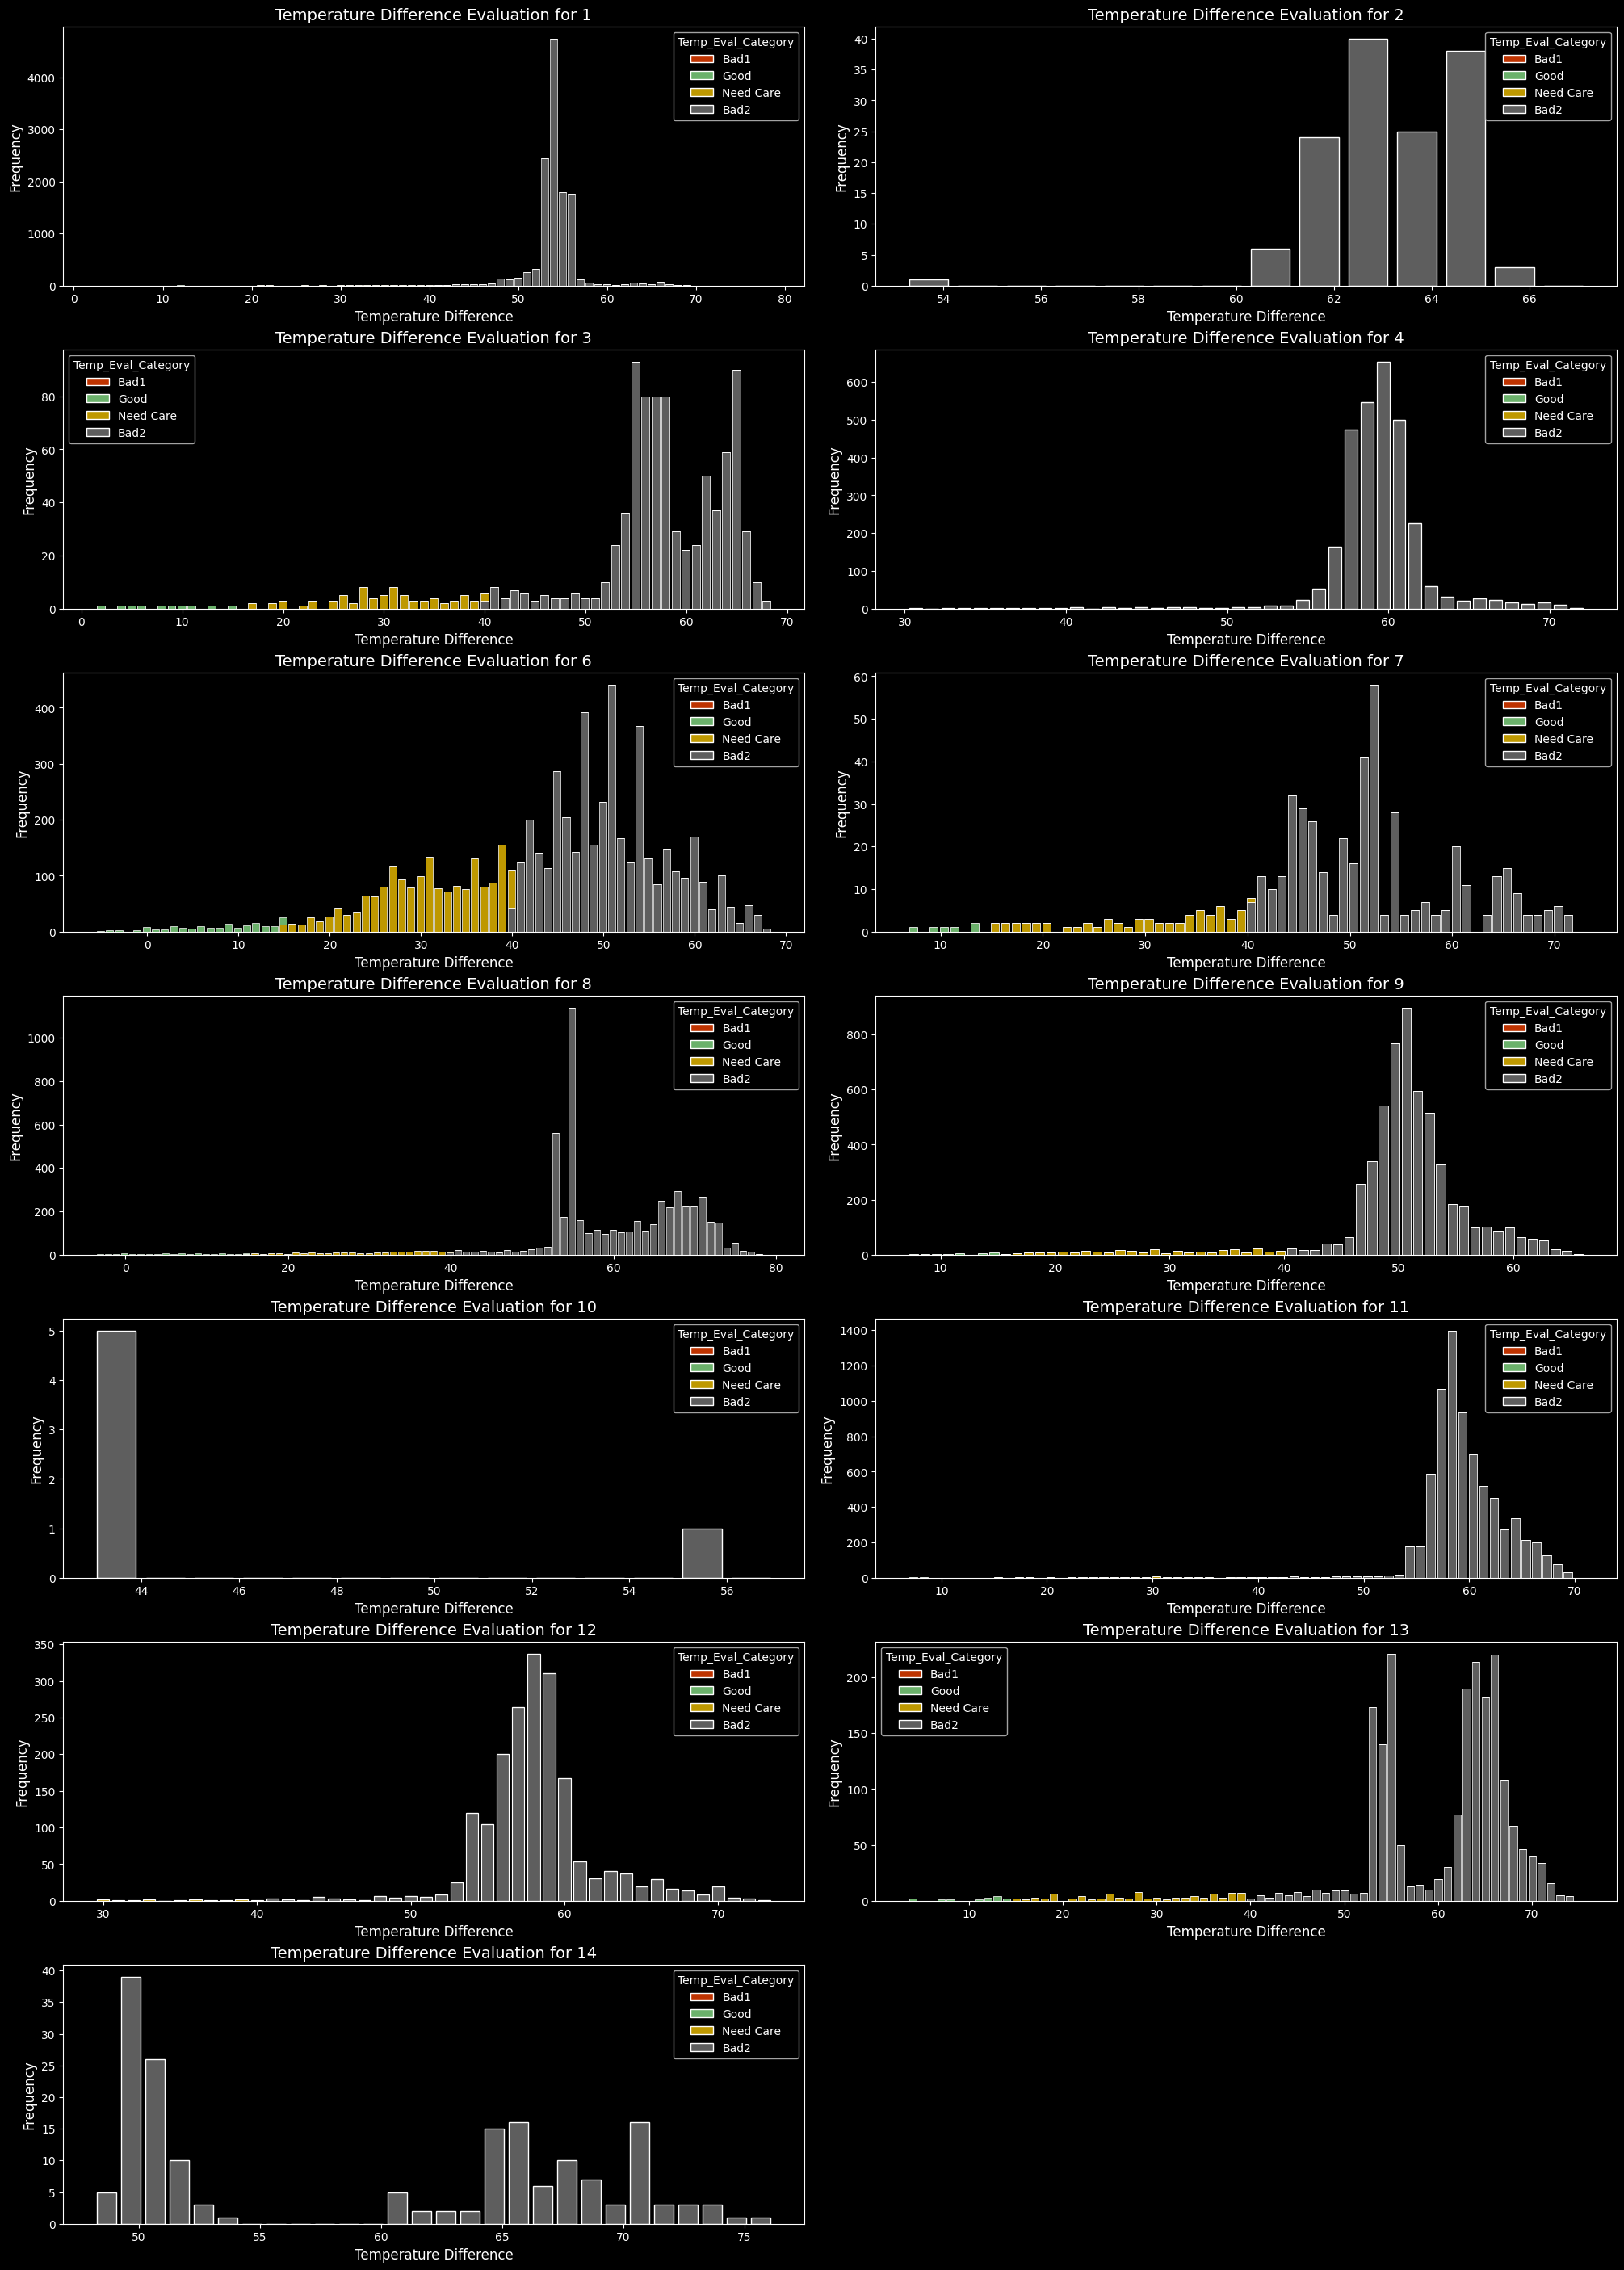

Counts for each vehicle and temperature difference evaluation category:

1:
  Bad1: 0
  Good: 18
  Need Care: 138
  Bad2: 12413

2:
  Bad1: 0
  Good: 0
  Need Care: 0
  Bad2: 137

3:
  Bad1: 0
  Good: 10
  Need Care: 77
  Bad2: 814

4:
  Bad1: 0
  Good: 0
  Need Care: 12
  Bad2: 2906

6:
  Bad1: 0
  Good: 148
  Need Care: 1778
  Bad2: 4239

7:
  Bad1: 0
  Good: 6
  Need Care: 63
  Bad2: 437

8:
  Bad1: 0
  Good: 75
  Need Care: 241
  Bad2: 5202

9:
  Bad1: 0
  Good: 30
  Need Care: 288
  Bad2: 5396

10:
  Bad1: 0
  Good: 0
  Need Care: 0
  Bad2: 6

11:
  Bad1: 0
  Good: 9
  Need Care: 81
  Bad2: 7376

12:
  Bad1: 0
  Good: 0
  Need Care: 14
  Bad2: 1851

13:
  Bad1: 0
  Good: 14
  Need Care: 84
  Bad2: 1955

14:
  Bad1: 0
  Good: 0
  Need Care: 0
  Bad2: 179


In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ranges for evaluation
temp_difference_evaluation_ranges = {
    'Good': (-5, 15),
    'Need Care': (16, 40),
    'Bad1': (-np.inf, -6),  # Below -5
    'Bad2': (41, np.inf)     # Above 40
}

# Adjust colors accordingly
temp_difference_evaluation_colors = {
    'Good': '#90ee90',     # Green
    'Need Care': '#ffcc00',# Yellow
    'Bad1': '#ff4500',      # Red
    'Bad2': '#7f7f7f'  # Grey
}

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['TEMP_DIFFERENCE'])
    vehicle_data['Temp_Eval_Category'] = pd.cut(
        vehicle_data['TEMP_DIFFERENCE'],
        bins=[-np.inf, -6, 15, 40, np.inf],
        labels=['Bad1', 'Good', 'Need Care', 'Bad2']
    )

    counts = vehicle_data['Temp_Eval_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='TEMP_DIFFERENCE', hue='Temp_Eval_Category', palette=temp_difference_evaluation_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Temperature Difference Evaluation for {vehicle}', fontsize=14)
    ax.set_xlabel('Temperature Difference', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove unused axes
for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and temperature difference evaluation category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")


# AVG_Short_term_fuel_trim

In [84]:
df_cleaned1["AVG_Short_term_fuel_trim"].min()

-100.0

In [85]:
df_cleaned1["AVG_Short_term_fuel_trim"].max()

79.77260596457243

Bins: [-100.0, -30, -10, 0, 20, 50, 80]


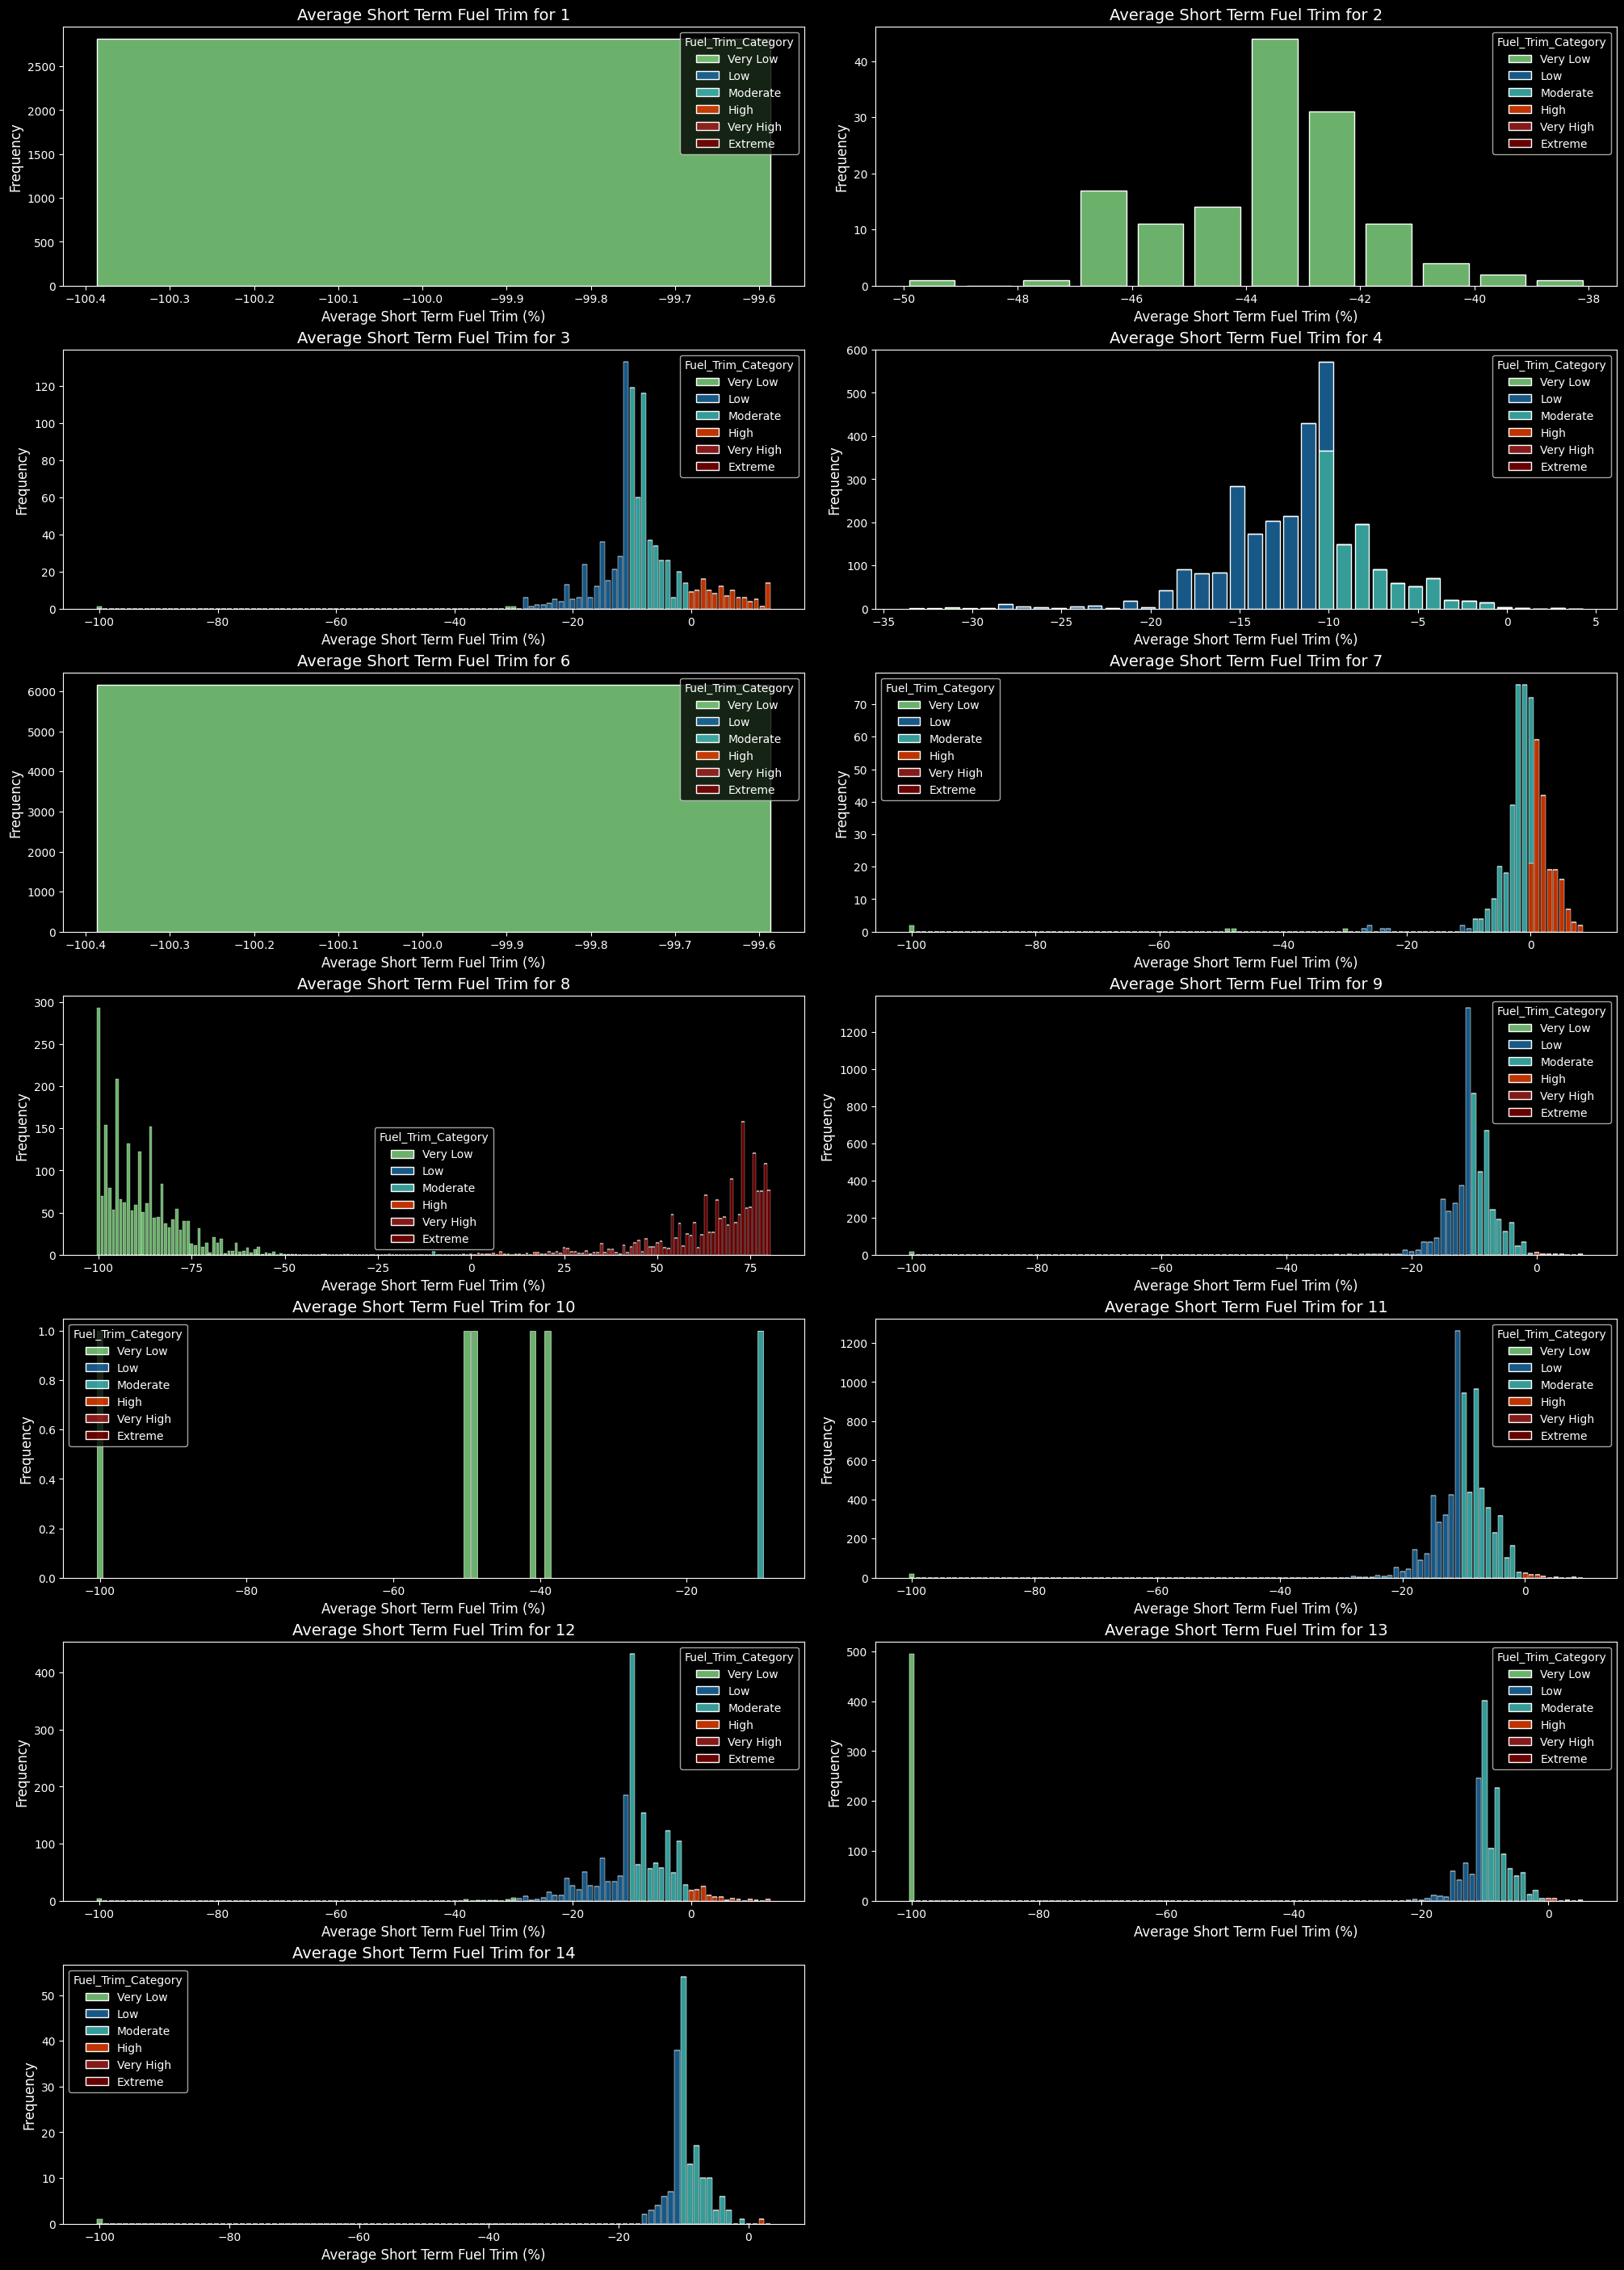

Counts for each vehicle and average short term fuel trim category:

1:
  Very Low: 2815
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0

2:
  Very Low: 137
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0

3:
  Very Low: 3
  Low: 322
  Moderate: 458
  High: 118
  Very High: 0
  Extreme: 0

4:
  Very Low: 7
  Low: 1867
  Moderate: 1040
  High: 4
  Very High: 0
  Extreme: 0

6:
  Very Low: 6165
  Low: 0
  Moderate: 0
  High: 0
  Very High: 0
  Extreme: 0

7:
  Very Low: 5
  Low: 8
  Moderate: 305
  High: 188
  Very High: 0
  Extreme: 0

8:
  Very Low: 2278
  Low: 1
  Moderate: 5
  High: 25
  Very High: 193
  Extreme: 1476

9:
  Very Low: 16
  Low: 2840
  Moderate: 2835
  High: 23
  Very High: 0
  Extreme: 0

10:
  Very Low: 5
  Low: 0
  Moderate: 1
  High: 0
  Very High: 0
  Extreme: 0

11:
  Very Low: 20
  Low: 3242
  Moderate: 4004
  High: 66
  Very High: 0
  Extreme: 0

12:
  Very Low: 18
  Low: 612
  Moderate: 1136
  High: 99
  Very High: 0
  Extreme: 0

13:


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define new ranges
avg_short_term_fuel_trim_ranges = {
    'Very Low': (-100.0, -30),
    'Low': (-29, -10),
    'Moderate': (-9, 0),
    'High': (1, 20),
    'Very High': (21, 50),
    'Extreme': (51, 80)  # Adjusted range to cover the new maximum value
}

avg_fuel_trim_range_colors = {
    'Very Low': '#90ee90',
    'Low': '#1f77b4',
    'Moderate': '#48d1cc',
    'High': '#ff4500',
    'Very High': '#b22222',
    'Extreme': '#8b0000',
    'Out of Range': '#7f7f7f'
}

# Define bins and ensure they are strictly increasing, removing potential duplicates
bins = [-100.0] + [v[1] for v in avg_short_term_fuel_trim_ranges.values()]

# Debug: Print bins to check their values
print("Bins:", bins)

# Get unique vehicles and create subplots
unique_vehicles = df_cleaned1['VEHICLE_ID'].unique()
n_vehicles = len(unique_vehicles)
n_cols = 2
n_rows = (n_vehicles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
legend_counts = {}

for i, vehicle in enumerate(unique_vehicles):
    ax = axes[i]
    vehicle_data = df_cleaned1[df_cleaned1['VEHICLE_ID'] == vehicle]

    vehicle_data = vehicle_data.dropna(subset=['AVG_Short_term_fuel_trim'])
    vehicle_data['Fuel_Trim_Category'] = pd.cut(
        vehicle_data['AVG_Short_term_fuel_trim'],
        bins=bins,
        labels=list(avg_short_term_fuel_trim_ranges.keys()), # Removed 'Out of Range' as bins cover all values
        duplicates='drop' # Handle potential remaining duplicates
    )

    counts = vehicle_data['Fuel_Trim_Category'].value_counts().sort_index()
    legend_counts[vehicle] = counts

    sns.histplot(
        data=vehicle_data, x='AVG_Short_term_fuel_trim', hue='Fuel_Trim_Category', palette=avg_fuel_trim_range_colors,
        discrete=True, ax=ax, multiple='stack', shrink=0.8
    )

    ax.set_title(f'Average Short Term Fuel Trim for {vehicle}', fontsize=14)
    ax.set_xlabel('Average Short Term Fuel Trim (%)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

for j in range(len(unique_vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.show()

print("Counts for each vehicle and average short term fuel trim category:")
for vehicle, counts in legend_counts.items():
    print(f"\n{vehicle}:")
    for category, count in counts.items():
        print(f"  {category}: {count}")

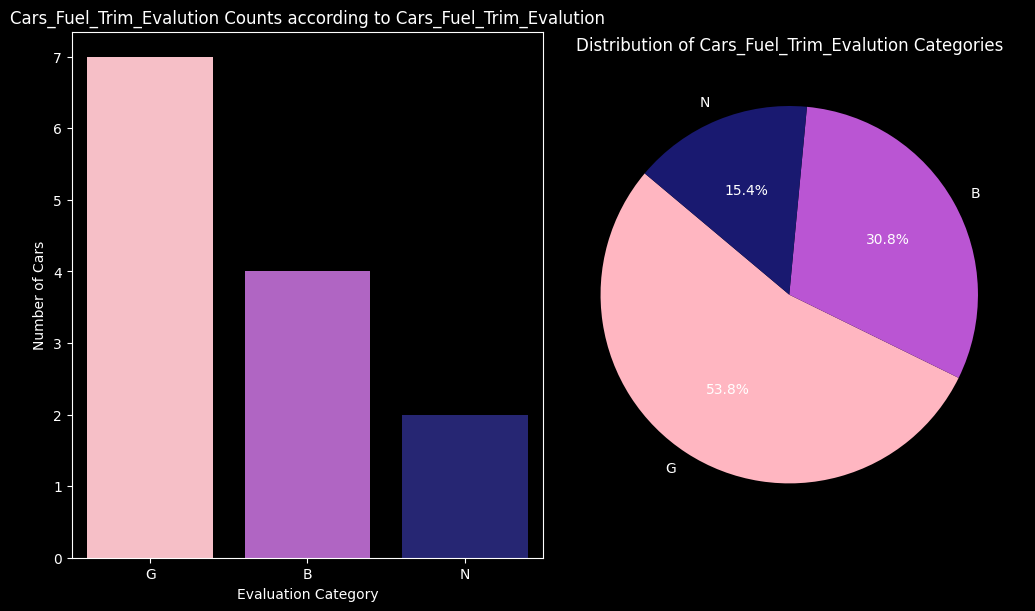

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cars_Fuel_Trim_Evalution = {
    'car1': 'B', 'car2': 'B', 'car3': 'N', 'car4': 'G',
    'car6': 'B', 'car7': 'N', 'car8': 'B', 'car9': 'G',
    'car10': 'G', 'car11': 'G', 'car12': 'G', 'car13': 'G', 'car14': 'G'
}

# Convert the dictionary to a DataFrame
df_eval = pd.DataFrame(list(Cars_Fuel_Trim_Evalution.items()), columns=['Vehicle', 'Evaluation'])

# Count the occurrences of each evaluation category
eval_counts = df_eval['Evaluation'].value_counts()

# Create subplots for the bar chart and pie chart
fig, ax = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

# Bar plot
sns.barplot(x=eval_counts.index, y=eval_counts.values, palette=['#ffb6c1', '#ba55d3', '#191980'], ax=ax[0])
ax[0].set_title('Cars_Fuel_Trim_Evalution Counts according to Cars_Fuel_Trim_Evalution')
ax[0].set_xlabel('Evaluation Category')
ax[0].set_ylabel('Number of Cars')

# Pie chart
ax[1].pie(eval_counts, labels=eval_counts.index, colors=['#ffb6c1', '#ba55d3', '#191970'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of Cars_Fuel_Trim_Evalution Categories')

# Show plots
plt.show()